## Predicting Prescriber induced Overdose

**Author : Kiros Gebremariam**

Cohorts of the Data Science Immersive, General Assembly @ Washington DC campus

# Feature Selection and  Visualization 

Loadding Necessary Libraries

In [1]:
import os                                                                    # os library
import numpy as np                                                           # numpy library
import pandas as pd                                                          # pandas library
import matplotlib.pylab as plt                                               # plotting and visualization library
import seaborn as sns                                                        # plotting
import statsmodels.api as sm                                                 # for running regressions
np.random.seed(2018)                                                         # Random seed for replication 


# Configure visual settings:
plt.style.use('fivethirtyeight')
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import os                      # just ensuring the files using as working Directory(pwd)
print(os.listdir())

['.DS_Store', '.git', '.gitignore', '.ipynb_checkpoints', '1-Copy1.3. Capestone  Data visualization_1.ipynb', '1.1. Capestone Data setup_1.ipynb', '1.2. Capestone Data Cleaning_1.ipynb', '1.3. Capestone  Data visualization_1.ipynb', '1.4. Modeling-Feature importance and  Evaluation.ipynb', '1.4. Modeling-Feature importance and  Evaluation_another model testing.ipynb', '4.1. Capestone Modeling and Evaluation.ipynb', 'clustermap_specialty_vs_op.png', 'inputs', 'LICENSE', 'README.md']


In [126]:
# Prescriber related datasets disaggregated by state,county,zip and rate 
Prescriber_state_df =pd.read_csv('./inputs/Prescriber_state.csv')
Prescriber_county_df =pd.read_csv('./inputs/Prescriber_county.csv')
Prescriber_zip_df =pd.read_csv('./inputs/Prescriber_zip.csv')
psr_df= pd.read_csv('./inputs/prescriber_state_rate.csv')
pcr_df = pd.read_csv('./inputs/prescriber_county_rate.csv')
pzr_df= pd.read_csv('./inputs/prescriber_zip_rate.csv')
#Drugs, Mental health and Deaths datasets different datasources
pop_urban_df =pd.read_csv('./inputs/pop-urban-pct-historical_cleaned_up.csv')
mental_death = pd.read_csv('./inputs/opiodmentalhealthdeath.csv')
Wonder_Drug_Death_Data1_df = pd.read_csv('./inputs/Wonder_Drug_Death_Data_1.csv')
Wonder_Drug_Death_Data2_df = pd.read_csv('./inputs/Wonder_Drug_Death_Data_2.csv')
drugs_df = pd.read_csv('./inputs/list_opioids.csv')
# crime related data both property and nonviolent
violentcrime_df =pd.read_csv('./inputs/violentcrime19992014.csv')
propertycrime_df=pd.read_csv('./inputs/propertycrime19992014.csv')
tcrime_df =pd.read_csv('./inputs/TotalVncrime.csv')

# National Health Expenditure from 2009-2016
NHE2016_df = pd.read_csv('./inputs/NHE2016.csv',engine='python')
df= pd.read_csv('./inputs/TotalOpioidsvisualization.csv')
prescriber_df= pd.read_csv('./inputs/cleaned_prescriber_info18.csv')

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


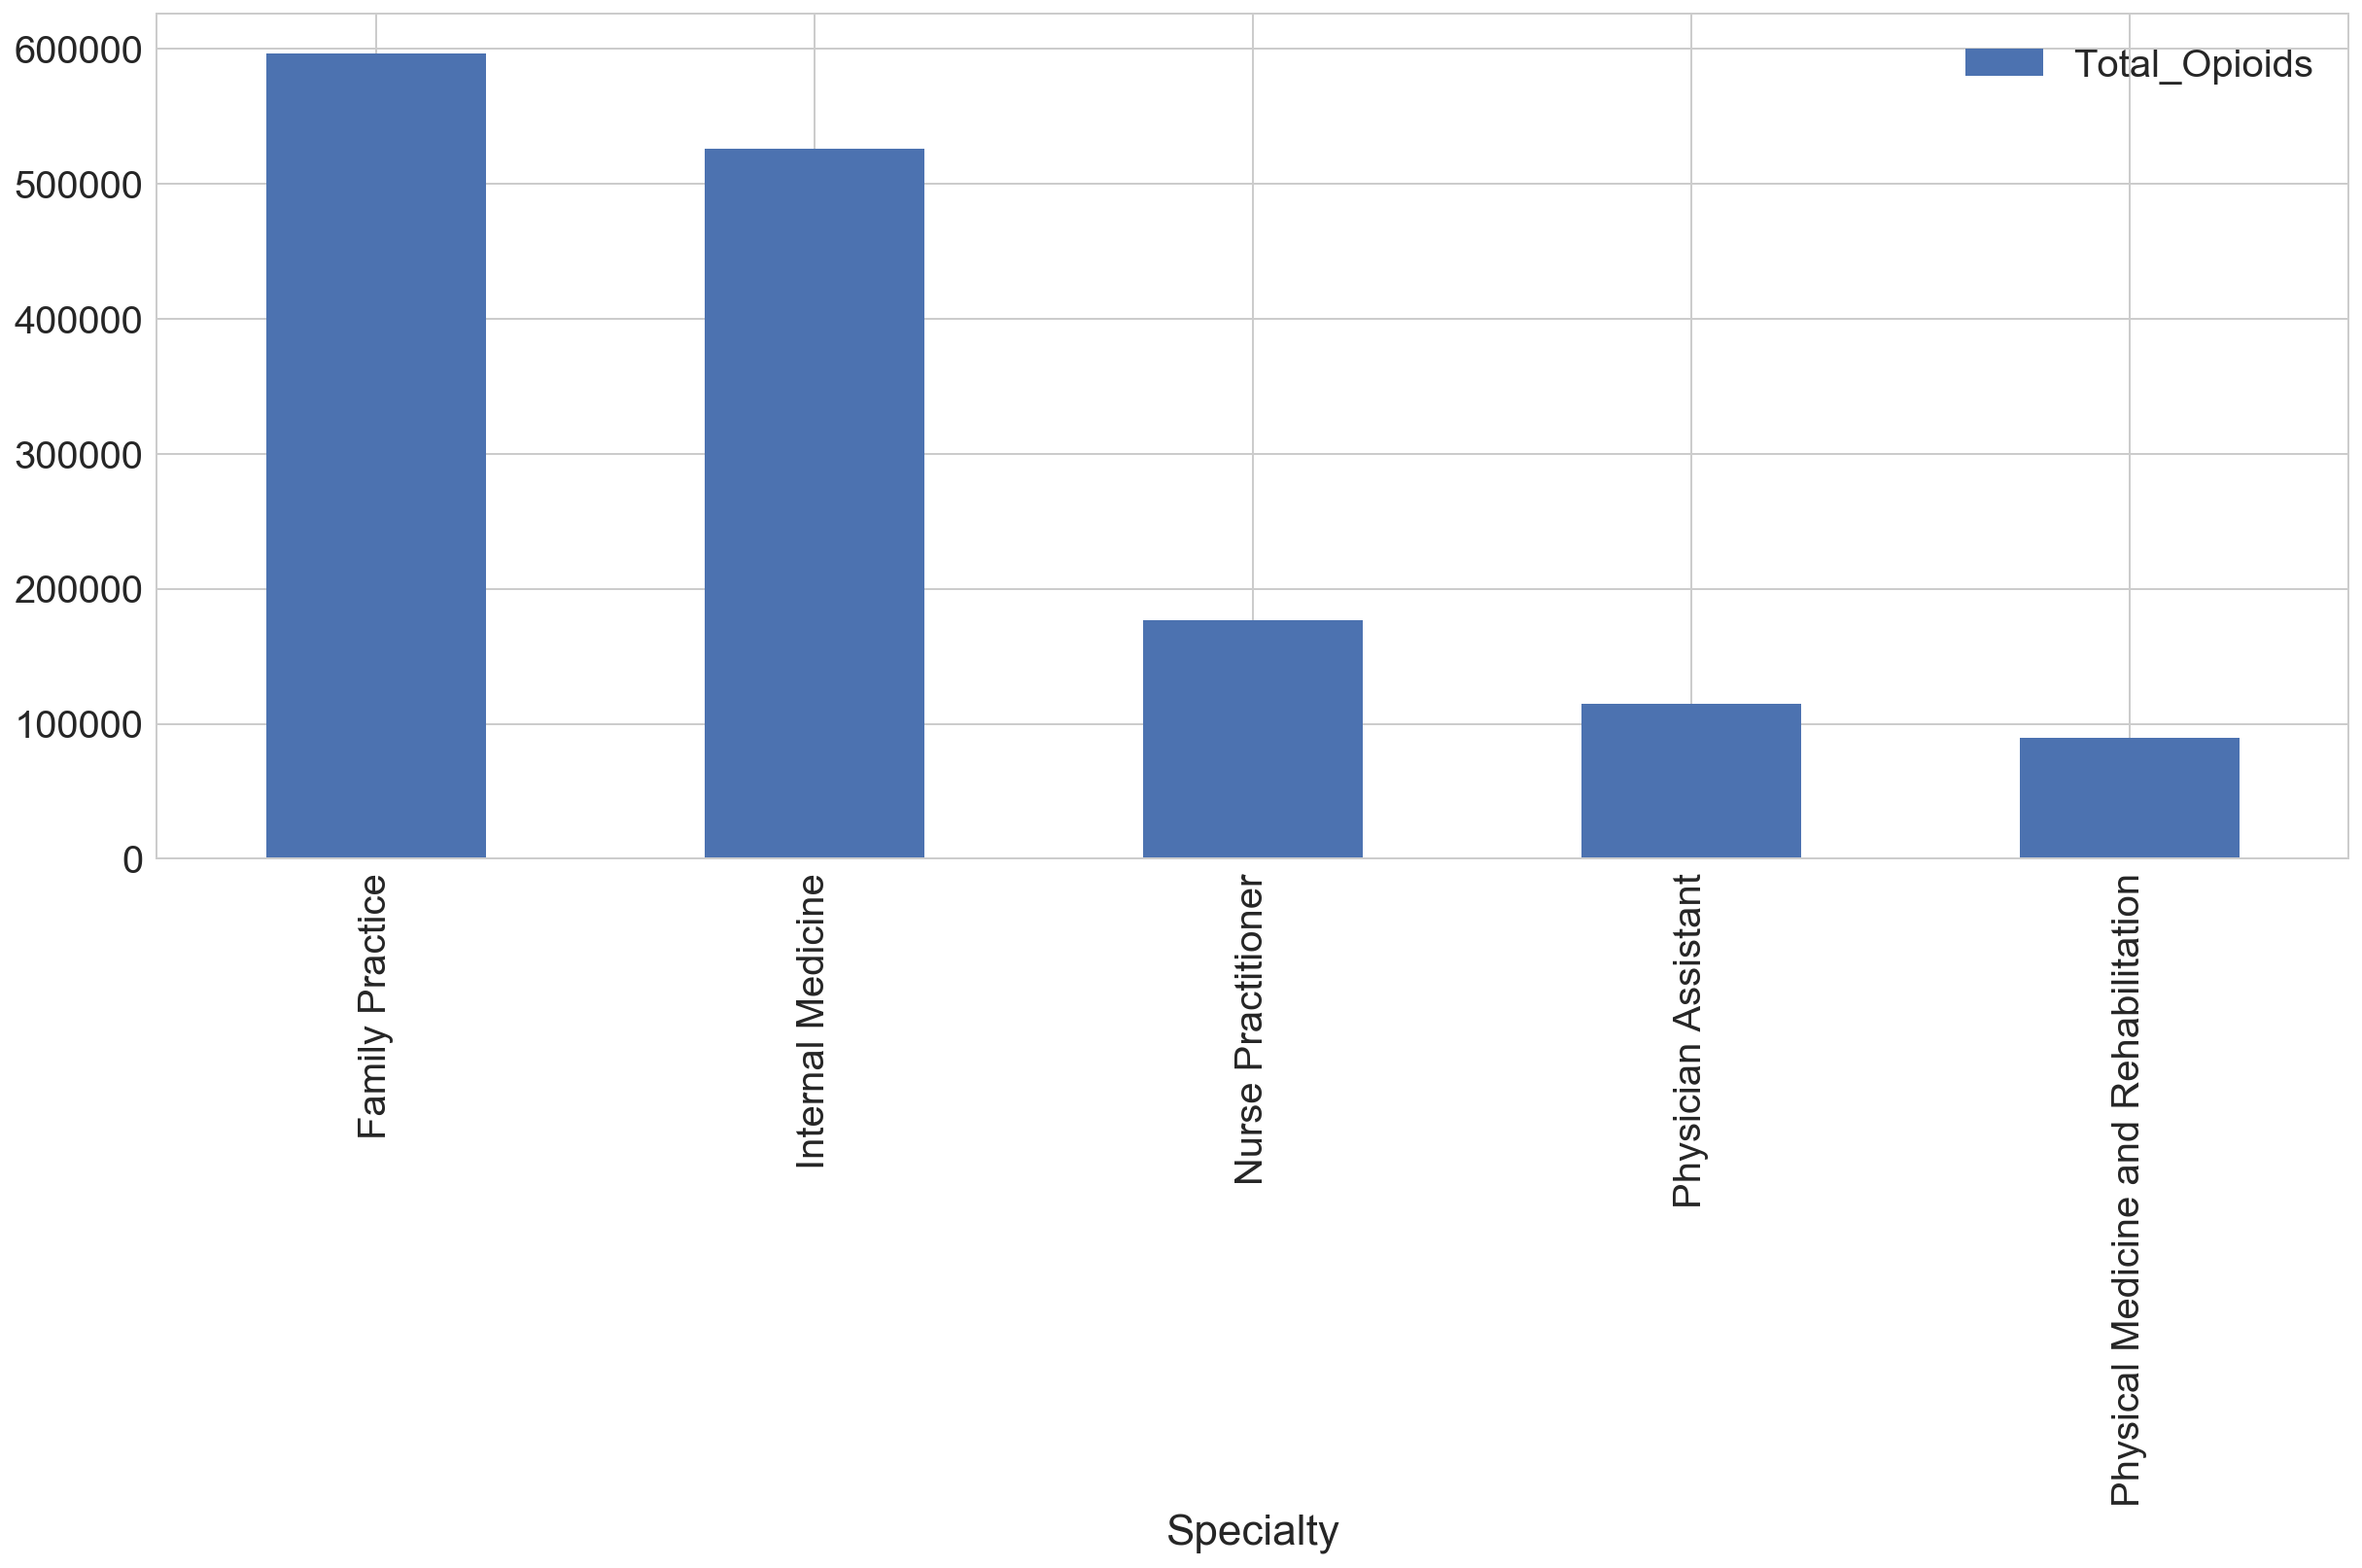

In [4]:
import matplotlib.pyplot as plt
# here i am going to create sub dataframe from the main one through bradcasting and slicing
# that will help me to plot the  speciality verses the total opiods which is total or aggregate of all opiods
# prescribed by the same speciality horizontally no matter the type of medication he prescribed
# the sense here is i am using the official classification of opiods by FDA

OpioidsPerSpecialty = df[['Specialty','Total_Opioids']]
OpioidsPerSpecialty_group = OpioidsPerSpecialty.groupby('Specialty')
OpioidsPerSpecialty_totals = pd.DataFrame(OpioidsPerSpecialty_group.sum())

# previously in the data cleaning as well as pre processing i have created the total opiods
OpioidsPerSpecialty_totals=OpioidsPerSpecialty_totals.sort_values('Total_Opioids', ascending=False)

OpioidsPerSpecialty_totals.head()[:5].plot(kind='bar',figsize =(18,8))
#Plotting a bar plot of total opioids prescribed by those licensed and have AED vs 
# the total Speciality of the prescriber those licensed and have AED 

As the above barplot  shows the family practice speciality is the top total prescribers followed by the internal medicine and the third one is nurse practitioners and PAs. Ofcourse there is the physial medicine and rehabilitation also

In [5]:
Overdoses=pd.read_csv('./inputs/extra_overdoses.csv',index_col=0, parse_dates=True)

#Read the csv file that contains the overdose information, these are the 

In [6]:
OverdosesPerState=Overdoses[['Deaths']]
OverdosesPerState.sort_values('Deaths', ascending=False)

type(OverdosesPerState.ix[2,'Deaths'])

#sort the dataframe based on the number of deaths per State

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


str

In [7]:
OverdosesPerState['Deaths']= OverdosesPerState['Deaths'].str.replace(',','')   # removing punctuation
OverdosesPerState['Deaths']= OverdosesPerState['Deaths'].astype(int)    # converting to integer 
OverdosesPerState=OverdosesPerState.sort_values('Deaths', ascending=False)   # sorting
OverdosesPerState

#Removing the punctuation and converting the 'Deaths' column values from a string data type to integer
# sorting then  and

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Deaths
State                 
California        4521
Ohio              2744
Pennsylvania      2732
Florida           2634
Texas             2601
New York          2300
Michigan          1762
Illinois          1705
North Carolina    1358
Massachusetts     1289
Tennessee         1269
New Jersey        1253
Arizona           1211
Georgia           1206
Indiana           1172
Kentucky          1077
Maryland          1070
Missouri          1067
Virginia           980
Washington         979
Colorado           899
Wisconsin          853
Louisiana          777
Oklahoma           777
Alabama            723
South Carolina     701
West Virginia      627
Connecticut        623
Utah               603
New Mexico         547
Nevada             545
Oregon             522
Minnesota          517
Arkansas           356
Mississippi        336
New Hampshire      334
Kansas             332
Iowa               264
Rhode Island       247
Maine              216
Idaho              212
Delaware           189
Hawaii             157
Montana            125
Nebraska           125
Alaska             124
Wyoming            109
Vermont             83
South Dakota        63
North Dakota        43

The total overdoseby state shows the total number of overdoses

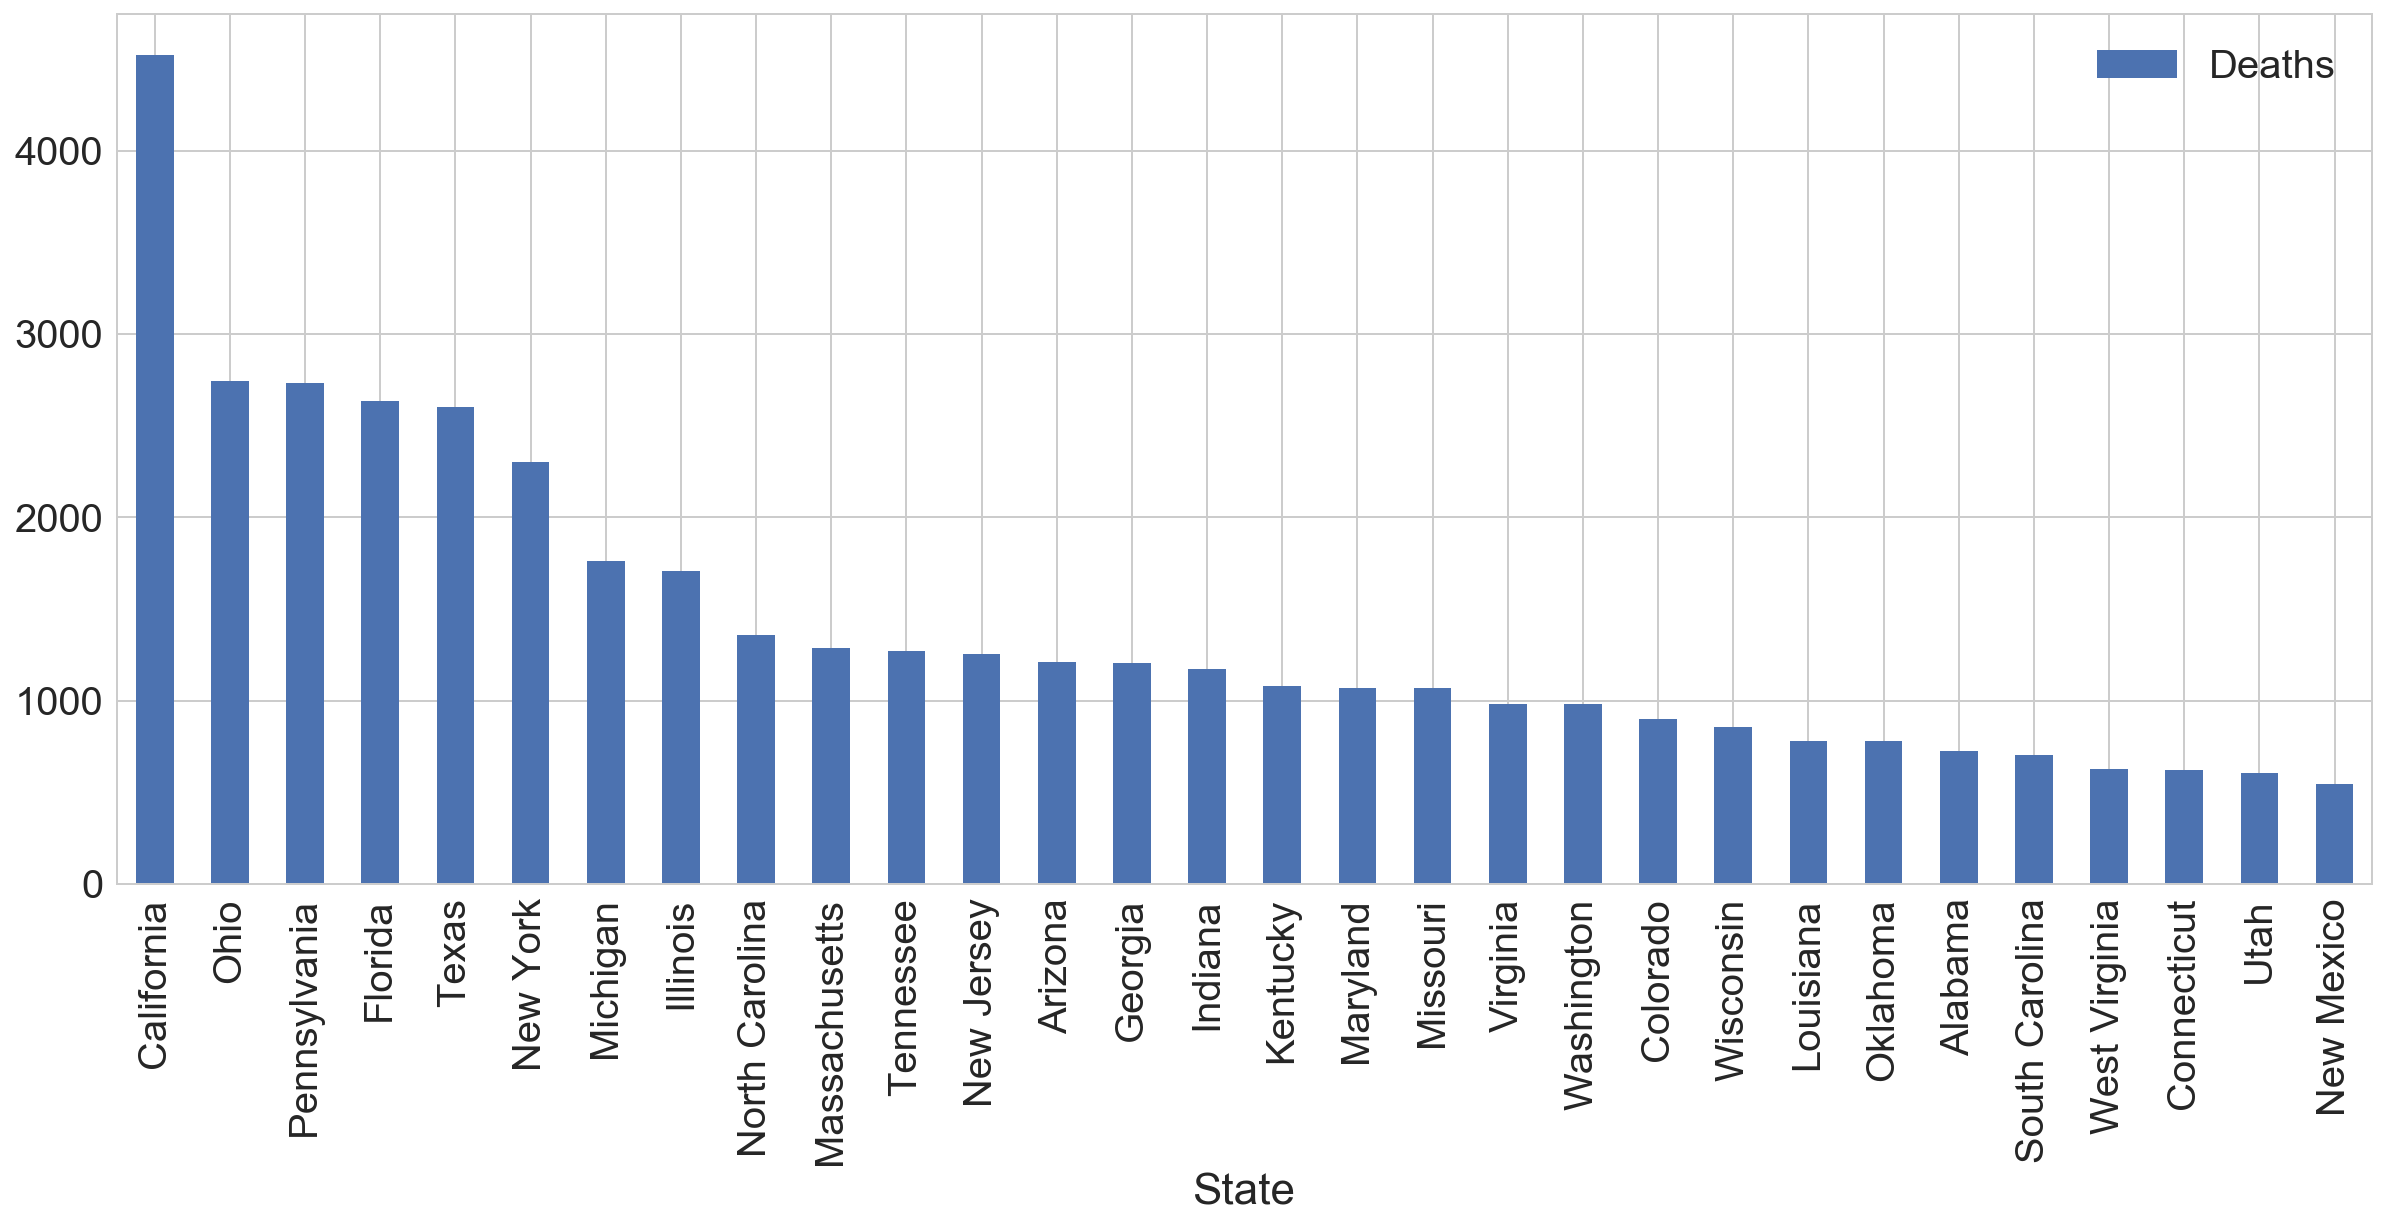

In [8]:
OverdosesPerState.head(30).plot(kind='bar', figsize =(18,8))
#Plotting the number of deaths per State  the top  30 ones  based on the aggregated overdose data by speciality

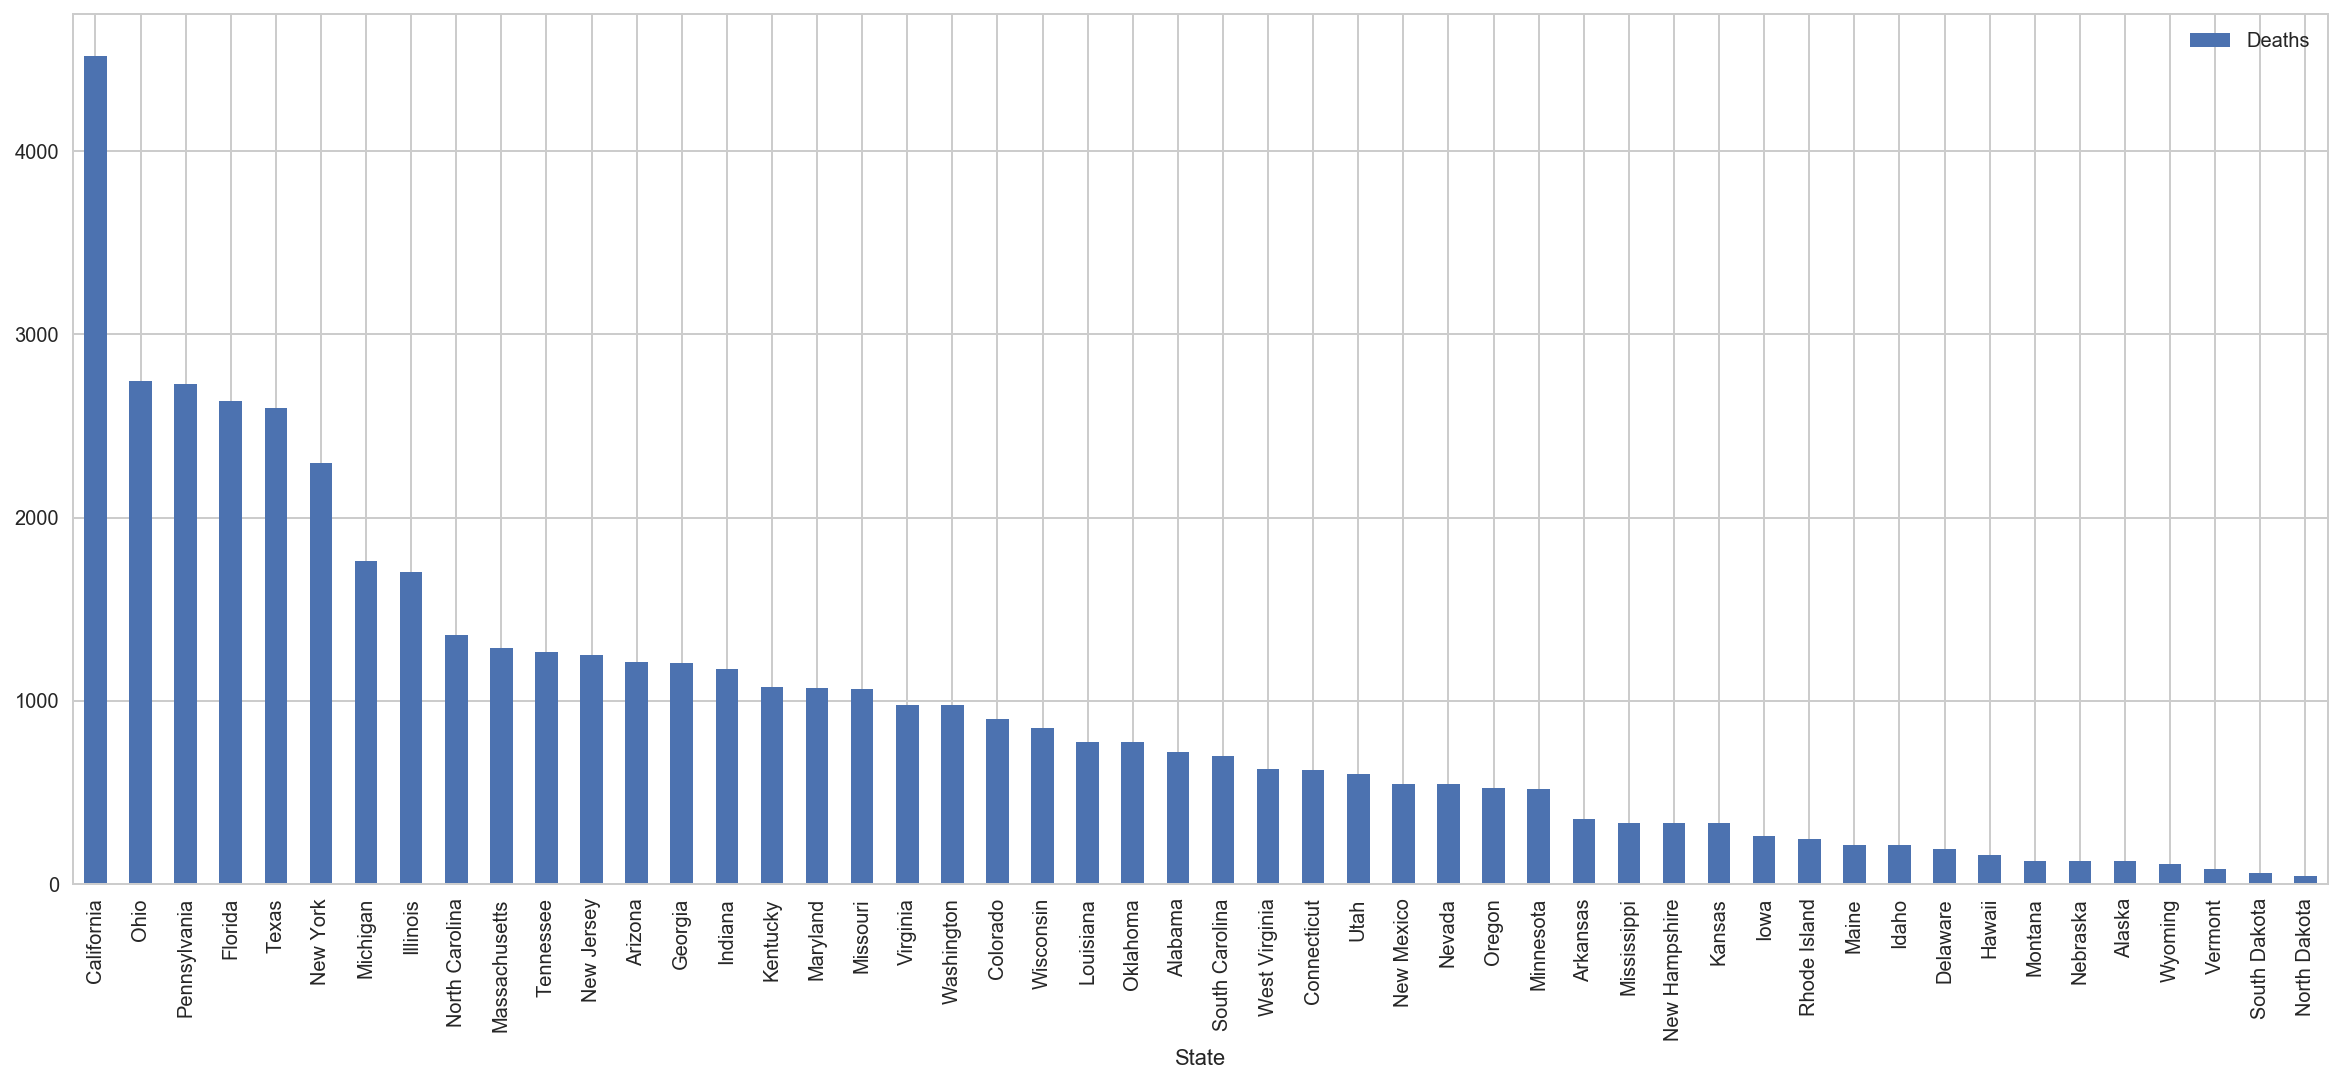

In [149]:
OverdosesPerState.head(52).plot(kind='bar',figsize=(18,8))

#Plotting the number of deaths per State

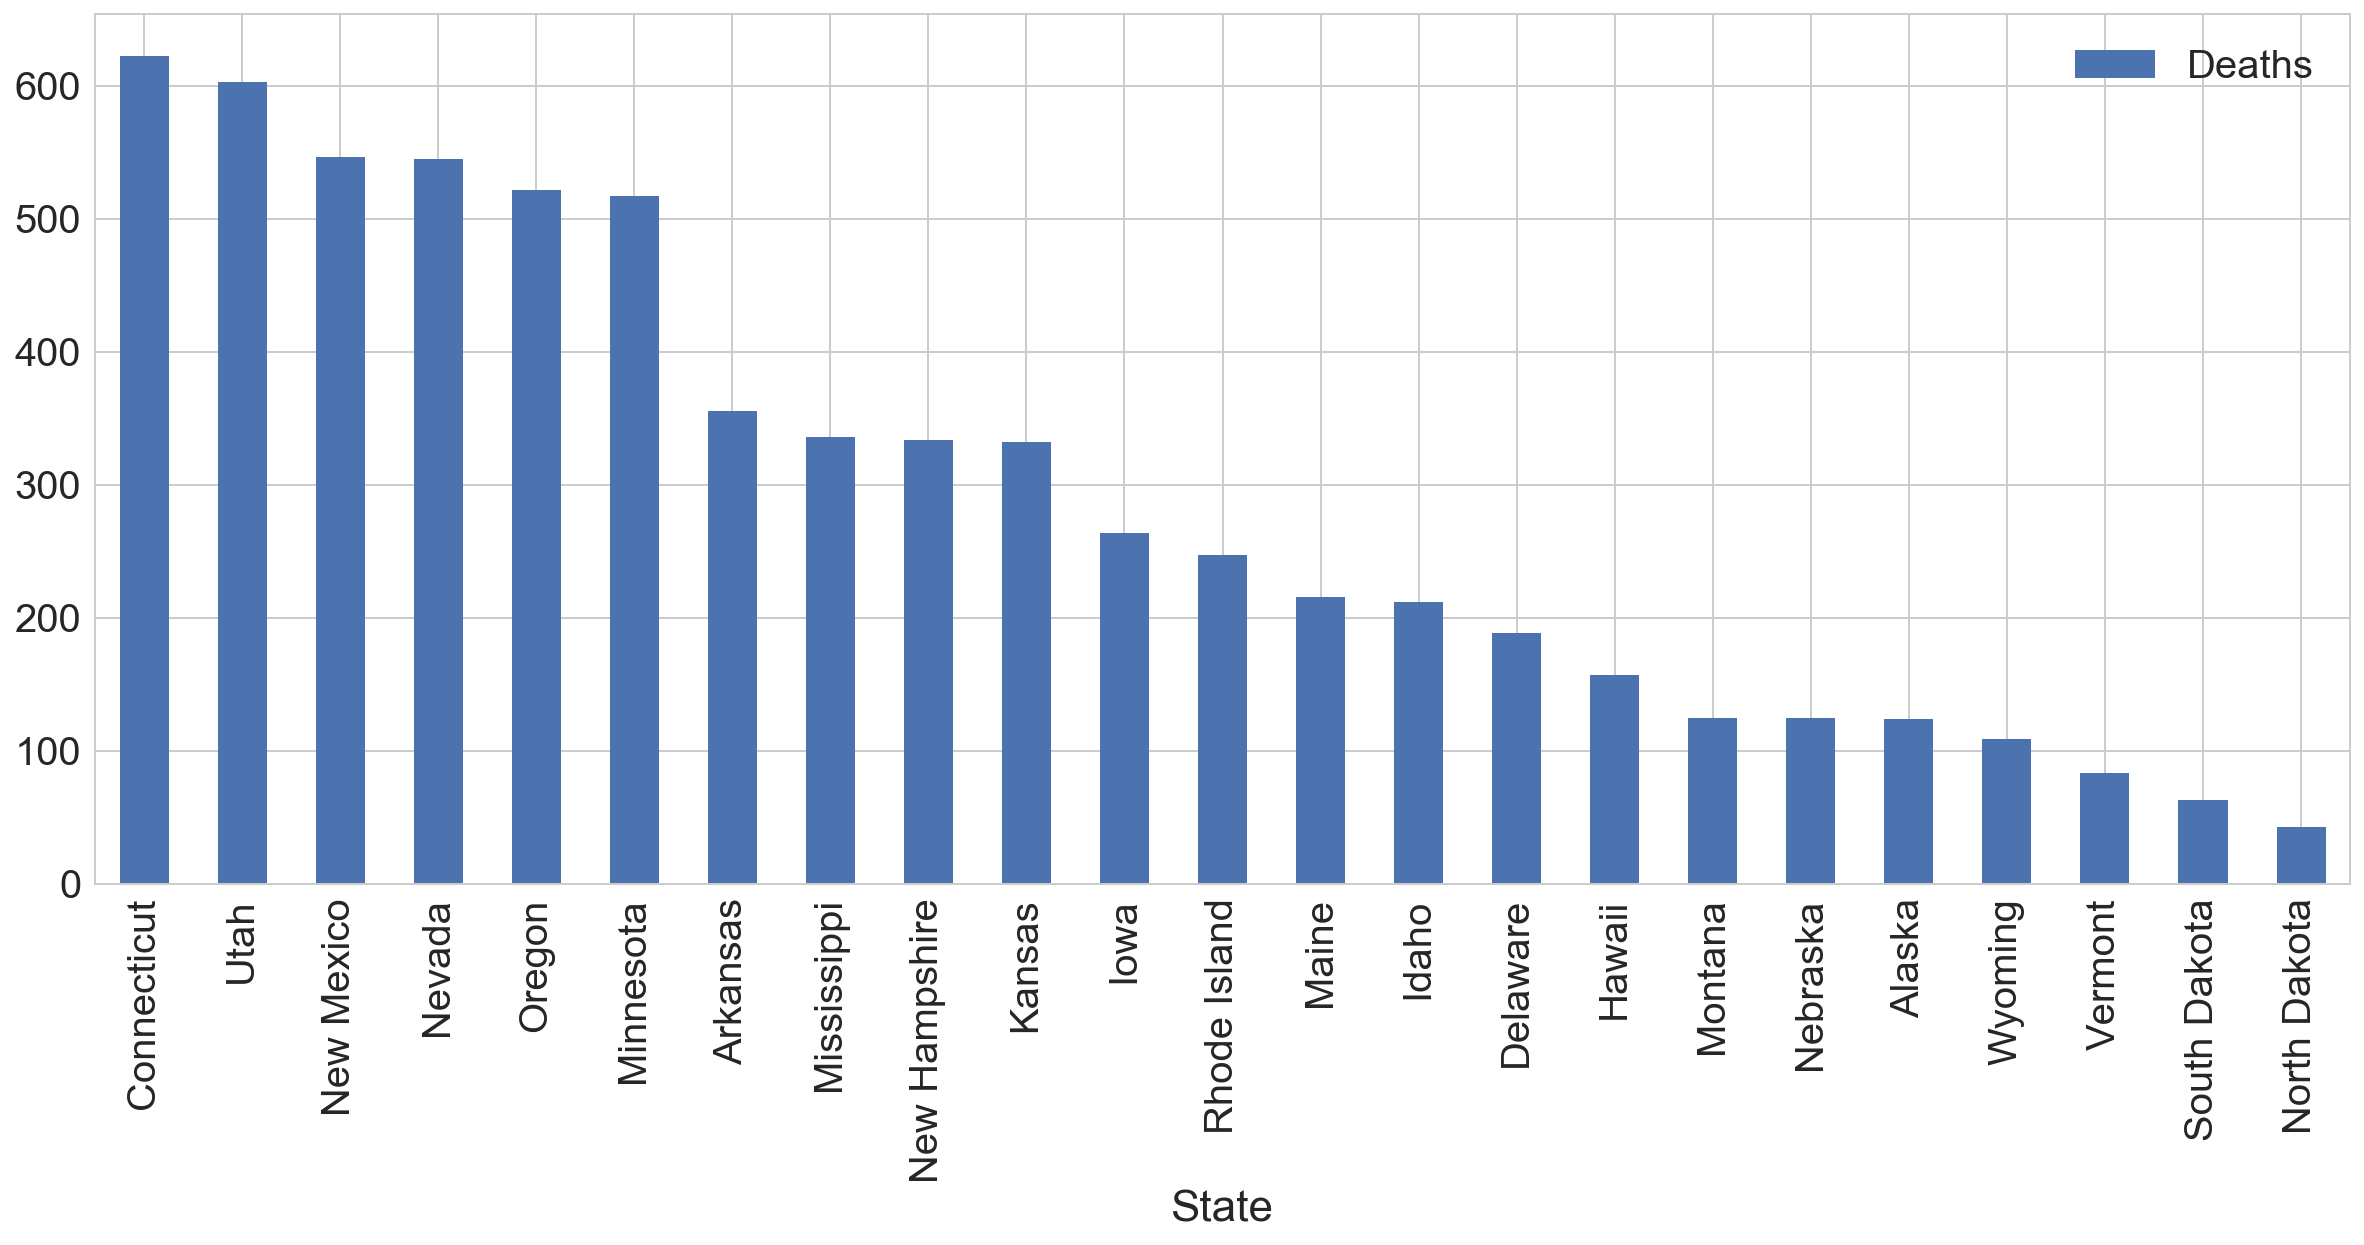

In [10]:
OverdosesPerState.tail(23).plot(kind='bar', figsize =(18,8))

#Plotting the number of deaths per State

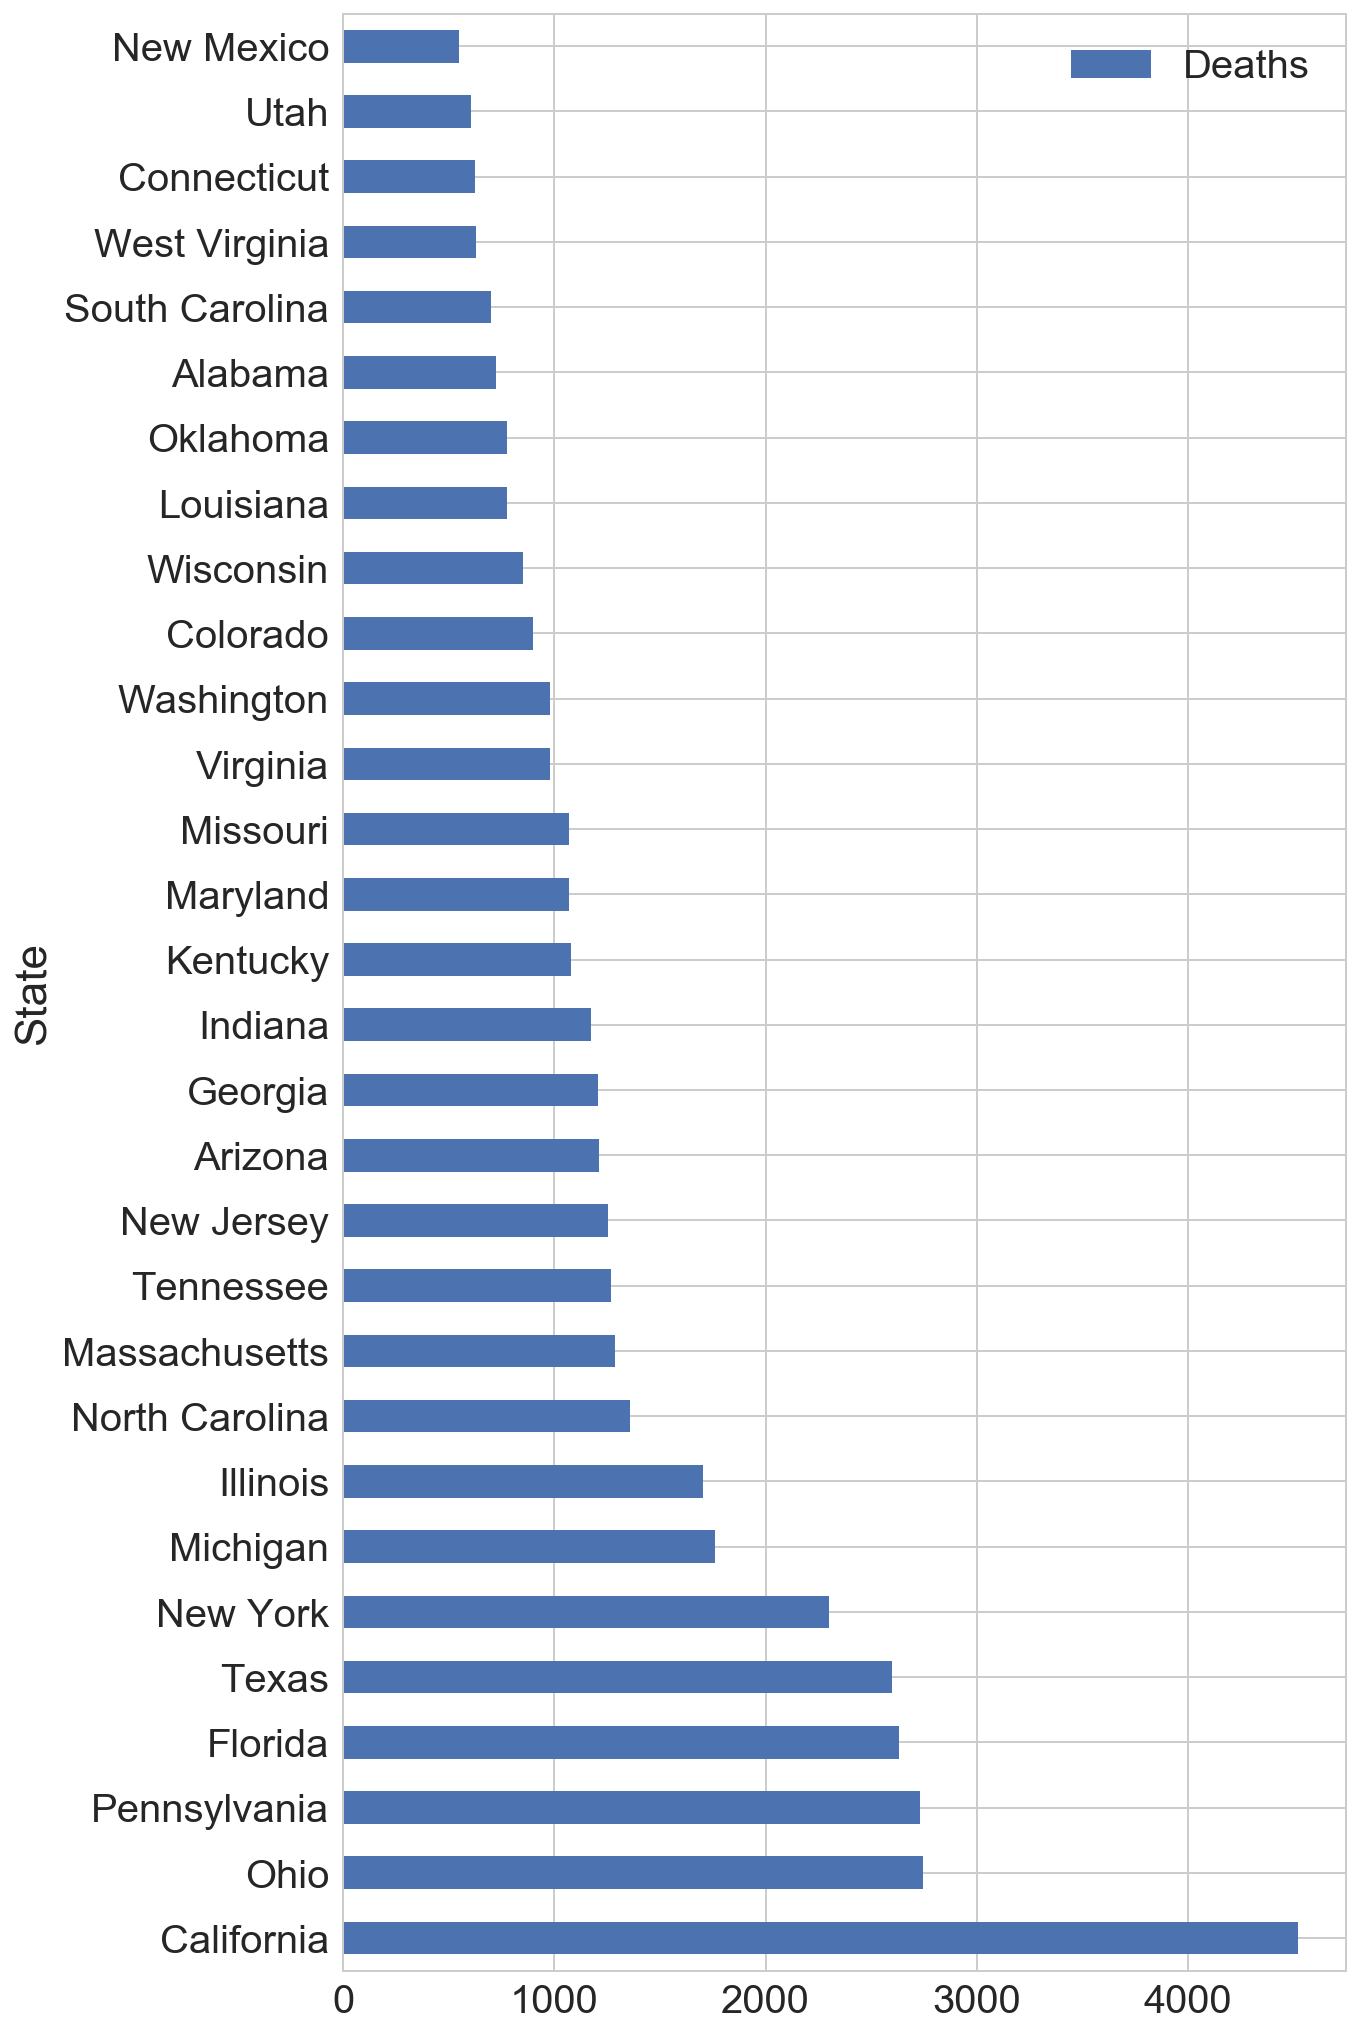

In [11]:
OverdosesPerState.head(30).plot(kind='barh', figsize =(8,18))

#Plotting the number of deaths per State  the top  30 ones  based on the aggregated overdose data by speciality

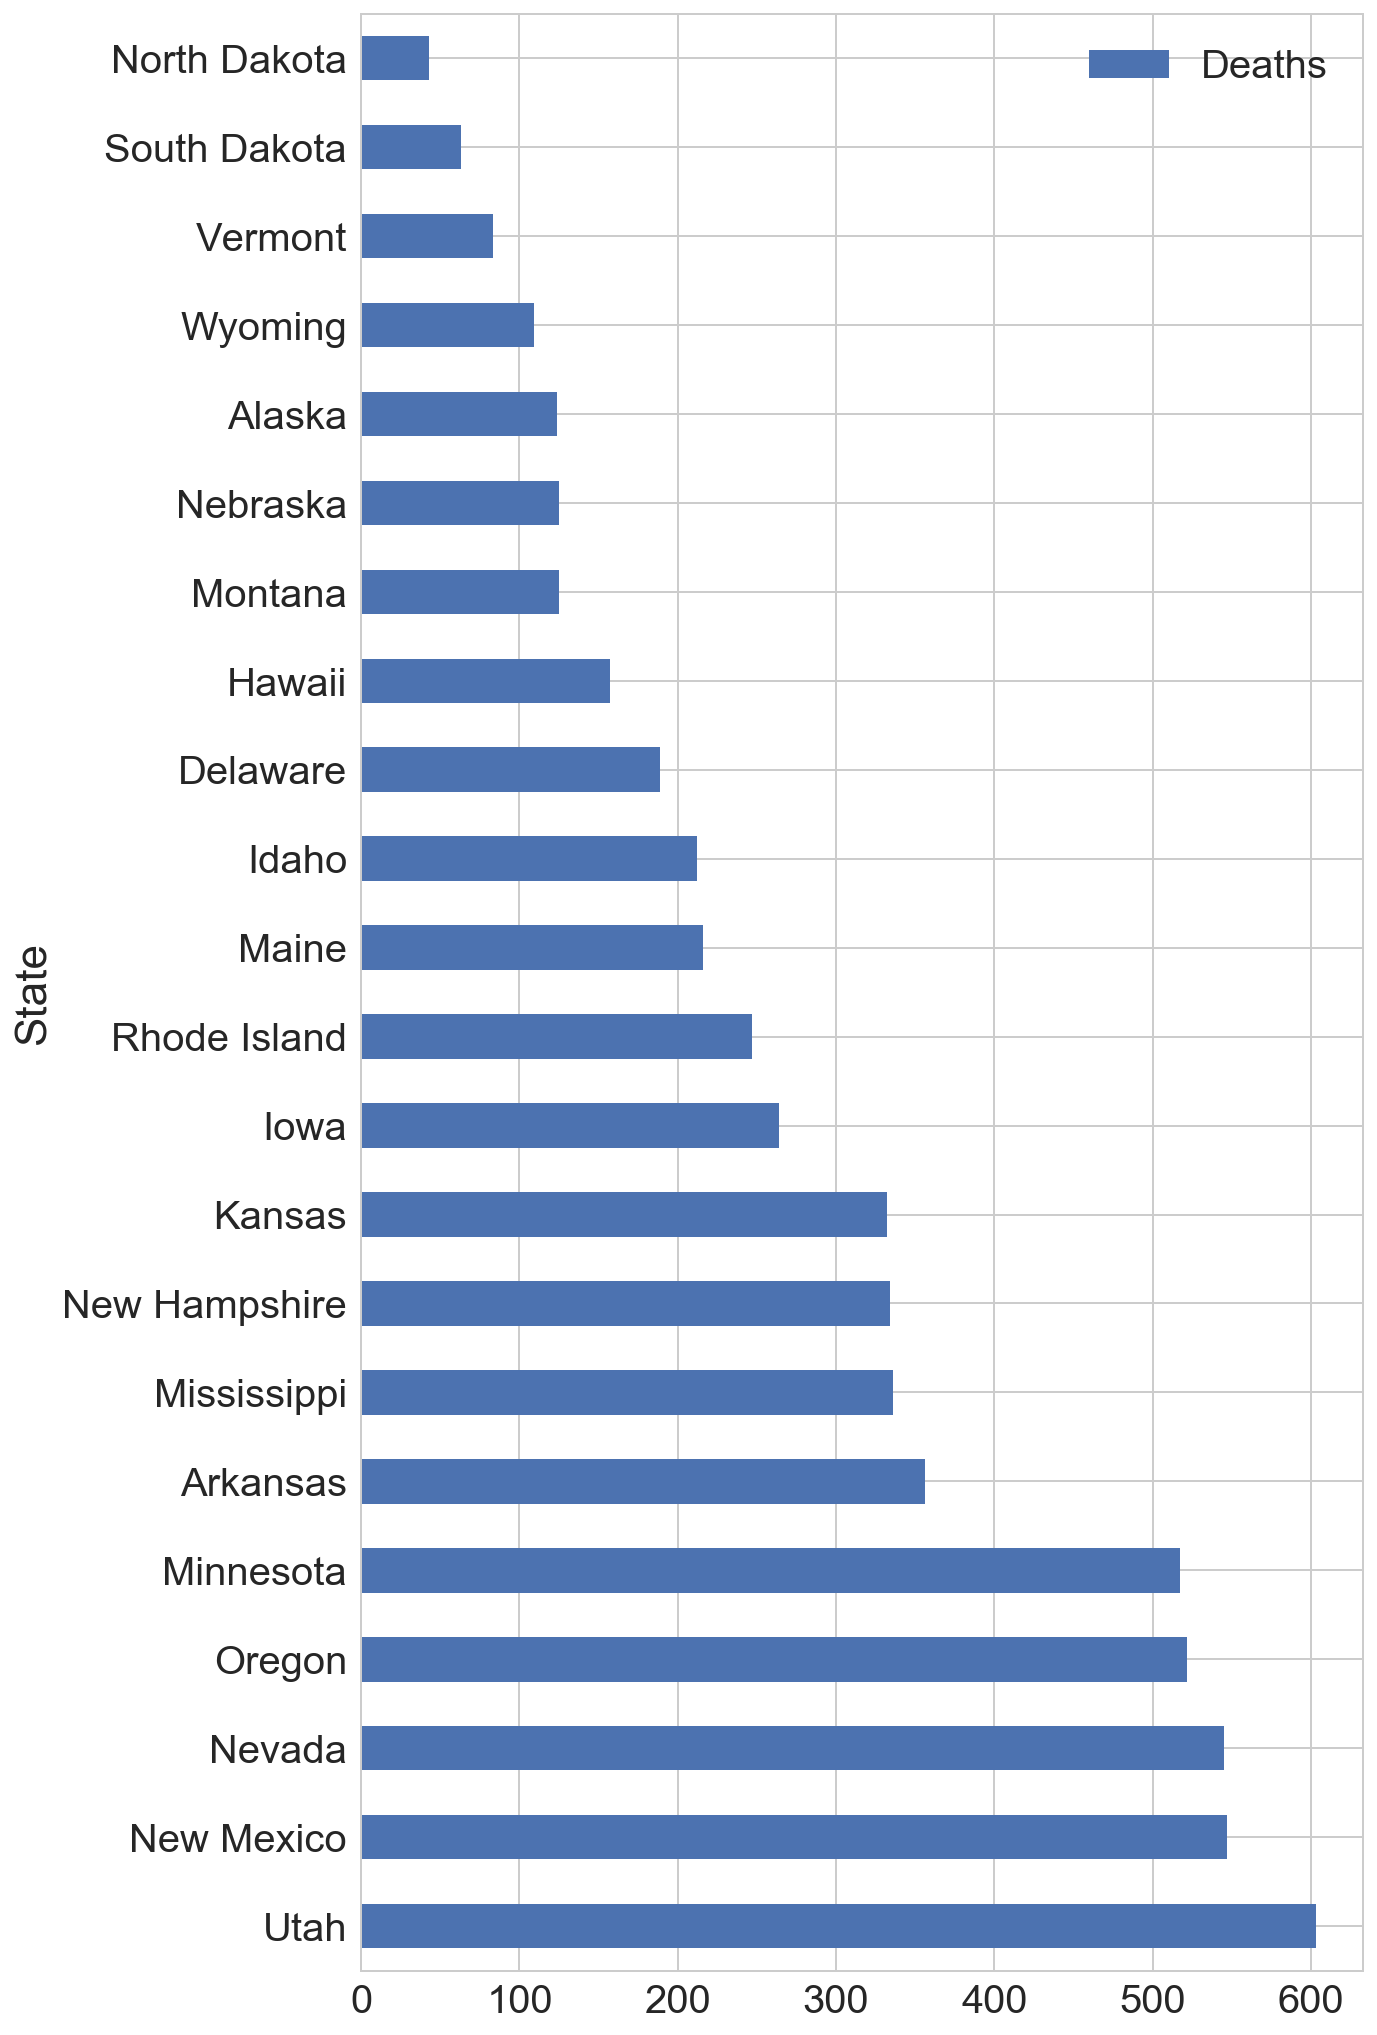

In [12]:
OverdosesPerState.tail(n=22).plot(kind='barh', figsize =(8,18))

#Plotting the number of deaths per State

In [13]:
prescriber_df= pd.read_csv('./inputs/cleaned_prescriber_info18.csv')

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
# Compute the correlation coefficient of the attributes
corr_matrix = prescriber_df.corr()

In [15]:
# Let's look at how much each attribute correlates with the Specialty 
corr_matrix['Opioid_Prescriber'].sort_values(ascending = False)[:5]

op_prescriber        1.000000
Opioid_Prescriber    1.000000
op_longer            0.999629
AMIODARONE.HCL       0.824392
CLONIDINE.HCL        0.688787
Name: Opioid_Prescriber, dtype: float64

In [16]:
prescriber_df.columns

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty',
       'NPPES Provider Last Name', 'NPPES Provider First Name',
       'NPPES Provider ZIP Code', 'NPPES Provider State', 'Totalclaimcount',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=264)

In [17]:
prescriber_df.head()[:2]

NPI Gender State  Credentials          Specialty  \
0  1003002320      M    MS  D.M.D. P.A.            Dentist   
1  1003004771      F    CO         M.D.  Pulmonary Disease   

  NPPES Provider Last Name NPPES Provider First Name  NPPES Provider ZIP Code  \
0                   EKLUND                        D.                  39208.0   
1                   RIGGLE                      ERIN                  80120.0   

  NPPES Provider State  Totalclaimcount      ...        VYTORIN  \
0                   MS              129      ...              0   
1                   CO              537      ...              0   

   WARFARIN.SODIUM  XARELTO  ZETIA  ZIPRASIDONE.HCL  ZOLPIDEM.TARTRATE  \
0                0        0      0                0                  0   
1                0       16      0                0                  0   

   avg_op_supply  op_longer  Opioid_Prescriber  op_prescriber  
0            4.5        1.0                  1            1.0  
1            4.5        0.0                  0            0.0  

[2 rows x 264 columns]

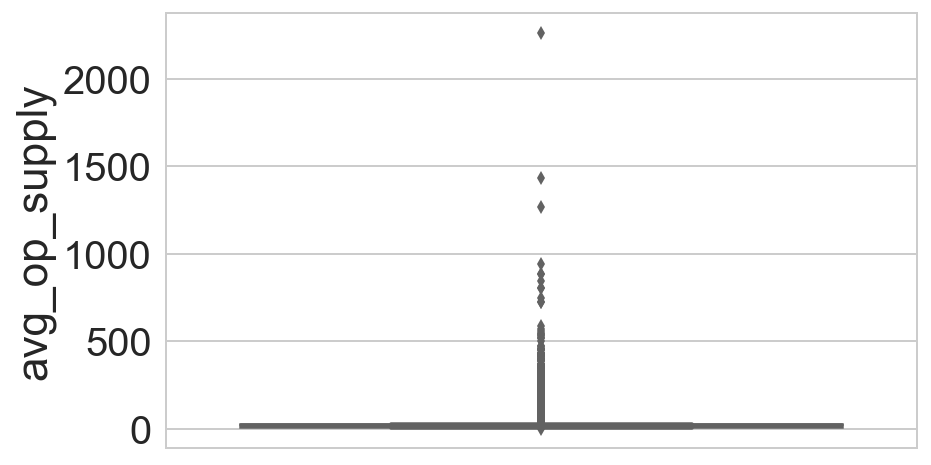

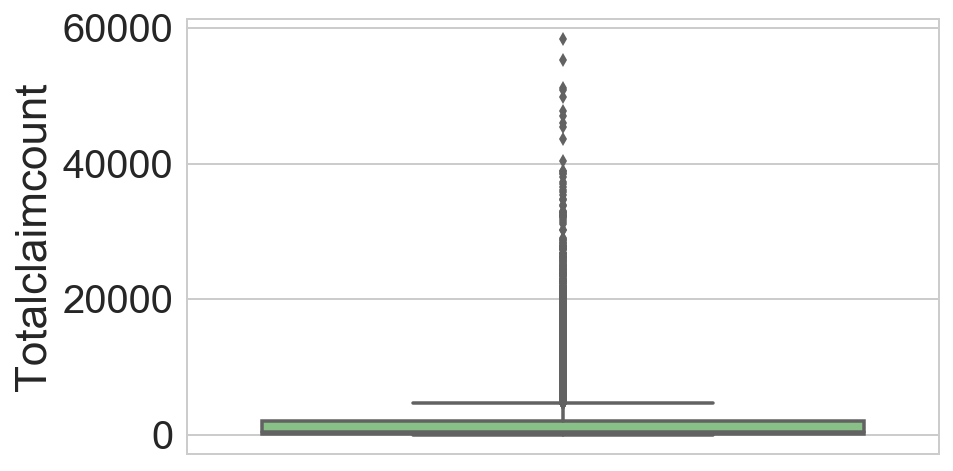

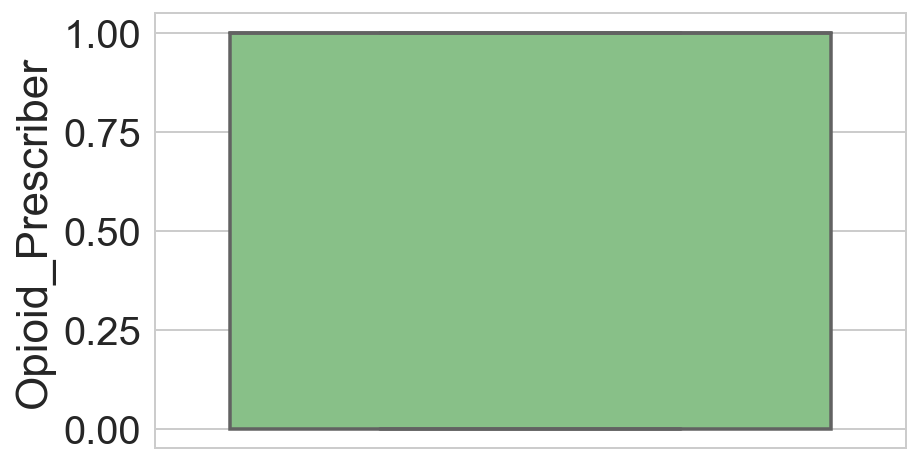

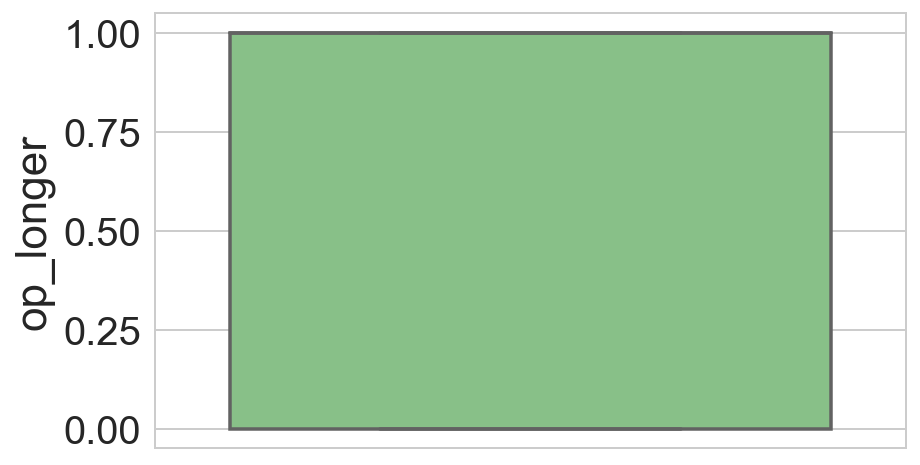

In [18]:
sns.set_palette("Accent")

attrib_list = ['avg_op_supply','Totalclaimcount', 'Opioid_Prescriber', 'op_longer']

for attrib in attrib_list:
    plt.figure()
    sns.boxplot( y = attrib, data = prescriber_df.dropna())

The boxplots show that the attributes have some outliers and as can be seen there is significant outlier visible in the first  two;which is average supply and total cliam count of opiods as compared to the two box plots that follow indicating that once the patient is in the medication its easy to manipuate than to start the regulated pain medications. The outliers are the obsevations in my data set for example average supply of opiods is taken from the total cliam of opiods and the total claim count and that's why they are showing significant or farness from the other obsevations in the base of the bocplot. Therefore, since average supply has extreme values, i will not use it for the prediction of opiods.

In [19]:
prescriber_df['Specialty'].value_counts(normalize=True)[:5]

Internal Medicine      0.13524
Family Practice        0.12820
Dentist                0.11732
Nurse Practitioner     0.10372
Physician Assistant    0.07688
Name: Specialty, dtype: float64

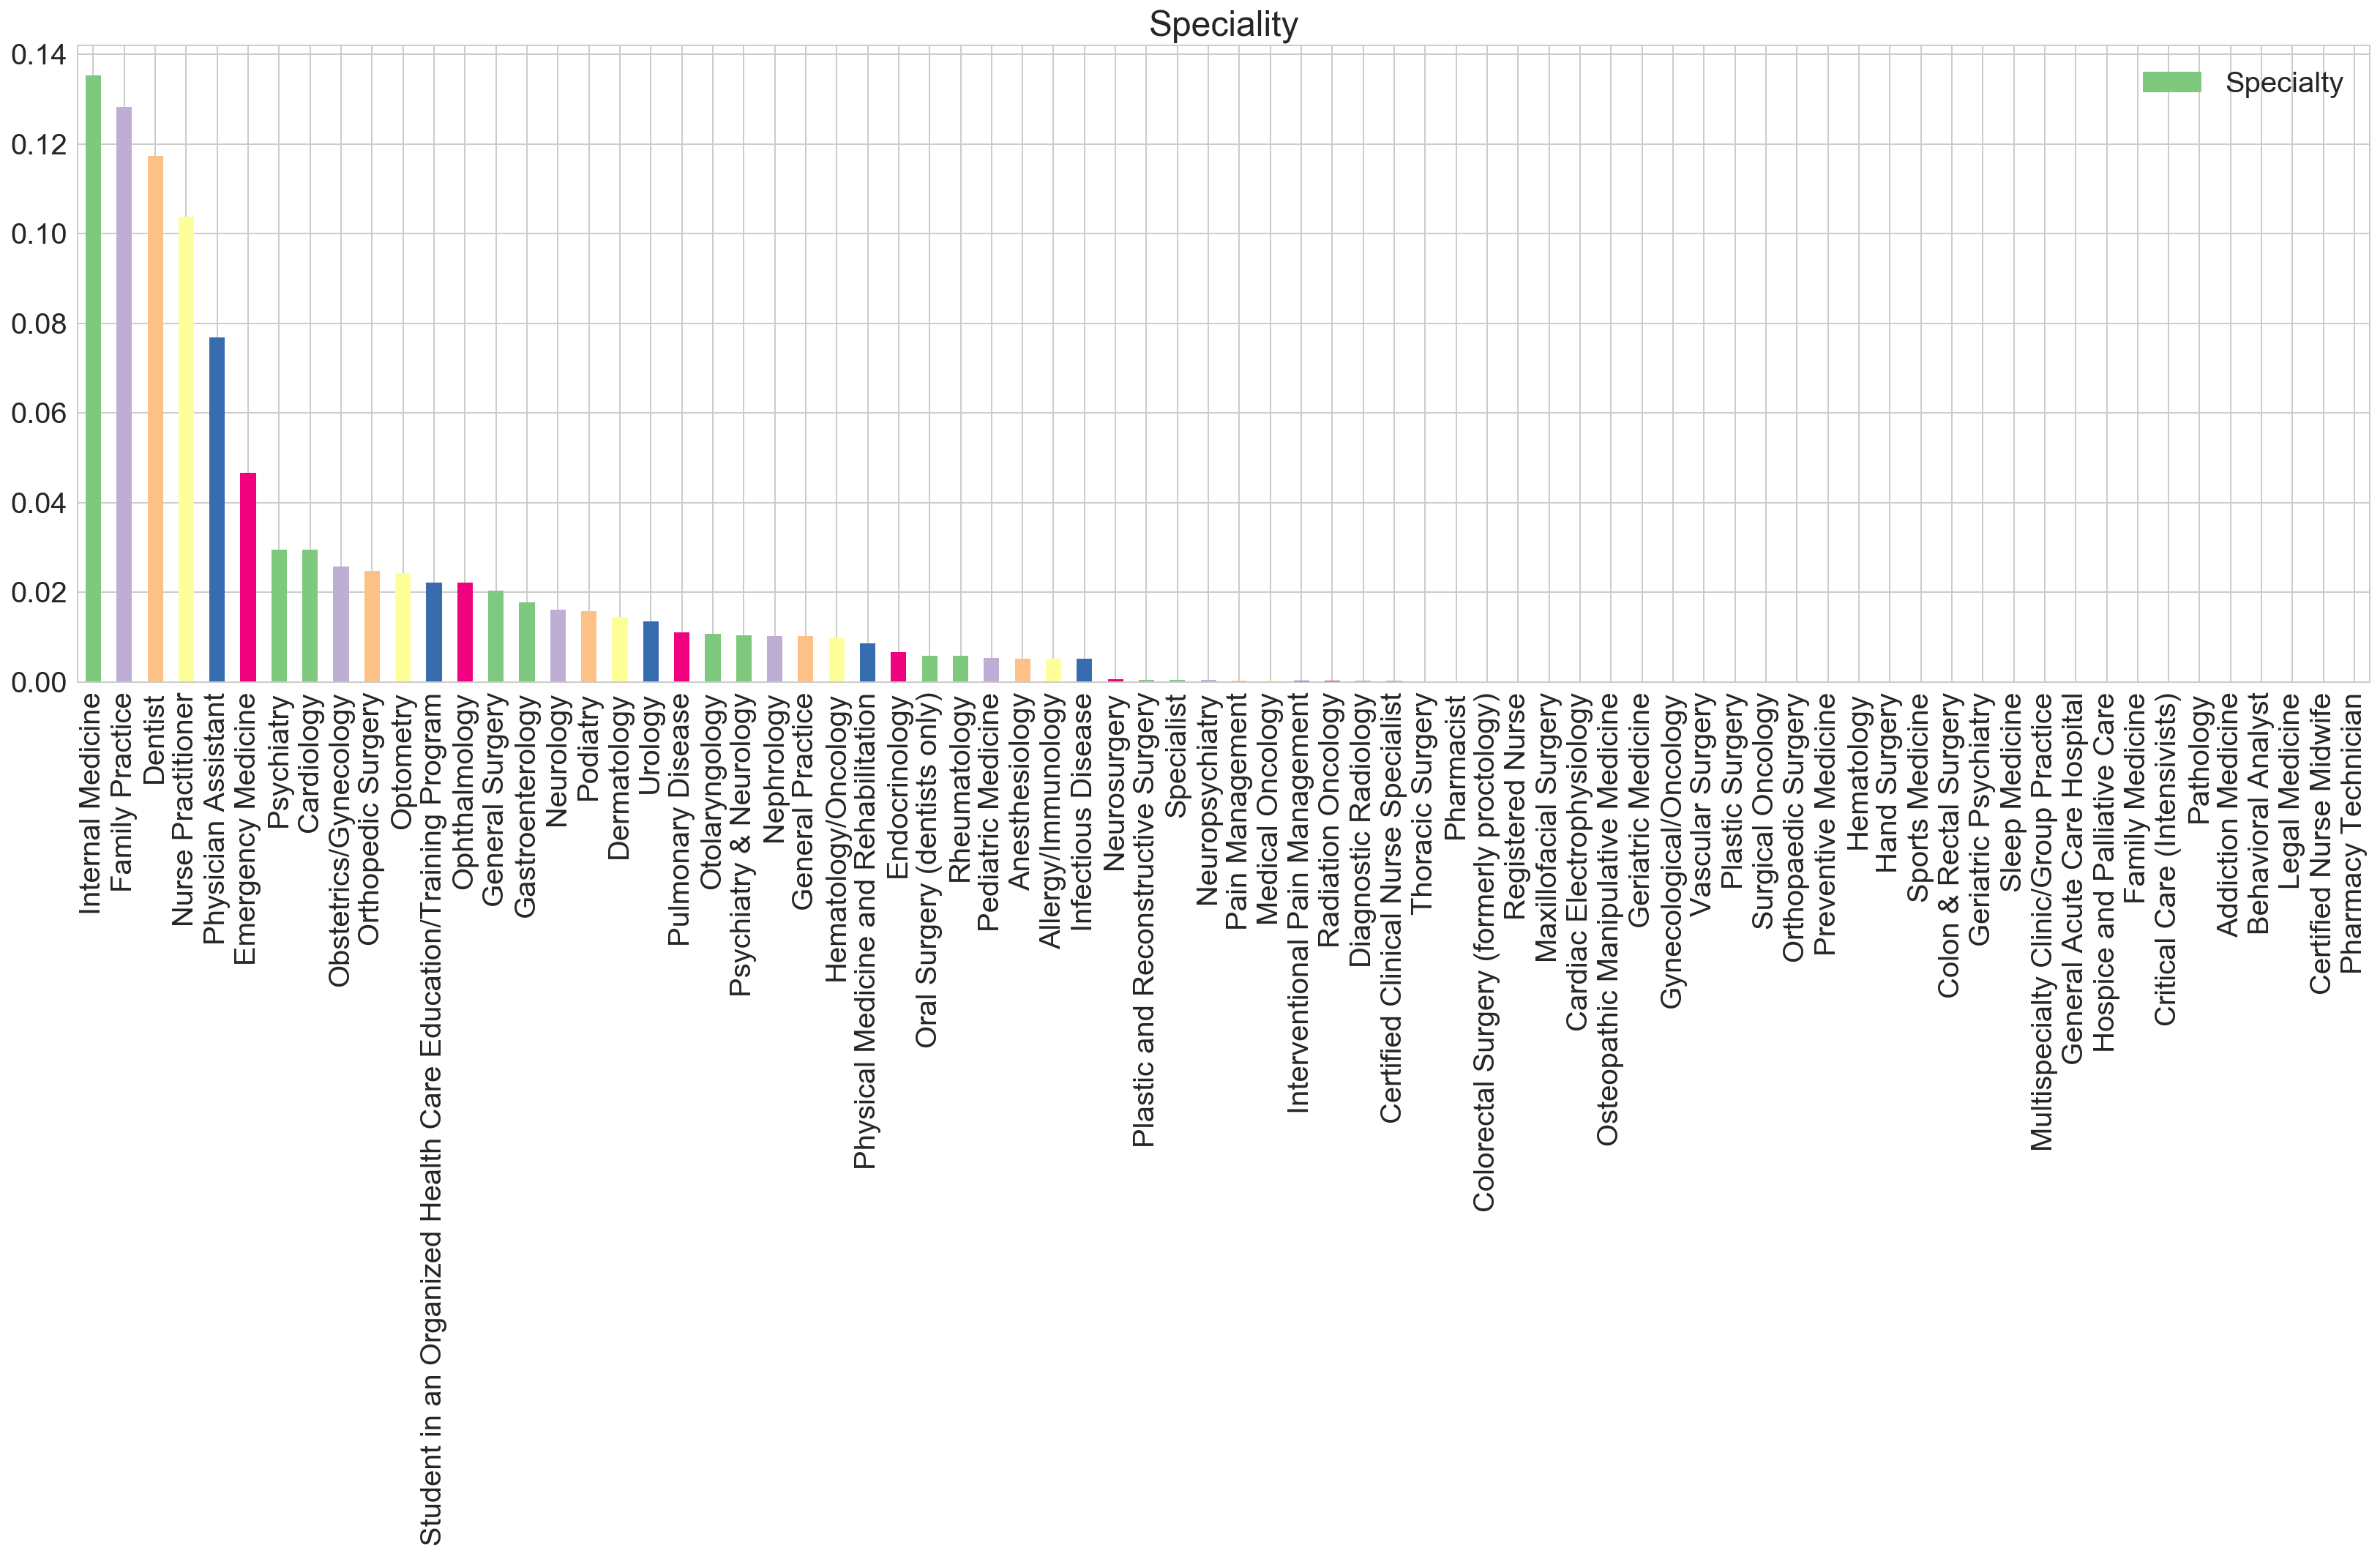

In [20]:
# set fig size
fig,ax =plt.subplots(figsize=(25,8))
prescriber_df['Specialty'].value_counts(normalize=True).plot(kind ='bar',ax=ax)
plt.title('Speciality')
plt.legend(loc ='upper right')

In [21]:
prescriber_df.corr()[['Opioid_Prescriber']].apply(abs).sort_values('Opioid_Prescriber', ascending=False)

Opioid_Prescriber
op_prescriber                            1.000000
Opioid_Prescriber                        1.000000
op_longer                                0.999629
AMIODARONE.HCL                           0.824392
CLONIDINE.HCL                            0.688787
DICLOFENAC.SODIUM                        0.613848
QUINAPRIL.HCL                            0.568144
CLINDAMYCIN.HCL                          0.524840
GEMFIBROZIL                              0.493581
PHENOBARBITAL                            0.462150
TRIAMCINOLONE.ACETONIDE                  0.452461
SOTALOL                                  0.444409
LIDOCAINE                                0.443917
ONDANSETRON.HCL                          0.422294
AMLODIPINE.BESYLATE.BENAZEPRIL           0.401080
HYDROCORTISONE                           0.349663
METRONIDAZOLE                            0.343729
DOXYCYCLINE.HYCLATE                      0.342834
METFORMIN.HCL.ER                         0.341818
AVODART                                  0.337035
TOPROL.XL                                0.335325
LISINOPRIL.HYDROCHLOROTHIAZIDE           0.329119
PRADAXA                                  0.321595
LOSARTAN.HYDROCHLOROTHIAZIDE             0.320417
LITHIUM.CARBONATE                        0.314363
NIACIN.ER                                0.305672
ESTRADIOL                                0.291538
VENTOLIN.HFA                             0.285252
BISOPROLOL.HYDROCHLOROTHIAZIDE           0.276212
CLOTRIMAZOLE.BETAMETHASONE               0.274420
...                                           ...
FAMOTIDINE                               0.006060
QUETIAPINE.FUMARATE                      0.005858
DIVALPROEX.SODIUM                        0.005553
TIZANIDINE.HCL                           0.005518
LAMOTRIGINE                              0.004942
NPI                                      0.004880
PANTOPRAZOLE.SODIUM                      0.004867
SPIRIVA                                  0.004087
ALENDRONATE.SODIUM                       0.004066
AZITHROMYCIN                             0.003953
METHOTREXATE                             0.003931
MORPHINE.SULFATE.ER                      0.003863
IRBESARTAN                               0.003856
CRESTOR                                  0.003761
TOPIRAMATE                               0.003705
NAMENDA                                  0.003527
AMLODIPINE.BESYLATE                      0.003527
BUMETANIDE                               0.003068
MIRTAZAPINE                              0.002944
ADVAIR.DISKUS                            0.002446
SERTRALINE.HCL                           0.001887
IBUPROFEN                                0.001862
LEVEMIR                                  0.001839
HYDROCHLOROTHIAZIDE                      0.001773
NEXIUM                                   0.001535
CIPROFLOXACIN.HCL                        0.001523
DIOVAN                                   0.001266
FENOFIBRATE                              0.001244
CELEBREX                                 0.001056
CLOBETASOL.PROPIONATE                    0.000018

[257 rows x 1 columns]

In [22]:
prescriber_df.head()[:2]

NPI Gender State  Credentials          Specialty  \
0  1003002320      M    MS  D.M.D. P.A.            Dentist   
1  1003004771      F    CO         M.D.  Pulmonary Disease   

  NPPES Provider Last Name NPPES Provider First Name  NPPES Provider ZIP Code  \
0                   EKLUND                        D.                  39208.0   
1                   RIGGLE                      ERIN                  80120.0   

  NPPES Provider State  Totalclaimcount      ...        VYTORIN  \
0                   MS              129      ...              0   
1                   CO              537      ...              0   

   WARFARIN.SODIUM  XARELTO  ZETIA  ZIPRASIDONE.HCL  ZOLPIDEM.TARTRATE  \
0                0        0      0                0                  0   
1                0       16      0                0                  0   

   avg_op_supply  op_longer  Opioid_Prescriber  op_prescriber  
0            4.5        1.0                  1            1.0  
1            4.5        0.0                  0            0.0  

[2 rows x 264 columns]

# Recommended Supply of Opiods Vs Specialty 

In [23]:
prescriber_df.head()[:2]   #  prints or gives the specified amount of rows here the first two rows.

NPI Gender State  Credentials          Specialty  \
0  1003002320      M    MS  D.M.D. P.A.            Dentist   
1  1003004771      F    CO         M.D.  Pulmonary Disease   

  NPPES Provider Last Name NPPES Provider First Name  NPPES Provider ZIP Code  \
0                   EKLUND                        D.                  39208.0   
1                   RIGGLE                      ERIN                  80120.0   

  NPPES Provider State  Totalclaimcount      ...        VYTORIN  \
0                   MS              129      ...              0   
1                   CO              537      ...              0   

   WARFARIN.SODIUM  XARELTO  ZETIA  ZIPRASIDONE.HCL  ZOLPIDEM.TARTRATE  \
0                0        0      0                0                  0   
1                0       16      0                0                  0   

   avg_op_supply  op_longer  Opioid_Prescriber  op_prescriber  
0            4.5        1.0                  1            1.0  
1            4.5        0.0                  0            0.0  

[2 rows x 264 columns]

In [24]:
tmp =prescriber_df['Specialty'].value_counts()  # useful for categorical variables but also  used numerical variables
misc_spec =tmp[tmp<100].index   # here i am indexing to get the speciality who have prescriptions less than 100

In [25]:
misc_spec

Index(['Neurosurgery', 'Plastic and Reconstructive Surgery', 'Specialist',
       'Neuropsychiatry', 'Pain Management', 'Medical Oncology',
       'Interventional Pain Management', 'Radiation Oncology',
       'Diagnostic Radiology', 'Certified Clinical Nurse Specialist',
       'Thoracic Surgery', 'Pharmacist',
       'Colorectal Surgery (formerly proctology)', 'Registered Nurse',
       'Maxillofacial Surgery', 'Cardiac Electrophysiology',
       'Osteopathic Manipulative Medicine', 'Geriatric Medicine',
       'Gynecological/Oncology', 'Vascular Surgery', 'Plastic Surgery',
       'Surgical Oncology', 'Orthopaedic Surgery', 'Preventive Medicine',
       'Hematology', 'Hand Surgery', 'Sports Medicine',
       'Colon & Rectal Surgery', 'Geriatric Psychiatry', 'Sleep Medicine',
       'Multispecialty Clinic/Group Practice', 'General Acute Care Hospital',
       'Hospice and Palliative Care', 'Family Medicine',
       'Critical Care (Intensivists)', 'Pathology', 'Addiction Medicine',
  

In [26]:
prescriber_df.describe()[:5]  #  this gives the statistics summary of the numerical values of the DF

NPI  NPPES Provider ZIP Code  Totalclaimcount  \
count  2.500000e+04             22390.000000     25000.000000   
mean   1.497815e+09             48156.120232      1698.879960   
std    2.879339e+08             30003.420351      3512.928148   
min    1.003002e+09               601.000000         0.000000   
25%    1.245430e+09             22031.500000        75.000000   

       OpioidClaimCount  ACETAMINOPHEN.CODEINE     ACYCLOVIR  ADVAIR.DISKUS  \
count      25000.000000           25000.000000  25000.000000   25000.000000   
mean          80.216440               2.539120      1.169320       6.938680   
std          264.465556              12.504745      6.805065      25.619397   
min            0.000000               0.000000      0.000000       0.000000   
25%            0.000000               0.000000      0.000000       0.000000   

           AGGRENOX  ALENDRONATE.SODIUM   ALLOPURINOL      ...        \
count  25000.000000        25000.000000  25000.000000      ...         
mean       1.333360            8.763960      9.957560      ...         
std        9.105226           36.012932     30.567146      ...         
min        0.000000            0.000000      0.000000      ...         
25%        0.000000            0.000000      0.000000      ...         

            VYTORIN  WARFARIN.SODIUM      XARELTO         ZETIA  \
count  25000.000000     25000.000000  25000.00000  25000.000000   
mean       1.030800        18.253280      4.92088      4.308920   
std        8.167705        81.237655     24.69952     19.147394   
min        0.000000         0.000000      0.00000      0.000000   
25%        0.000000         0.000000      0.00000      0.000000   

       ZIPRASIDONE.HCL  ZOLPIDEM.TARTRATE  avg_op_supply     op_longer  \
count     25000.000000       25000.000000   22390.000000  22390.000000   
mean          1.428480          11.148480      23.306757      0.595400   
std          11.375485          36.323232      41.877051      0.490825   
min           0.000000           0.000000       0.000000      0.000000   
25%           0.000000           0.000000      11.200000      0.000000   

       Opioid_Prescriber  op_prescriber  
count       25000.000000   22390.000000  
mean            1.721560       0.595578  
std            15.200218       0.490791  
min             0.000000       0.000000  
25%             0.000000       0.000000  

[5 rows x 257 columns]

In [27]:
prescriber_df.columns   # checking the column names and in pandas they are the indexs

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty',
       'NPPES Provider Last Name', 'NPPES Provider First Name',
       'NPPES Provider ZIP Code', 'NPPES Provider State', 'Totalclaimcount',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=264)

In [28]:
prescriber_df.dtypes  #  this gives the data types of each column

NPI                                 int64
Gender                             object
State                              object
Credentials                        object
Specialty                          object
NPPES Provider Last Name           object
NPPES Provider First Name          object
NPPES Provider ZIP Code           float64
NPPES Provider State               object
Totalclaimcount                     int64
OpioidClaimCount                    int64
ACETAMINOPHEN.CODEINE               int64
ACYCLOVIR                           int64
ADVAIR.DISKUS                       int64
AGGRENOX                            int64
ALENDRONATE.SODIUM                  int64
ALLOPURINOL                         int64
ALPRAZOLAM                          int64
AMIODARONE.HCL                      int64
AMITRIPTYLINE.HCL                   int64
AMLODIPINE.BESYLATE                 int64
AMLODIPINE.BESYLATE.BENAZEPRIL      int64
AMOXICILLIN                         int64
AMOX.TR.POTASSIUM.CLAVULANATE     

In [29]:
tmp = prescriber_df.Specialty.value_counts()  # here i am creating a temporary grouping by indexing the miscelaneous spec
misc_spec = tmp[ tmp < 100 ].index
prescriber_df = prescriber_df[ ~prescriber_df['Specialty'].isin(misc_spec) ]

In [30]:
tmp = prescriber_df['avg_op_supply'].groupby(prescriber_df['Specialty']).describe().unstack()
prescriber_df = prescriber_df.loc[~prescriber_df['Specialty'].isin(tmp), :]
grouped_speciality = prescriber_df['avg_op_supply'].groupby(prescriber_df['Specialty'])
grouped_speciality_mean = ggrouped_speciality.mean().sort_values(ascending=False)
top20 = grouped_speciality_mean.index[:20]
top40 = grouped_speciality_mean.index[:40]
top60 = grouped_speciality_mean.index[:60]
top80 = grouped_speciality_mean.index[:80]
top119 = grouped_speciality_mean.index[:119]
top200 = grouped_speciality_mean.index[:200]
# the group by method is commonly used for aggregation in pandas, therefore the sequence of
# many inputs here the specaility i want to summarize them in a way that can be useful to conceptualize and
# see the generalized view by state, county or location as we can see latter on the tableau or 1.6 of the notebook.
# The pandas dataframe only allows the aggregation of values with string names will be passed to aggregate
# as scalar, just value to the aggregate method. The group by Method can be passed with multiple columns at once
# but for simplicity i choose to aggregate based on speciality that are top prescribers of opiods.
#  then i index them instead of taking the multi-indexing of pandas as it would be so much difficult to
# navigate with multiindexed column or row, why because  it will create additional columns 
# which are confusing with the main features or attributes i need, as far as i know it. 

In [31]:
prescriber_df['avg_op_supply'].groupby(prescriber_df['Specialty']).describe()
# here grouping by speciality to get the average supply of opiods per speciality and then i use the 
# `.describe` to describe all the numeric values and if interested to see the categorical non numeric values
# the .describe(include=['Objects']) which describes all object columns or  
# .describe(include ="all"), which describes all columns can be applied, but here i am much more interested on the
# numeric values and i used .describe() after i group them and genarated the folloing results.

count       mean  \
Specialty                                                               
Allergy/Immunology                                   118.0  20.542373   
Anesthesiology                                       114.0   7.355263   
Cardiology                                           672.0  49.929018   
Dentist                                             2619.0  13.196525   
Dermatology                                          337.0  19.124926   
Emergency Medicine                                  1045.0  10.003158   
Endocrinology                                        152.0  44.183553   
Family Practice                                     2882.0  30.044656   
Gastroenterology                                     390.0  30.300000   
General Practice                                     230.0  36.403913   
General Surgery                                      457.0   7.126915   
Hematology/Oncology                                  216.0  13.620370   
Infectious Disease                                   113.0  26.955752   
Internal Medicine                                   3068.0  33.189081   
Nephrology                                           234.0  49.669658   
Neurology                                            359.0  39.617549   
Nurse Practitioner                                  2346.0  22.899275   
Obstetrics/Gynecology                                582.0  18.528007   
Ophthalmology                                        498.0  21.786747   
Optometry                                            546.0  17.206593   
Oral Surgery (dentists only)                         133.0   5.579699   
Orthopedic Surgery                                   559.0   3.591413   
Otolaryngology                                       246.0  19.935366   
Pediatric Medicine                                   120.0  17.692500   
Physical Medicine and Rehabilitation                 189.0   6.917460   
Physician Assistant                                 1739.0  18.192352   
Podiatry                                             359.0  13.322841   
Psychiatry                                           651.0  26.236406   
Psychiatry & Neurology                               233.0  19.627039   
Pulmonary Disease                                    255.0  31.404314   
Rheumatology                                         126.0  19.403968   
Student in an Organized Health Care Education/T...   489.0  17.322699   
Urology                                              313.0  32.984984   

                                                           std  min     25%  \
Specialty                                                                     
Allergy/Immunology                                   16.718864  7.4  18.000   
Anesthesiology                                        8.772302  1.1   1.600   
Cardiology                                          123.737263  1.0  18.000   
Dentist                                               6.710951  1.0   5.300   
Dermatology                                          13.223006  3.2  18.000   
Emergency Medicine                                   70.558005  0.0   3.700   
Endocrinology                                        74.405053  1.9  18.000   
Family Practice                                      32.800588  1.0  16.000   
Gastroenterology                                     35.700562  1.0  18.000   
General Practice                                     42.012853  1.0  18.000   
General Surgery                                       9.309762  1.1   2.100   
Hematology/Oncology                                   9.945528  1.7   7.600   
Infectious Disease                                   23.811353  3.6  18.000   
Internal Medicine                                    46.533000  1.7  17.900   
Nephrology                                           68.899281  5.2  18.000   
Neurology                                            56.030697  1.3  18.000   
Nurse Practitioner                                   30.799294  1.0  13.700

In [32]:
prescriber_df['avg_op_supply'].groupby(prescriber_df['Specialty']).describe().T[:5]

Specialty  Allergy/Immunology  Anesthesiology  Cardiology      Dentist  \
count              118.000000      114.000000  672.000000  2619.000000   
mean                20.542373        7.355263   49.929018    13.196525   
std                 16.718864        8.772302  123.737263     6.710951   
min                  7.400000        1.100000    1.000000     1.000000   
25%                 18.000000        1.600000   18.000000     5.300000   

Specialty  Dermatology  Emergency Medicine  Endocrinology  Family Practice  \
count       337.000000         1045.000000     152.000000      2882.000000   
mean         19.124926           10.003158      44.183553        30.044656   
std          13.223006           70.558005      74.405053        32.800588   
min           3.200000            0.000000       1.900000         1.000000   
25%          18.000000            3.700000      18.000000        16.000000   

Specialty  Gastroenterology  General Practice     ...      Pediatric Medicine  \
count            390.000000        230.000000     ...              120.000000   
mean              30.300000         36.403913     ...               17.692500   
std               35.700562         42.012853     ...                9.830164   
min                1.000000          1.000000     ...                2.100000   
25%               18.000000         18.000000     ...               18.000000   

Specialty  Physical Medicine and Rehabilitation  Physician Assistant  \
count                                189.000000          1739.000000   
mean                                   6.917460            18.192352   
std                                    7.989212            29.082014   
min                                    1.300000             1.000000   
25%                                    2.100000             4.500000   

Specialty    Podiatry  Psychiatry  Psychiatry & Neurology  Pulmonary Disease  \
count      359.000000  651.000000              233.000000         255.000000   
mean        13.322841   26.236406               19.627039          31.404314   
std         10.921468   56.425299               14.527863          40.507512   
min          1.200000    1.000000                3.400000           1.000000   
25%          6.100000   18.000000               18.000000          18.000000   

Specialty  Rheumatology  \
count        126.000000   
mean          19.403968   
std           19.235527   
min            3.500000   
25%            9.525000   

Specialty  Student in an Organized Health Care Education/Training Program  \
count                                             489.000000                
mean                                               17.322699                
std                                                11.422598                
min                                                 1.100000                
25%                                                12.100000                

Specialty     Urology  
count      313.000000  
mean        32.984984  
std         31.721057  
min          1.800000  
25%         18.000000  

[5 rows x 33 columns]

In [33]:
# prescriber_df = prescriber_df.loc[~prescriber_df['Specialty'].isin(tmp), :]
# prescriber_df.head()[:2]

In [34]:
grouped_speciality = prescriber_df['avg_op_supply'].groupby(prescriber_df['Specialty'])
grouped_speciality.head()[:2]

0    4.5
1    4.5
Name: avg_op_supply, dtype: float64

In [35]:
grouped_speciality_mean = grouped_speciality.mean().sort_values(ascending=False)
top20 = grouped_speciality_mean.index[:20]
top40 = grouped_speciality_mean.index[:40]
top80 = grouped_speciality_mean.index[:80]
top119 = grouped_speciality_mean.index[:119]
top200 = grouped_speciality_mean.index[:200]

In [36]:
top20

Index(['Cardiology', 'Nephrology', 'Endocrinology', 'Neurology',
       'General Practice', 'Internal Medicine', 'Urology', 'Pulmonary Disease',
       'Gastroenterology', 'Family Practice', 'Infectious Disease',
       'Psychiatry', 'Nurse Practitioner', 'Ophthalmology',
       'Allergy/Immunology', 'Otolaryngology', 'Psychiatry & Neurology',
       'Rheumatology', 'Dermatology', 'Obstetrics/Gynecology'],
      dtype='object', name='Specialty')

In [37]:
top40

Index(['Cardiology', 'Nephrology', 'Endocrinology', 'Neurology',
       'General Practice', 'Internal Medicine', 'Urology', 'Pulmonary Disease',
       'Gastroenterology', 'Family Practice', 'Infectious Disease',
       'Psychiatry', 'Nurse Practitioner', 'Ophthalmology',
       'Allergy/Immunology', 'Otolaryngology', 'Psychiatry & Neurology',
       'Rheumatology', 'Dermatology', 'Obstetrics/Gynecology',
       'Physician Assistant', 'Pediatric Medicine',
       'Student in an Organized Health Care Education/Training Program',
       'Optometry', 'Hematology/Oncology', 'Podiatry', 'Dentist',
       'Emergency Medicine', 'Anesthesiology', 'General Surgery',
       'Physical Medicine and Rehabilitation', 'Oral Surgery (dentists only)',
       'Orthopedic Surgery'],
      dtype='object', name='Specialty')

In [38]:
top119

Index(['Cardiology', 'Nephrology', 'Endocrinology', 'Neurology',
       'General Practice', 'Internal Medicine', 'Urology', 'Pulmonary Disease',
       'Gastroenterology', 'Family Practice', 'Infectious Disease',
       'Psychiatry', 'Nurse Practitioner', 'Ophthalmology',
       'Allergy/Immunology', 'Otolaryngology', 'Psychiatry & Neurology',
       'Rheumatology', 'Dermatology', 'Obstetrics/Gynecology',
       'Physician Assistant', 'Pediatric Medicine',
       'Student in an Organized Health Care Education/Training Program',
       'Optometry', 'Hematology/Oncology', 'Podiatry', 'Dentist',
       'Emergency Medicine', 'Anesthesiology', 'General Surgery',
       'Physical Medicine and Rehabilitation', 'Oral Surgery (dentists only)',
       'Orthopedic Surgery'],
      dtype='object', name='Specialty')

Specialty
Allergy/Immunology                                                AxesSubplot(0.08,0.125;0.87x0.755)
Anesthesiology                                                    AxesSubplot(0.08,0.125;0.87x0.755)
Cardiology                                                        AxesSubplot(0.08,0.125;0.87x0.755)
Dentist                                                           AxesSubplot(0.08,0.125;0.87x0.755)
Dermatology                                                       AxesSubplot(0.08,0.125;0.87x0.755)
Emergency Medicine                                                AxesSubplot(0.08,0.125;0.87x0.755)
Endocrinology                                                     AxesSubplot(0.08,0.125;0.87x0.755)
Family Practice                                                   AxesSubplot(0.08,0.125;0.87x0.755)
Gastroenterology                                                  AxesSubplot(0.08,0.125;0.87x0.755)
General Practice                                                  AxesSubplot(0.0

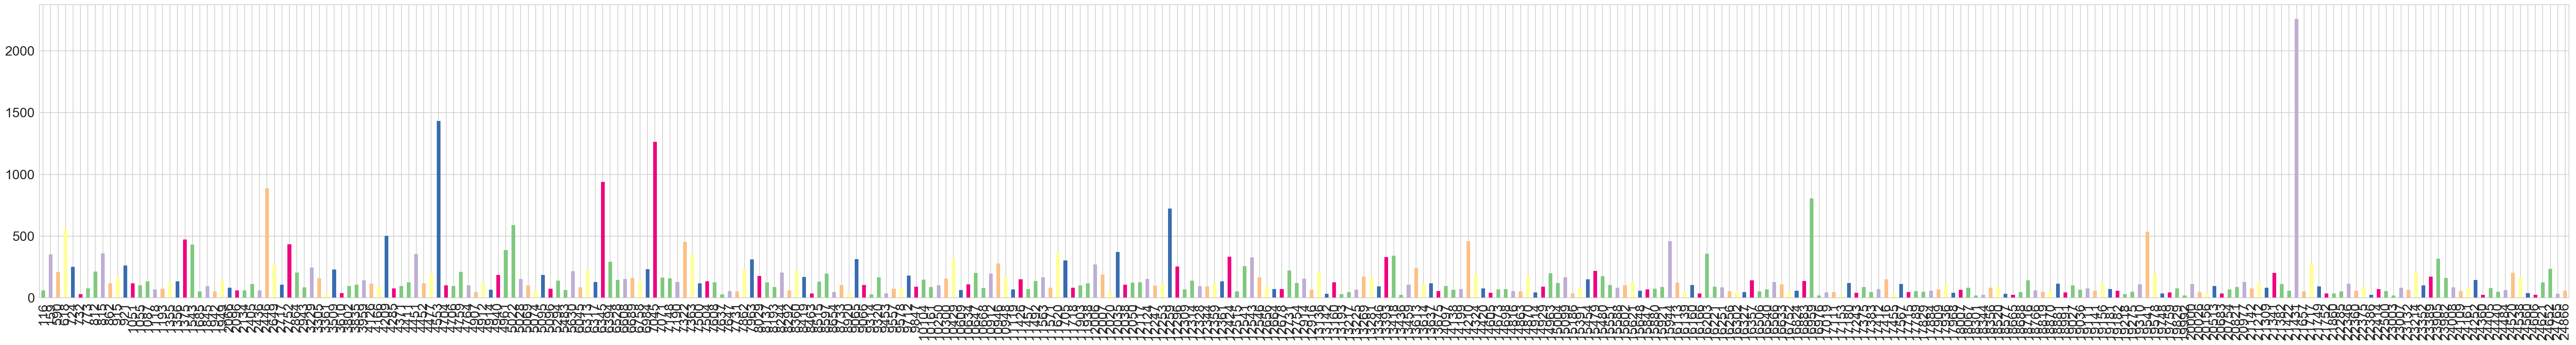

In [39]:
tmp = prescriber_df['avg_op_supply'].groupby(prescriber_df['Specialty'])
tmp.plot(kind ='bar',figsize =(60,8))

The above plot, i was trying to see all the specialities who prescribe the avergae opiod supply  all together and it ends  really long and i can not figure it out so i choose the others but its worth to show it.

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


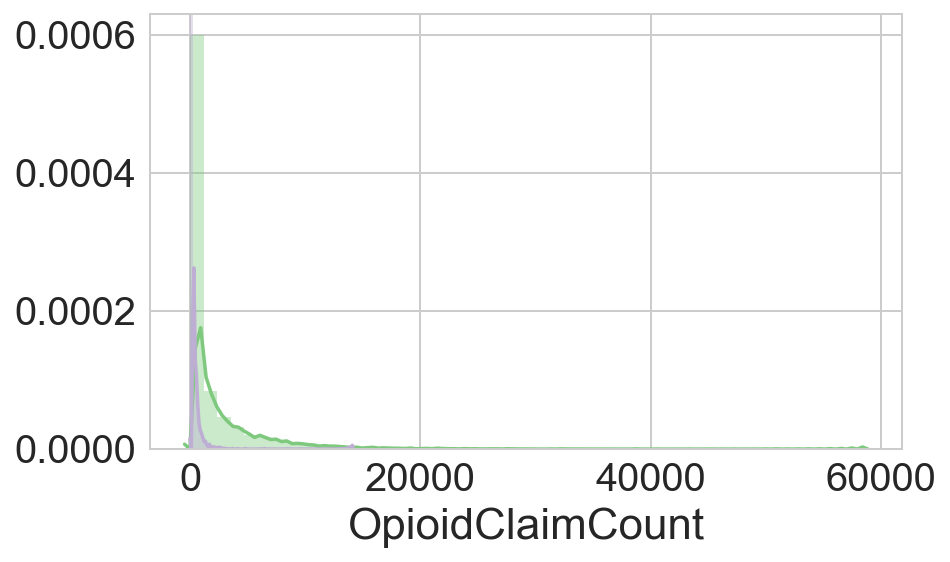

In [40]:

import seaborn  as  sns
sns.distplot(prescriber_df['Totalclaimcount'])
sns.distplot(prescriber_df['OpioidClaimCount'])

In [41]:
total_spec = prescriber_df['avg_op_supply'].groupby(prescriber_df['Specialty']).sum().sort_values(ascending=False)
#total_spec / total_spec.sum()

In [42]:
total_spec.head()[:5]

Specialty
Internal Medicine     101824.1
Family Practice        86588.7
Nurse Practitioner     53721.7
Dentist                34561.7
Cardiology             33552.3
Name: avg_op_supply, dtype: float64

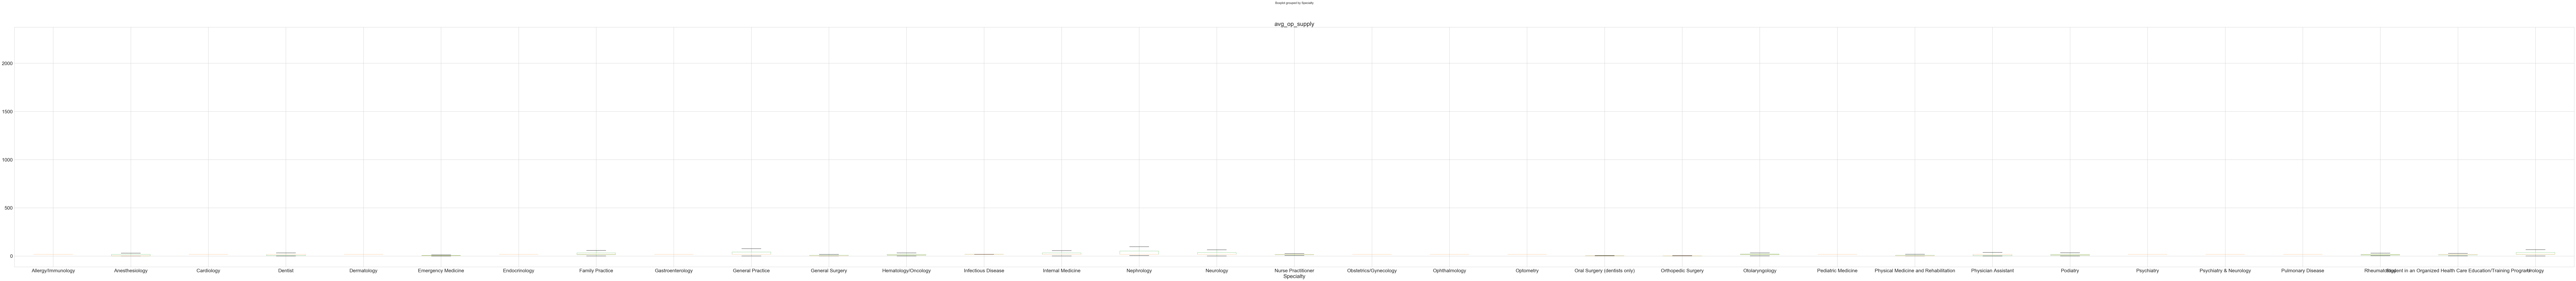

In [43]:
prescriber_df.boxplot('avg_op_supply', by='Specialty',figsize= (180,18))
# Here

#### Plotting interactive visual using plotly

Here i am  going to use the python plotly version which will need only setting the data needed to be visualized and  will display the interactive version as far you are only having less than 25 plots in total after you create your account

**The formula below works and i am just leaving them as comments as they overloaded my plotly account due to the number of plots i can have for free with out any charge, if you have account just run them and pretty nice plots will be displayed. to see  all the displays for the top20,top40,top60,top80 and top119(median) and top200 click [here](https://plot.ly/organize/home/)**

In [44]:
# import plotly.plotly as py
# import plotly.graph_objs as go
    
# result = []
# for name, group in grouped_speciality:
#     if name in top20:
#         trace = go.Box(x=group, name=name)
#         result.append(trace)
    
# py.iplot(result)

The box plot was chosed to show the top prescriber-specialists of the opiod drugs absed on the professional category and it turns out that the $cardiology$ (`diseases and abnormalities of the heart.`) specialists have the highest variability, followed by $Endocrinology$(`the branch of physiology and medicine concerned with endocrine glands and hormones`),$psychiatry$(`the study and treatment of mental illness, emotional disturbance, and abnormal behavior.`), $Nephrology$(`the branch of medicine that deals with the physiology and diseases of the kidneys.`) and $pulmonary disease $(`chronic obstructive pulmonary disease. : pulmonary disease (such as emphysema or chronic bronchitis) that is characterized by chronic typically irreversible airway obstruction resulting in a slowed rate of exhalation —abbreviation COPD`).

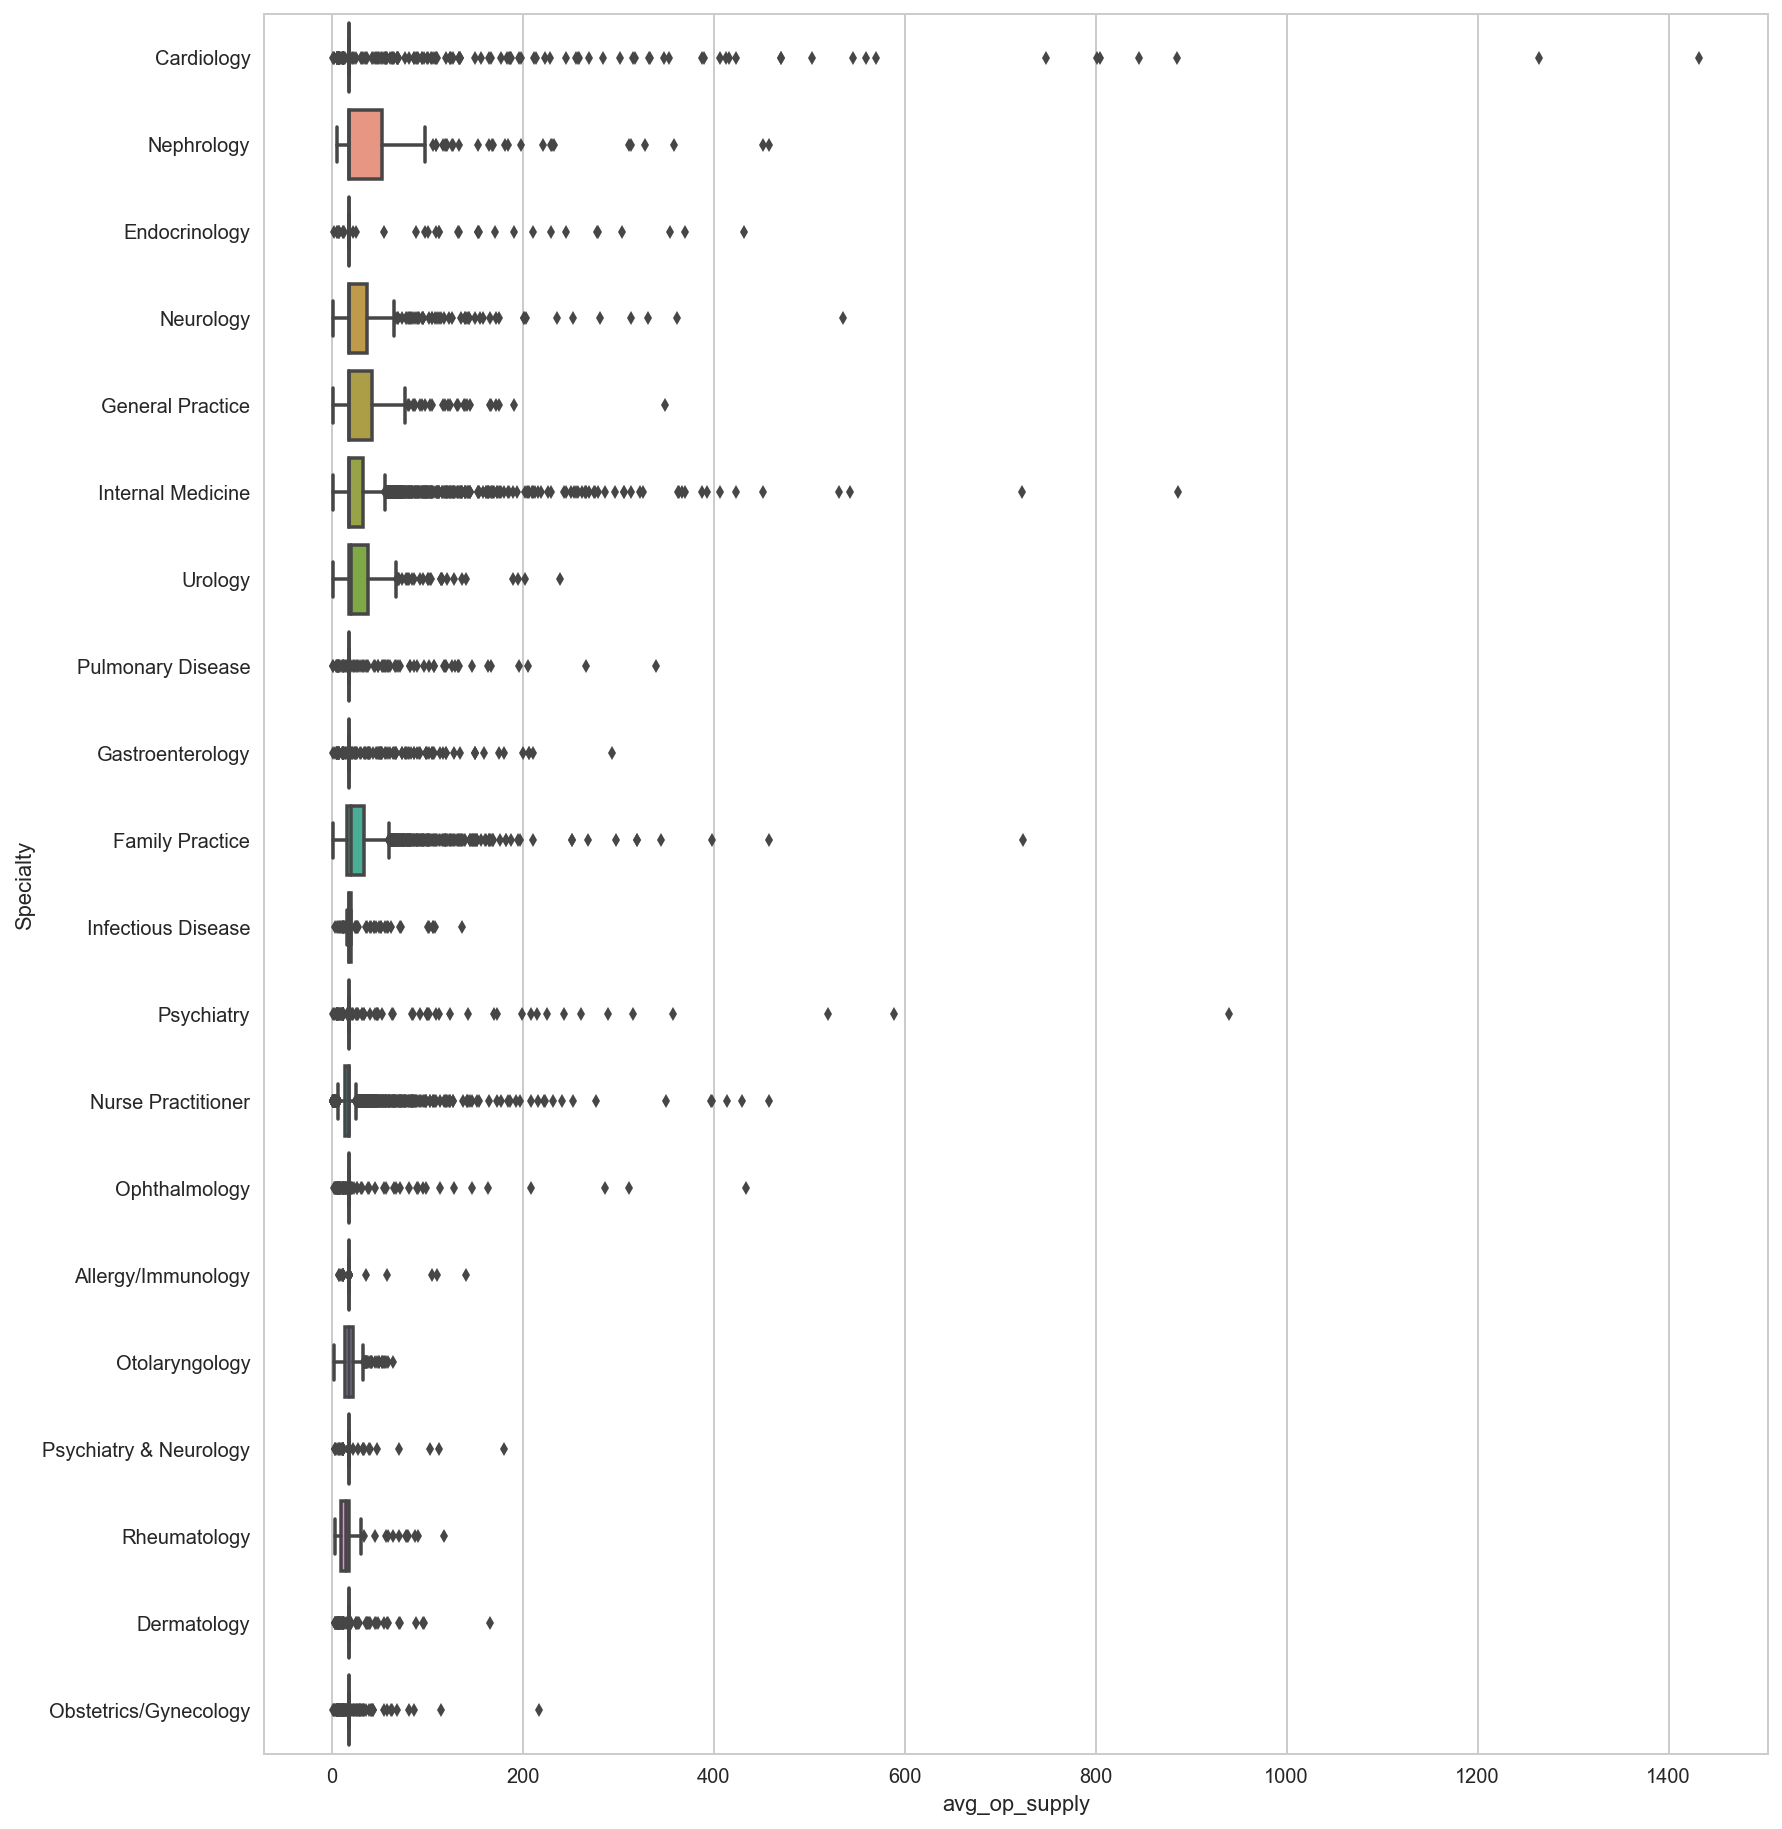

In [45]:
sns.set(style='whitegrid', rc={"figure.figsize": (12, 16)})
df_short = prescriber_df.loc[:, ['Specialty', 'avg_op_supply']]
df_short = df_short.loc[prescriber_df['Specialty'].isin(top20), :]
sns.boxplot(data=df_short, y='Specialty', x='avg_op_supply', order=top20)
plt.show()

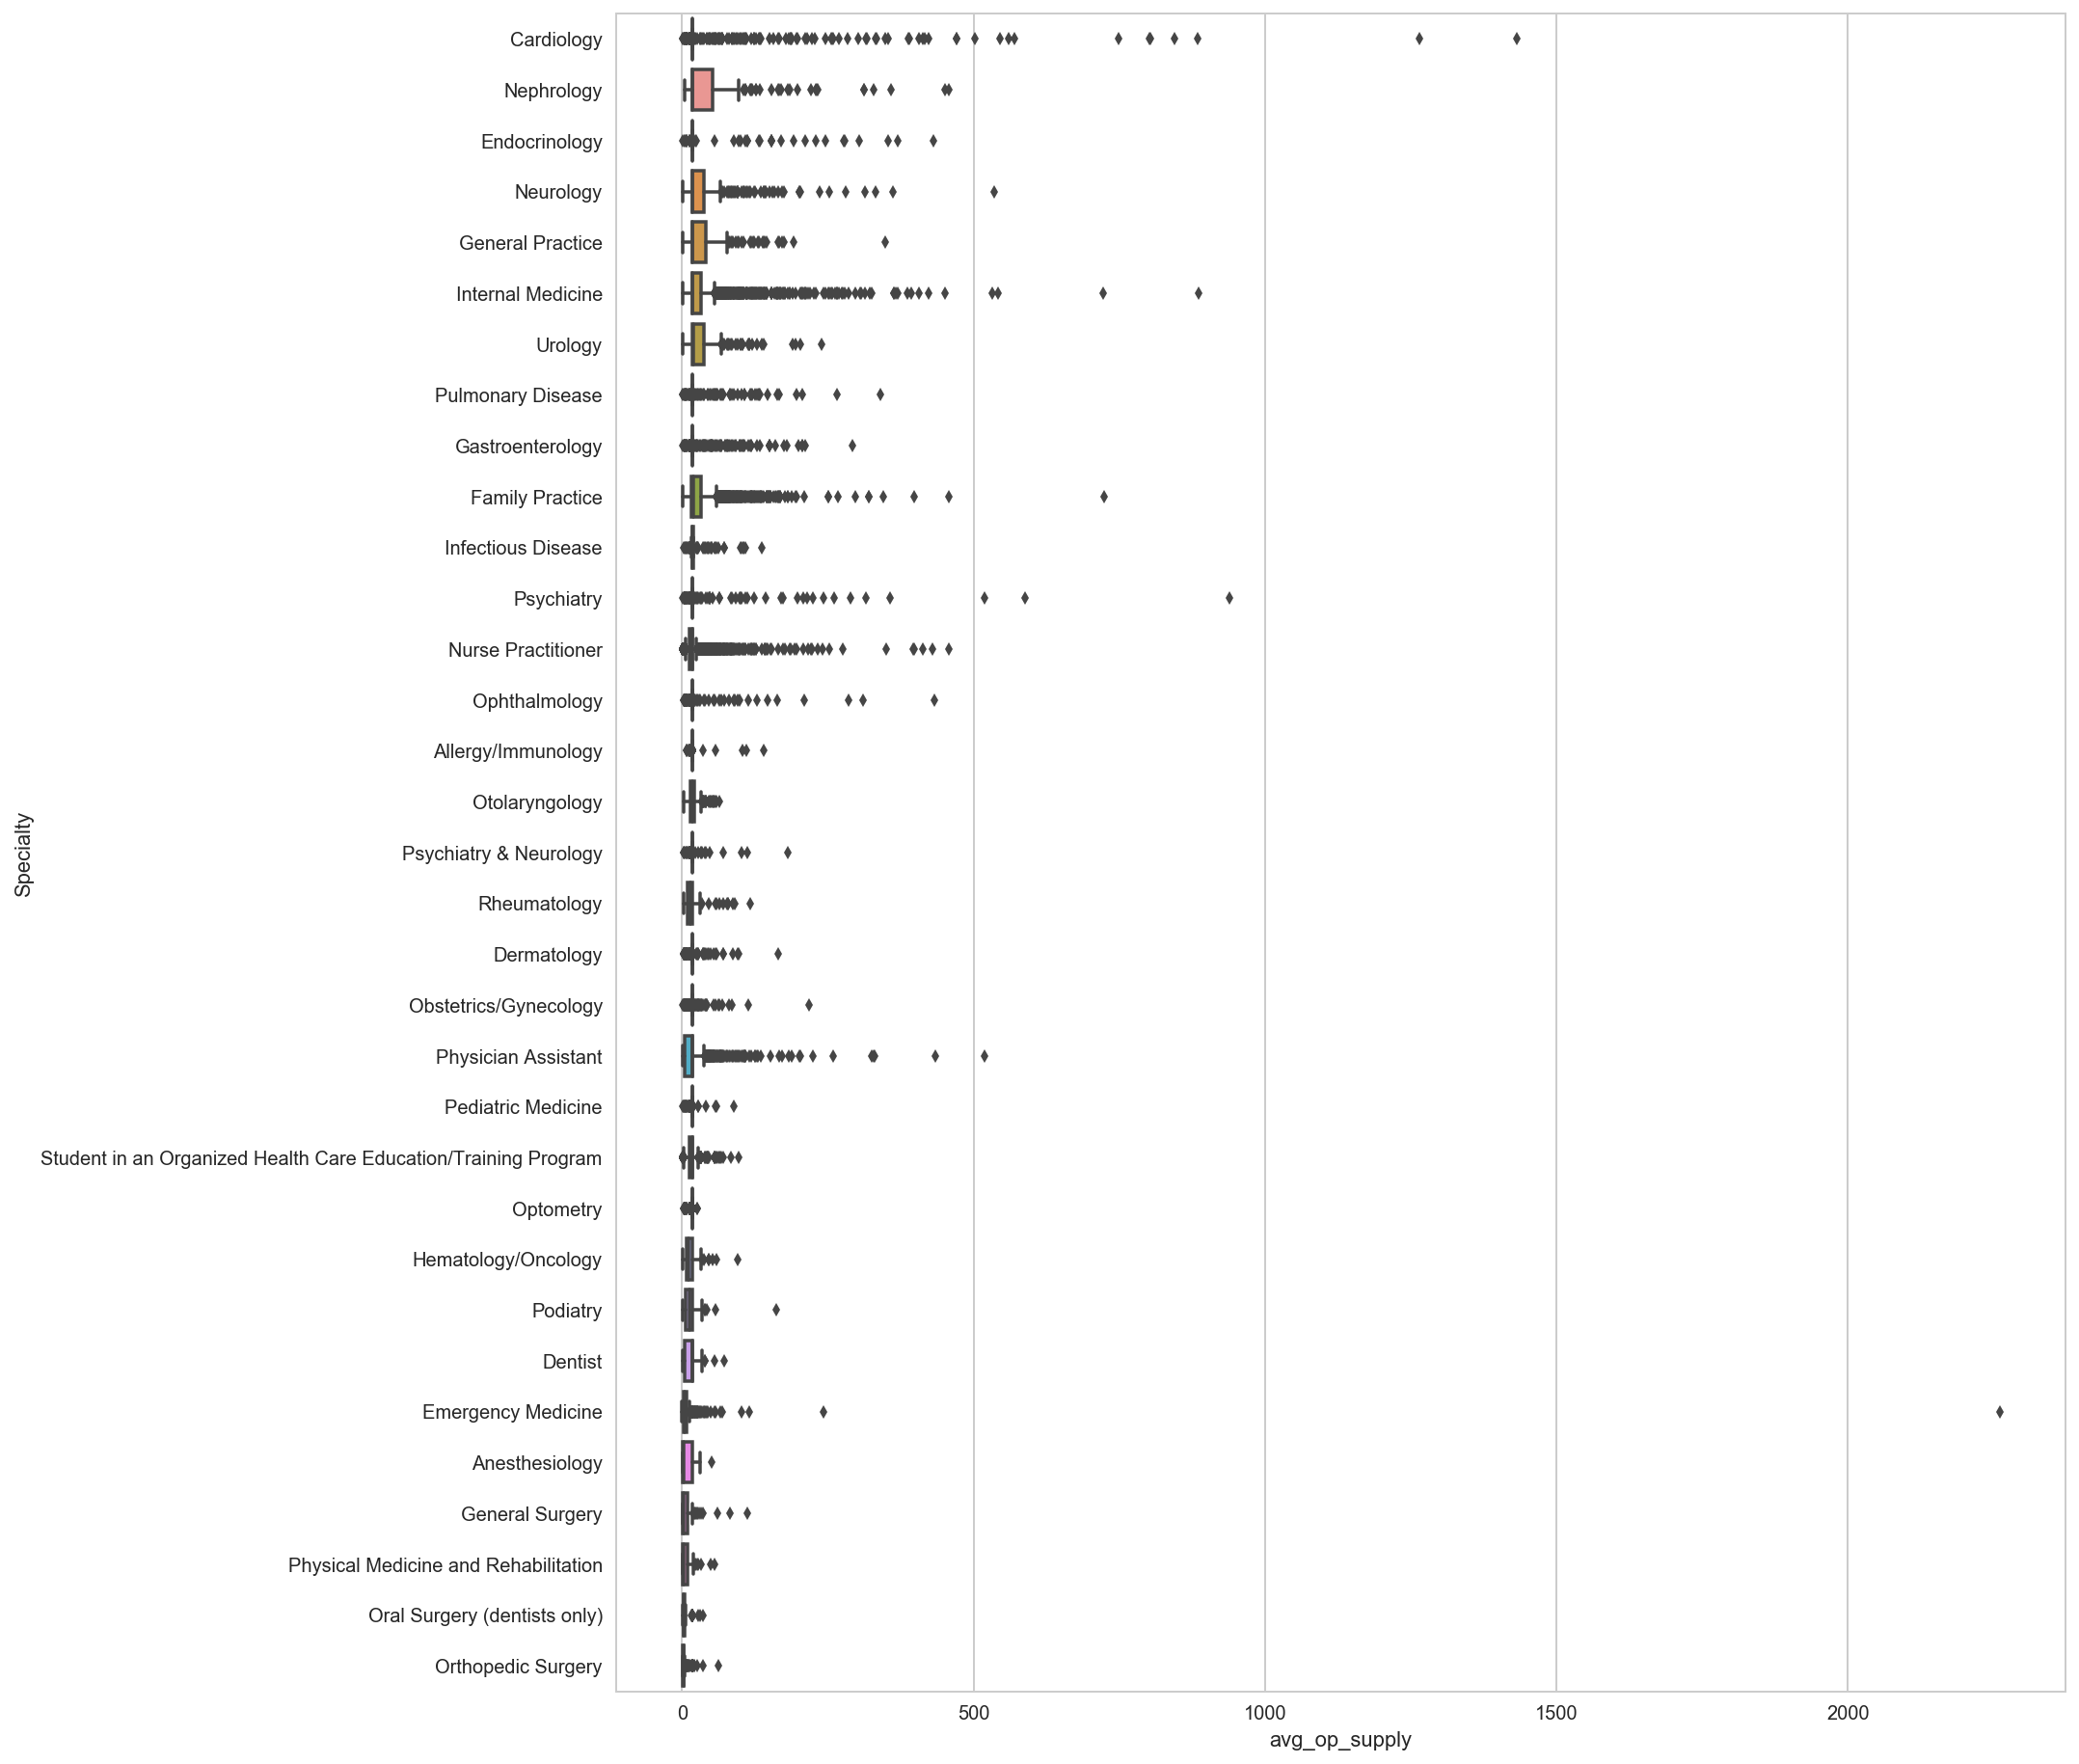

In [46]:
sns.set(style='whitegrid', rc={"figure.figsize": (12, 16)})
df_short = prescriber_df.loc[:, ['Specialty', 'avg_op_supply']]
df_short = df_short.loc[prescriber_df['Specialty'].isin(top40), :]
sns.boxplot(data=df_short, y='Specialty', x='avg_op_supply', order=top40)
plt.show()

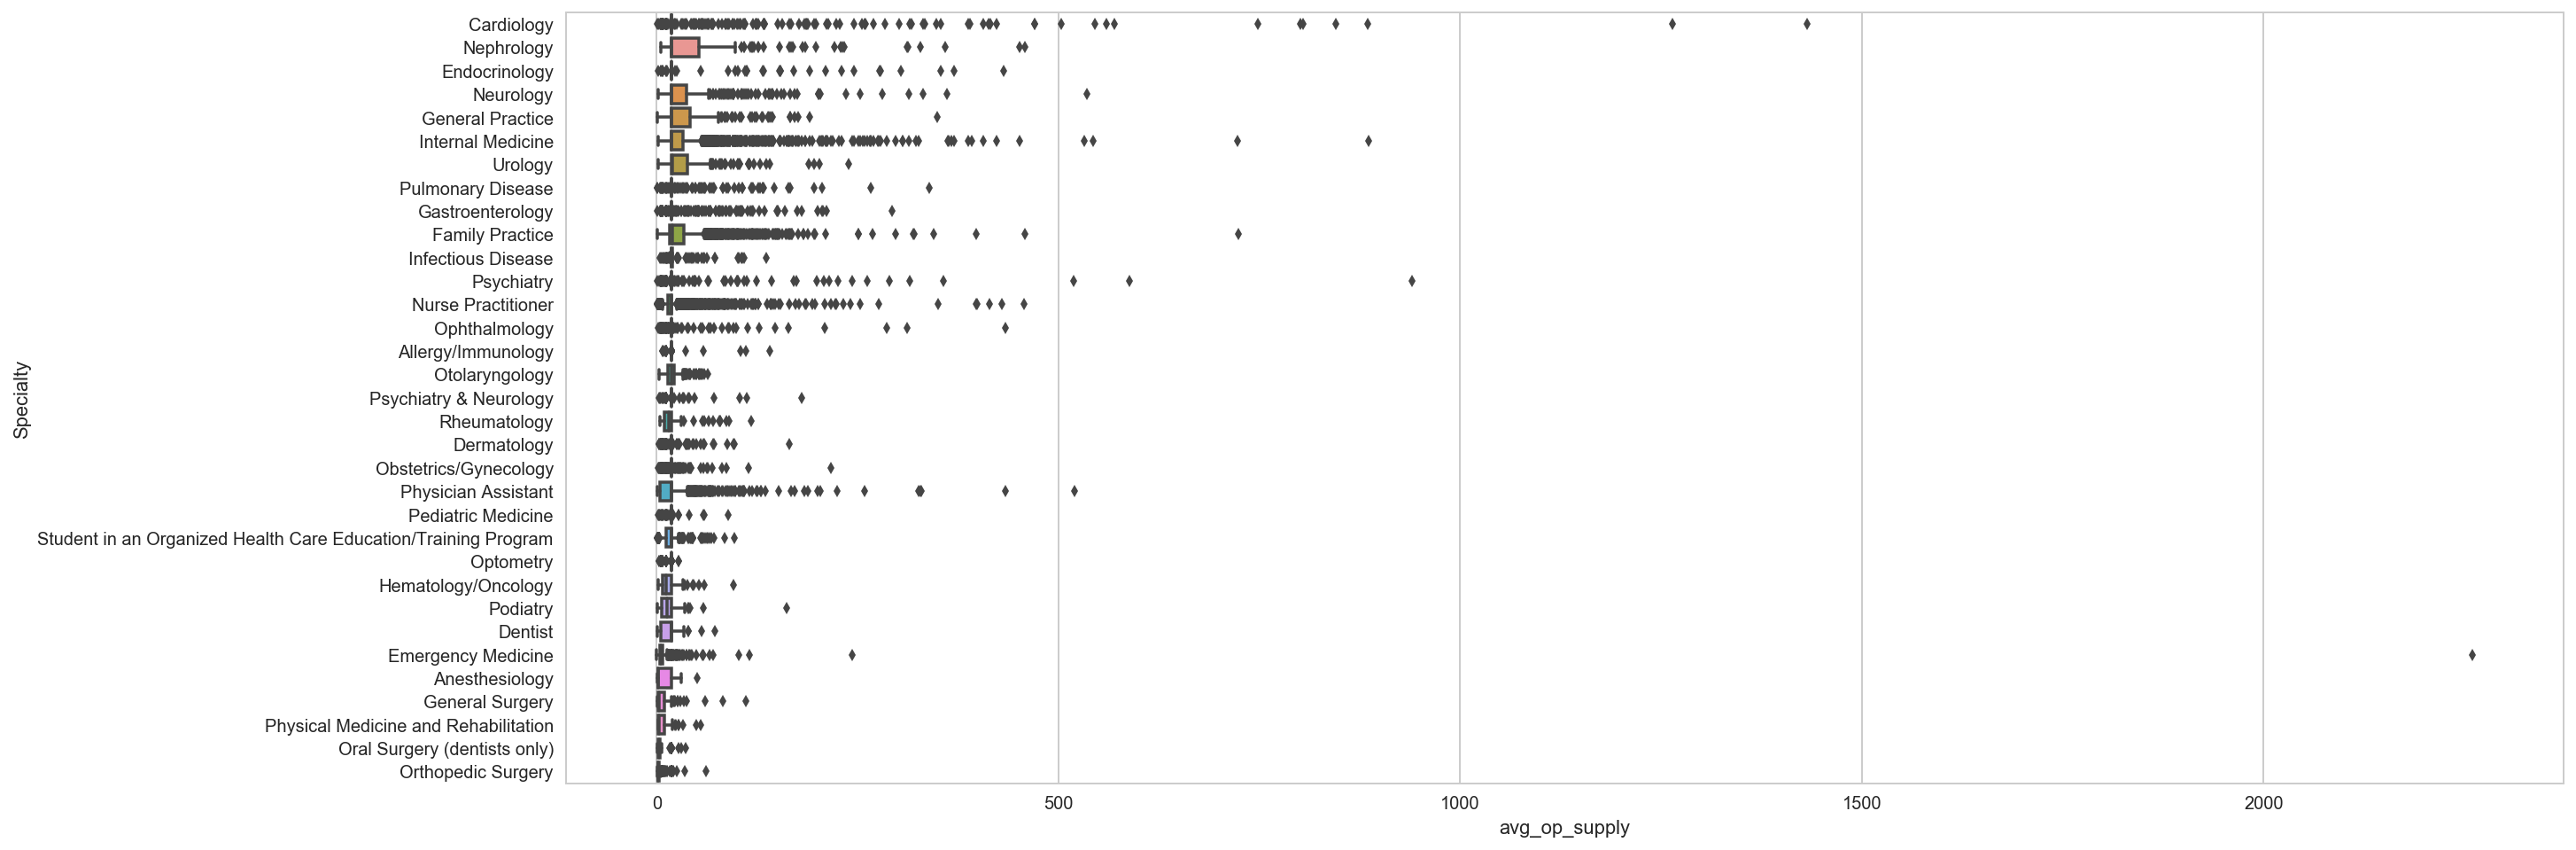

In [47]:
sns.set(style='whitegrid', rc={"figure.figsize": (18, 8)})
df_short = prescriber_df.loc[:, ['Specialty', 'avg_op_supply']]
df_short = df_short.loc[prescriber_df['Specialty'].isin(top80), :]
sns.boxplot(data=df_short, y='Specialty', x='avg_op_supply', order=top80)
plt.show()

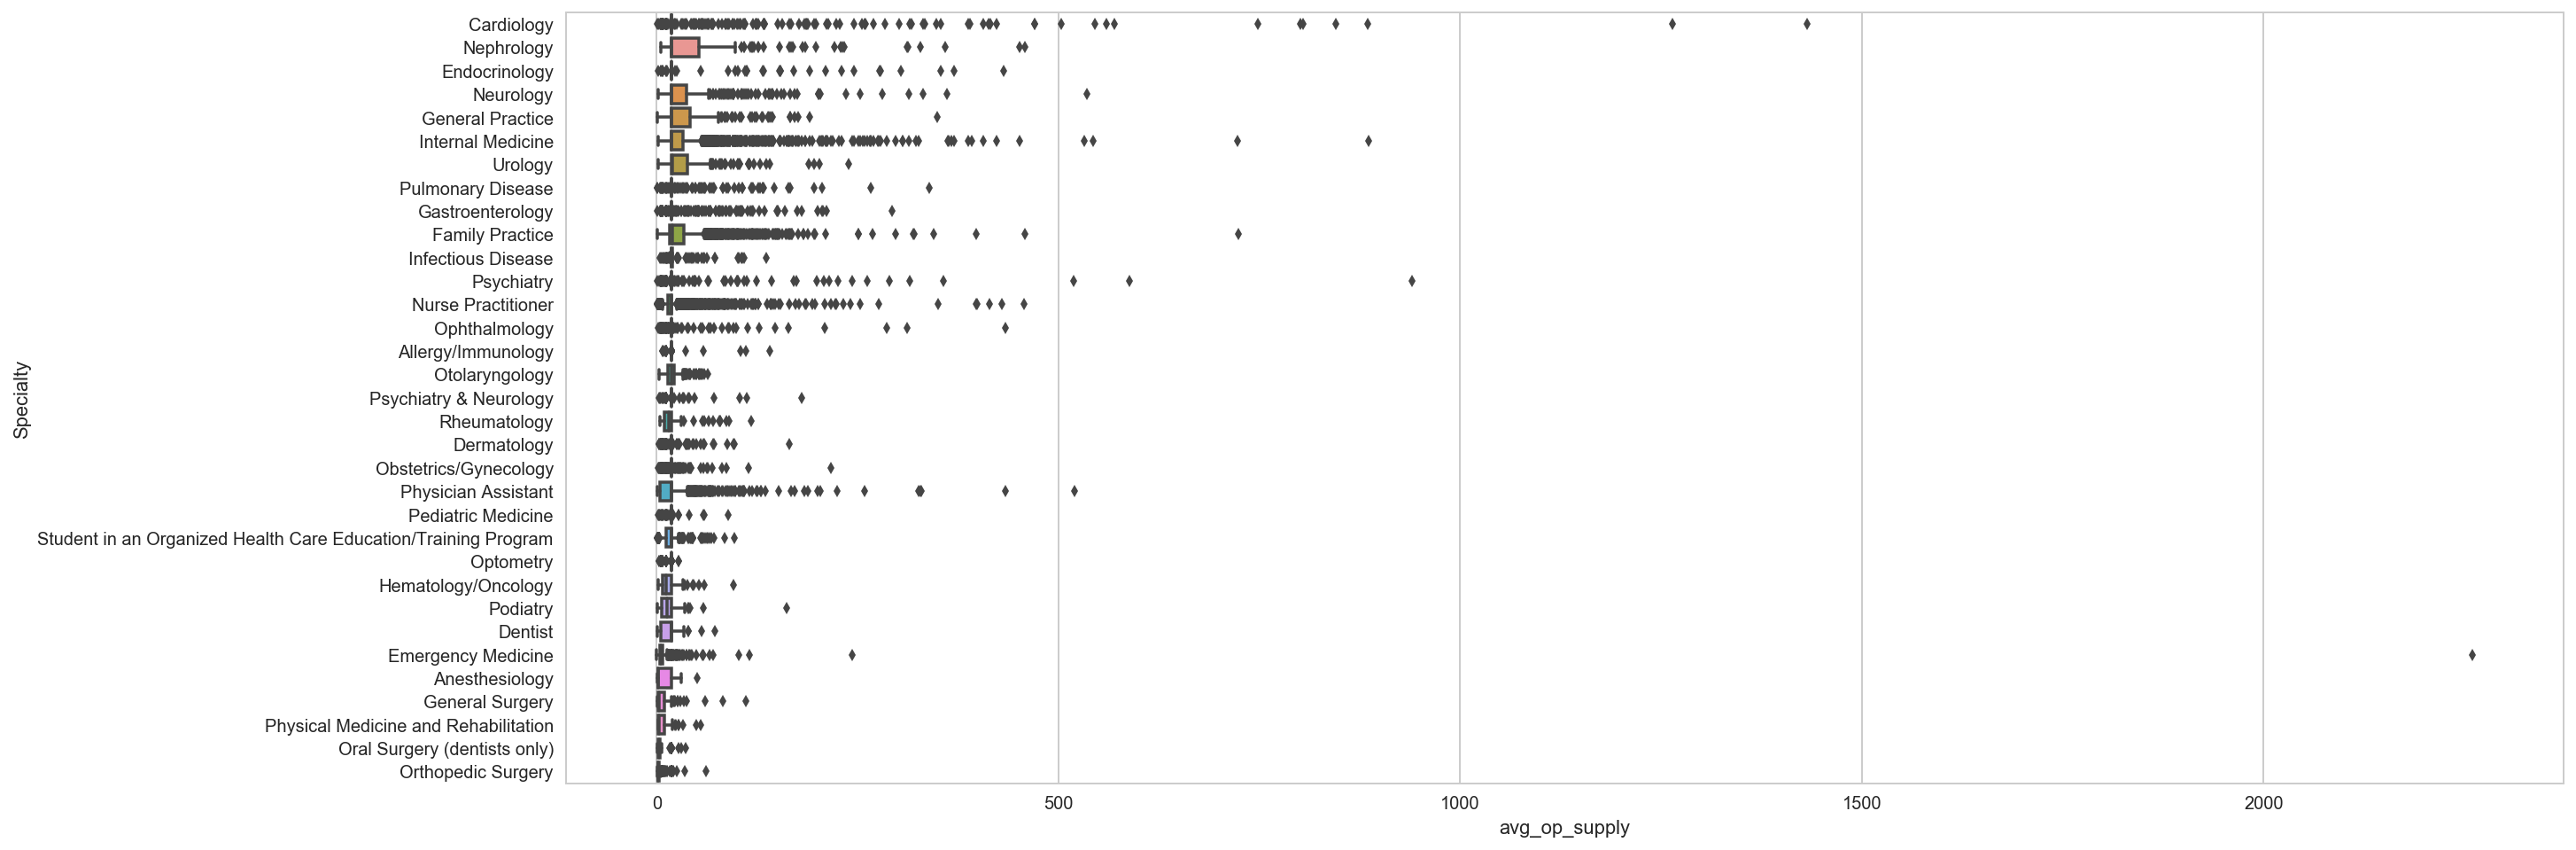

In [48]:
sns.set(style='whitegrid', rc={"figure.figsize": (18, 8)})
df_short = prescriber_df.loc[:, ['Specialty', 'avg_op_supply']]
df_short = df_short.loc[prescriber_df['Specialty'].isin(top119), :]
sns.boxplot(data=df_short, y='Specialty', x='avg_op_supply', order=top119)
plt.show()

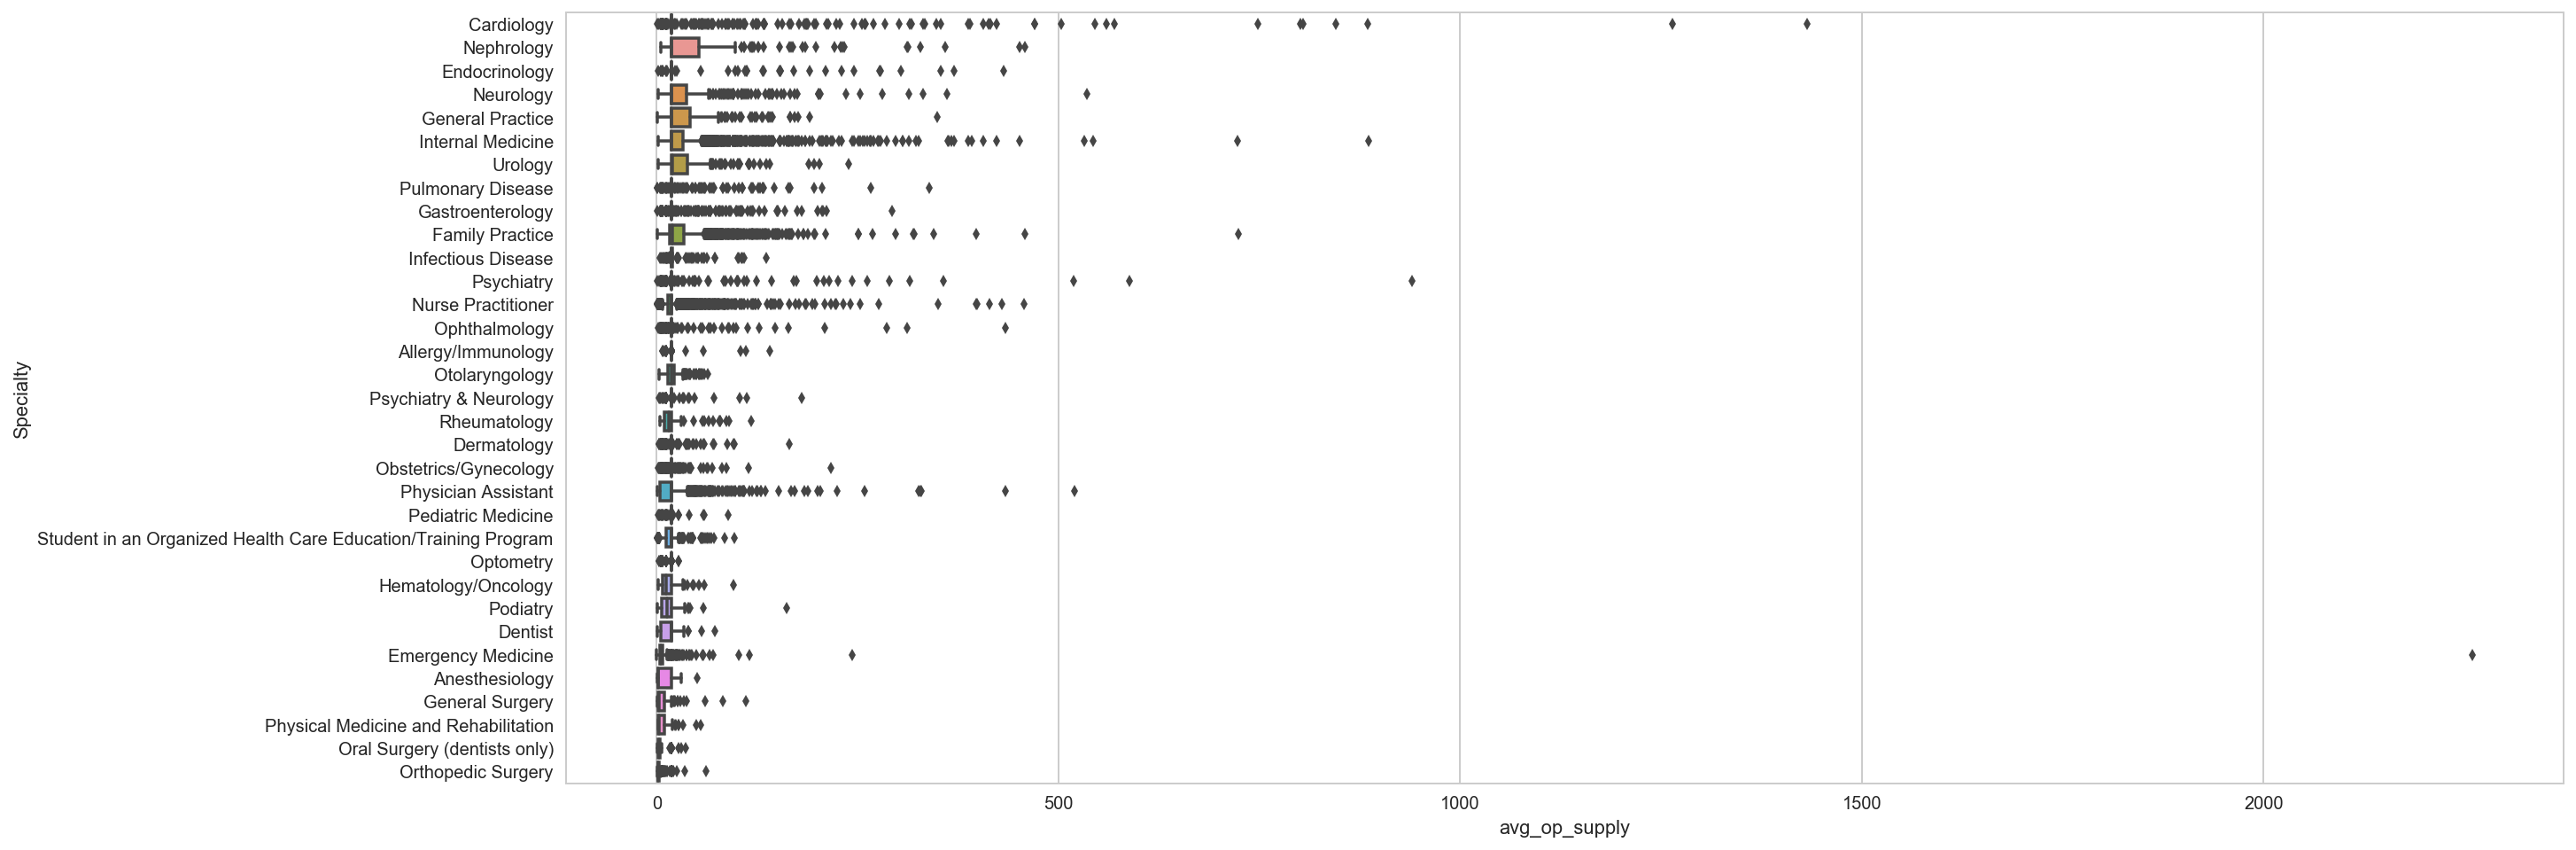

In [49]:
sns.set(style='whitegrid', rc={"figure.figsize": (18, 8)})
df_short = prescriber_df.loc[:, ['Specialty', 'avg_op_supply']]
df_short = df_short.loc[prescriber_df['Specialty'].isin(top200), :]
sns.boxplot(data=df_short, y='Specialty', x='avg_op_supply', order=top200)
plt.show()

In [50]:
# import plotly.plotly as py
# import plotly.graph_objs as go
    
# result = []
# for name, group in grouped_speciality:
#     if name in top40:
#         trace = go.Box(x=group, name=name)
#         result.append(trace)
    
# py.iplot(result)

In [51]:
# import plotly.plotly as py
# import plotly.graph_objs as go
    
# result = []
# for name, group in grouped_speciality:
#     if name in top80:
#         trace = go.Box(x=group, name=name)
#         result.append(trace)
    
# py.iplot(result)

In [52]:
# import plotly.plotly as py
# import plotly.graph_objs as go
    
# result = []
# for name, group in grouped_speciality:
#     if name in top119:
#         trace = go.Box(x=group, name=name)
#         result.append(trace)
    
# py.iplot(result)

In [53]:
# import plotly.plotly as py
# import plotly.graph_objs as go
    
# result = []
# for name, group in grouped_speciality:
#     if name in top200:
#         trace = go.Box(x=group, name=name)
#         result.append(trace)
    
# py.iplot(result)

In [54]:
df_short = prescriber_df.loc[:, ['Specialty', 'avg_op_supply']]
tmp= df_short.groupby(df_short['Specialty']).describe().unstack()
tmp.loc[top40, ]

Series([], dtype: float64)

In [55]:
cols_to_keep = ['Specialty','op_longer','avg_op_supply','Cardiology', 'Endocrinology', 'Psychiatry', 'Nephrology','Pulmonary Disease', 'Allergy/Immunology',
                 'Gastroenterology','Neurology', 'Psychiatry & Neurology', 'Ophthalmology','General Practice', 
                 'Infectious Disease', 'Internal Medicine','Urology', 'Family Practice', 'Dermatology',
                 'Nurse Practitioner','Obstetrics/Gynecology', 'Otolaryngology', 'Pediatric Medicine','Rheumatology',
                 'Physician Assistant','Student in an Organized Health Care Education/Training Program',
                 'Hematology/Oncology', 'Podiatry', 'Emergency Medicine','Physical Medicine and Rehabilitation',
                 'Dentist', 'General Surgery','Oral Surgery (dentists only)', 'Anesthesiology', 'Orthopedic Surgery']
                
data = prescriber_df.loc[:, cols_to_keep]
data= data.loc[:, (small != 0).any(axis=0)]
data.shape

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(24857, 35)

In [56]:
freq_specialty = list(prescriber_df.Specialty.value_counts(ascending=False).index[:25])
data = data.loc[data['Specialty'].isin(top20), :]
grouped = data.groupby('Specialty').corrwith(data['avg_op_supply'])
# grouped = grouped.dropna(how='all', axis=1)
grouped = grouped.drop('avg_op_supply', 1)

In [57]:
grouped.columns

Index(['Allergy/Immunology', 'Anesthesiology', 'Cardiology', 'Dentist',
       'Dermatology', 'Emergency Medicine', 'Endocrinology', 'Family Practice',
       'Gastroenterology', 'General Practice', 'General Surgery',
       'Hematology/Oncology', 'Infectious Disease', 'Internal Medicine',
       'Nephrology', 'Neurology', 'Nurse Practitioner',
       'Obstetrics/Gynecology', 'Ophthalmology',
       'Oral Surgery (dentists only)', 'Orthopedic Surgery', 'Otolaryngology',
       'Pediatric Medicine', 'Physical Medicine and Rehabilitation',
       'Physician Assistant', 'Podiatry', 'Psychiatry',
       'Psychiatry & Neurology', 'Pulmonary Disease', 'Rheumatology',
       'Student in an Organized Health Care Education/Training Program',
       'Urology', 'op_longer'],
      dtype='object')

[Text(0,0.5,'NPI'),
 Text(0,7.5,'AGGRENOX'),
 Text(0,14.5,'AMLODIPINE.BESYLATE.BENAZEPRIL'),
 Text(0,21.5,'AZITHROMYCIN'),
 Text(0,28.5,'BISOPROLOL.HYDROCHLOROTHIAZIDE'),
 Text(0,35.5,'CARBAMAZEPINE'),
 Text(0,42.5,'CEPHALEXIN'),
 Text(0,49.5,'CLOBETASOL.PROPIONATE'),
 Text(0,56.5,'CRESTOR'),
 Text(0,63.5,'DIGOXIN'),
 Text(0,70.5,'DIVALPROEX.SODIUM'),
 Text(0,77.5,'DULOXETINE.HCL'),
 Text(0,84.5,'FENOFIBRATE'),
 Text(0,91.5,'FUROSEMIDE'),
 Text(0,98.5,'GLYBURIDE'),
 Text(0,105.5,'HYDROMORPHONE.HCL'),
 Text(0,112.5,'ISOSORBIDE.MONONITRATE.ER'),
 Text(0,119.5,'KLOR.CON.M20'),
 Text(0,126.5,'LATANOPROST'),
 Text(0,133.5,'LISINOPRIL'),
 Text(0,140.5,'LOVAZA'),
 Text(0,147.5,'METHADONE.HCL'),
 Text(0,154.5,'METOPROLOL.TARTRATE'),
 Text(0,161.5,'NABUMETONE'),
 Text(0,168.5,'NIFEDICAL.XL'),
 Text(0,175.5,'NYSTATIN'),
 Text(0,182.5,'OXYBUTYNIN.CHLORIDE'),
 Text(0,189.5,'PHENOBARBITAL'),
 Text(0,196.5,'PRAVASTATIN.SODIUM'),
 Text(0,203.5,'PROPRANOLOL.HCL.ER'),
 Text(0,210.5,'RESTASIS'),
 Text(0

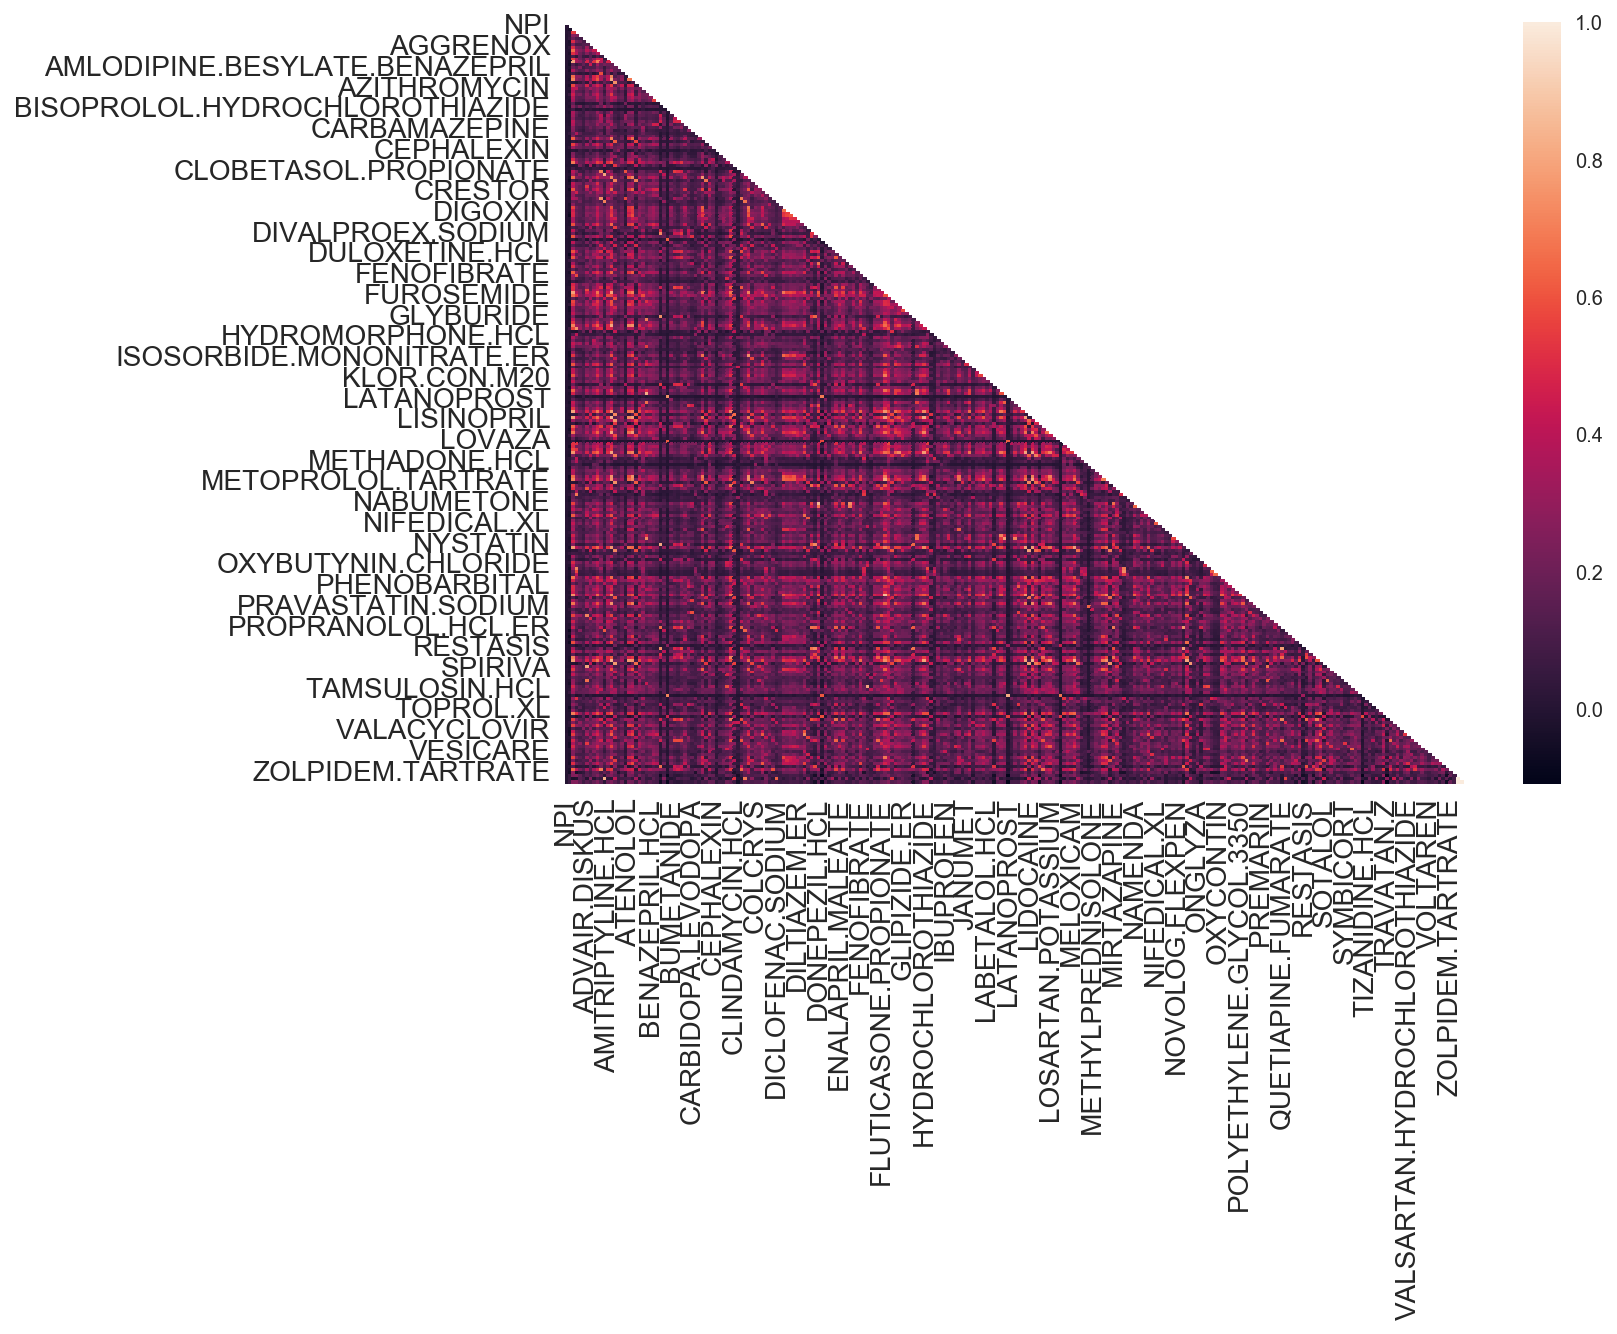

In [59]:
# to see which ones of the questions have association, using the correlation
# heat map(cerdit: Justin Pounders)
corr = prescriber_df.corr()

fig, ax = plt.subplots(figsize=(9,7))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

## deaths by states related to overdose as reported by wonder CDC

In [60]:
list(prescriber_df)

['NPI',
 'Gender',
 'State',
 'Credentials',
 'Specialty',
 'NPPES Provider Last Name',
 'NPPES Provider First Name',
 'NPPES Provider ZIP Code',
 'NPPES Provider State',
 'Totalclaimcount',
 'OpioidClaimCount',
 'ACETAMINOPHEN.CODEINE',
 'ACYCLOVIR',
 'ADVAIR.DISKUS',
 'AGGRENOX',
 'ALENDRONATE.SODIUM',
 'ALLOPURINOL',
 'ALPRAZOLAM',
 'AMIODARONE.HCL',
 'AMITRIPTYLINE.HCL',
 'AMLODIPINE.BESYLATE',
 'AMLODIPINE.BESYLATE.BENAZEPRIL',
 'AMOXICILLIN',
 'AMOX.TR.POTASSIUM.CLAVULANATE',
 'AMPHETAMINE.SALT.COMBO',
 'ATENOLOL',
 'ATORVASTATIN.CALCIUM',
 'AVODART',
 'AZITHROMYCIN',
 'BACLOFEN',
 'BD.ULTRA.FINE.PEN.NEEDLE',
 'BENAZEPRIL.HCL',
 'BENICAR',
 'BENICAR.HCT',
 'BENZTROPINE.MESYLATE',
 'BISOPROLOL.HYDROCHLOROTHIAZIDE',
 'BRIMONIDINE.TARTRATE',
 'BUMETANIDE',
 'BUPROPION.HCL.SR',
 'BUPROPION.XL',
 'BUSPIRONE.HCL',
 'BYSTOLIC',
 'CARBAMAZEPINE',
 'CARBIDOPA.LEVODOPA',
 'CARISOPRODOL',
 'CARTIA.XT',
 'CARVEDILOL',
 'CEFUROXIME',
 'CELEBREX',
 'CEPHALEXIN',
 'CHLORHEXIDINE.GLUCONATE',
 'C

In [61]:
num_pres = prescriber_df.groupby('State').size()
num_longer = prescriber_df['op_longer'].groupby(prescriber_df['State']).sum()
ratio_pres_longer = (num_longer / num_pres).sort_values(ascending=False)
tmp = pd.concat([num_pres, num_longer, ratio_pres_longer], axis = 1)
tmp.columns = ['num_prescriber', 'num_longer', 'ratio_of_longer']
tmp['state'] = tmp.index
tmp = tmp.sort_values(by='ratio_of_longer', ascending=False)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



In [62]:
tmp.head()[:2]

num_prescriber  num_longer  ratio_of_longer state
AE               2         2.0             1.00    AE
VI               4         3.0             0.75    VI

In [63]:
death_overdose = pd.read_csv("./inputs/overdosesd.csv", thousands = ",")
death_overdose = death_overdose.set_index('Abbrev')
death_overdose.Deaths = pd.to_numeric(death_overdose.Deaths)
death_overdose.Population = pd.to_numeric(death_overdose.Population)
death_overdose['death_per_cap'] = 100000 * death_overdose['Deaths'] / death_overdose['Population']

In [64]:
death_overdose = pd.concat([death_overdose, tmp], axis = 1)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


In [65]:
death_overdose = death_overdose.sort_values(by='ratio_of_longer', ascending=False)
death_overdose.fillna(0,inplace =True)

In [66]:
death_overdose

State  Population  Deaths  death_per_cap  num_prescriber  \
AE               0         0.0     0.0       0.000000               2   
VI               0         0.0     0.0       0.000000               4   
AR        Arkansas   2959373.0   356.0      12.029575             209   
OK        Oklahoma   3850568.0   777.0      20.178841             282   
MT         Montana   1015165.0   125.0      12.313269              73   
AL         Alabama   4833722.0   723.0      14.957418             339   
AK          Alaska    735132.0   124.0      16.867719              39   
NV          Nevada   2790136.0   545.0      19.533098             153   
ID           Idaho   1612136.0   212.0      13.150255             128   
OR          Oregon   3930065.0   522.0      13.282223             325   
MS     Mississippi   2991207.0   336.0      11.232924             191   
UT            Utah   2900872.0   603.0      20.786853             168   
TN       Tennessee   6495978.0  1269.0      19.535165             530   
AZ         Arizona   6626624.0  1211.0      18.274766             506   
CO        Colorado   5268367.0   899.0      17.064111             395   
SC  South Carolina   4774839.0   701.0      14.681123             406   
VT         Vermont    626630.0    83.0      13.245456              61   
GA         Georgia   9992167.0  1206.0      12.069454             618   
WA      Washington   6971406.0   979.0      14.043078             564   
NC  North Carolina   9848060.0  1358.0      13.789518             785   
TX           Texas  26448193.0  2601.0       9.834320            1471   
WV   West Virginia   1854304.0   627.0      33.813226             204   
LA       Louisiana   4625470.0   777.0      16.798293             346   
MI        Michigan   9895622.0  1762.0      17.805854             865   
RI    Rhode Island   1051511.0   247.0      23.490006             118   
PR               0         0.0     0.0       0.000000             235   
ND    North Dakota    723393.0    43.0       5.944210              64   
KS          Kansas   2893957.0   332.0      11.472182             210   
HI          Hawaii   1404054.0   157.0      11.181906              82   
ME           Maine   1328302.0   216.0      16.261362             160   
NH   New Hampshire   1323459.0   334.0      25.236898             116   
WY         Wyoming    582658.0   109.0      18.707372              40   
NE        Nebraska   1868516.0   125.0       6.689801             131   
MD        Maryland   5928814.0  1070.0      18.047454             501   
IN         Indiana   6570902.0  1172.0      17.836212             550   
NM      New Mexico   2085287.0   547.0      26.231401             165   
VA        Virginia   8260405.0   980.0      11.863825             569   
MO        Missouri   6044171.0  1067.0      17.653372             480   
DE        Delaware    925749.0   189.0      20.415901              87   
MN       Minnesota   5420380.0   517.0       9.538077             447   
WI       Wisconsin   5742713.0   853.0      14.853607             503   
CA      California  38332521.0  4521.0      11.794163            2531   
OH            Ohio  11570808.0  2744.0      23.714852             984   
PA    Pennsylvania  12773801.0  2732.0      21.387526            1215   
FL         Florida  19552860.0  2634.0      13.471175            1563   
ZZ               0         0.0     0.0       0.000000               2   
GU               0         0.0     0.0       0.000000               2   
IL        Illinois  12882135.0  1705.0      13.235384             989   
CT     Connecticut   3596080.0   623.0      17.324420             363   
KY        Kentucky   4395295.0  1077.0      24.503475             364   
IA            Iowa   3090416.0   264.0       8.542539             234   
NJ      New Jersey   8899339.0  1253.0      14.079697             666   
MA   Massachusetts   6692824.0  1289.0      19.259434             708   
SD    South Dakota    844877.0    63.0       7.456707              90  

In [67]:
death_overdose['ratio_of_longer'].mean()

0.5579624426062229

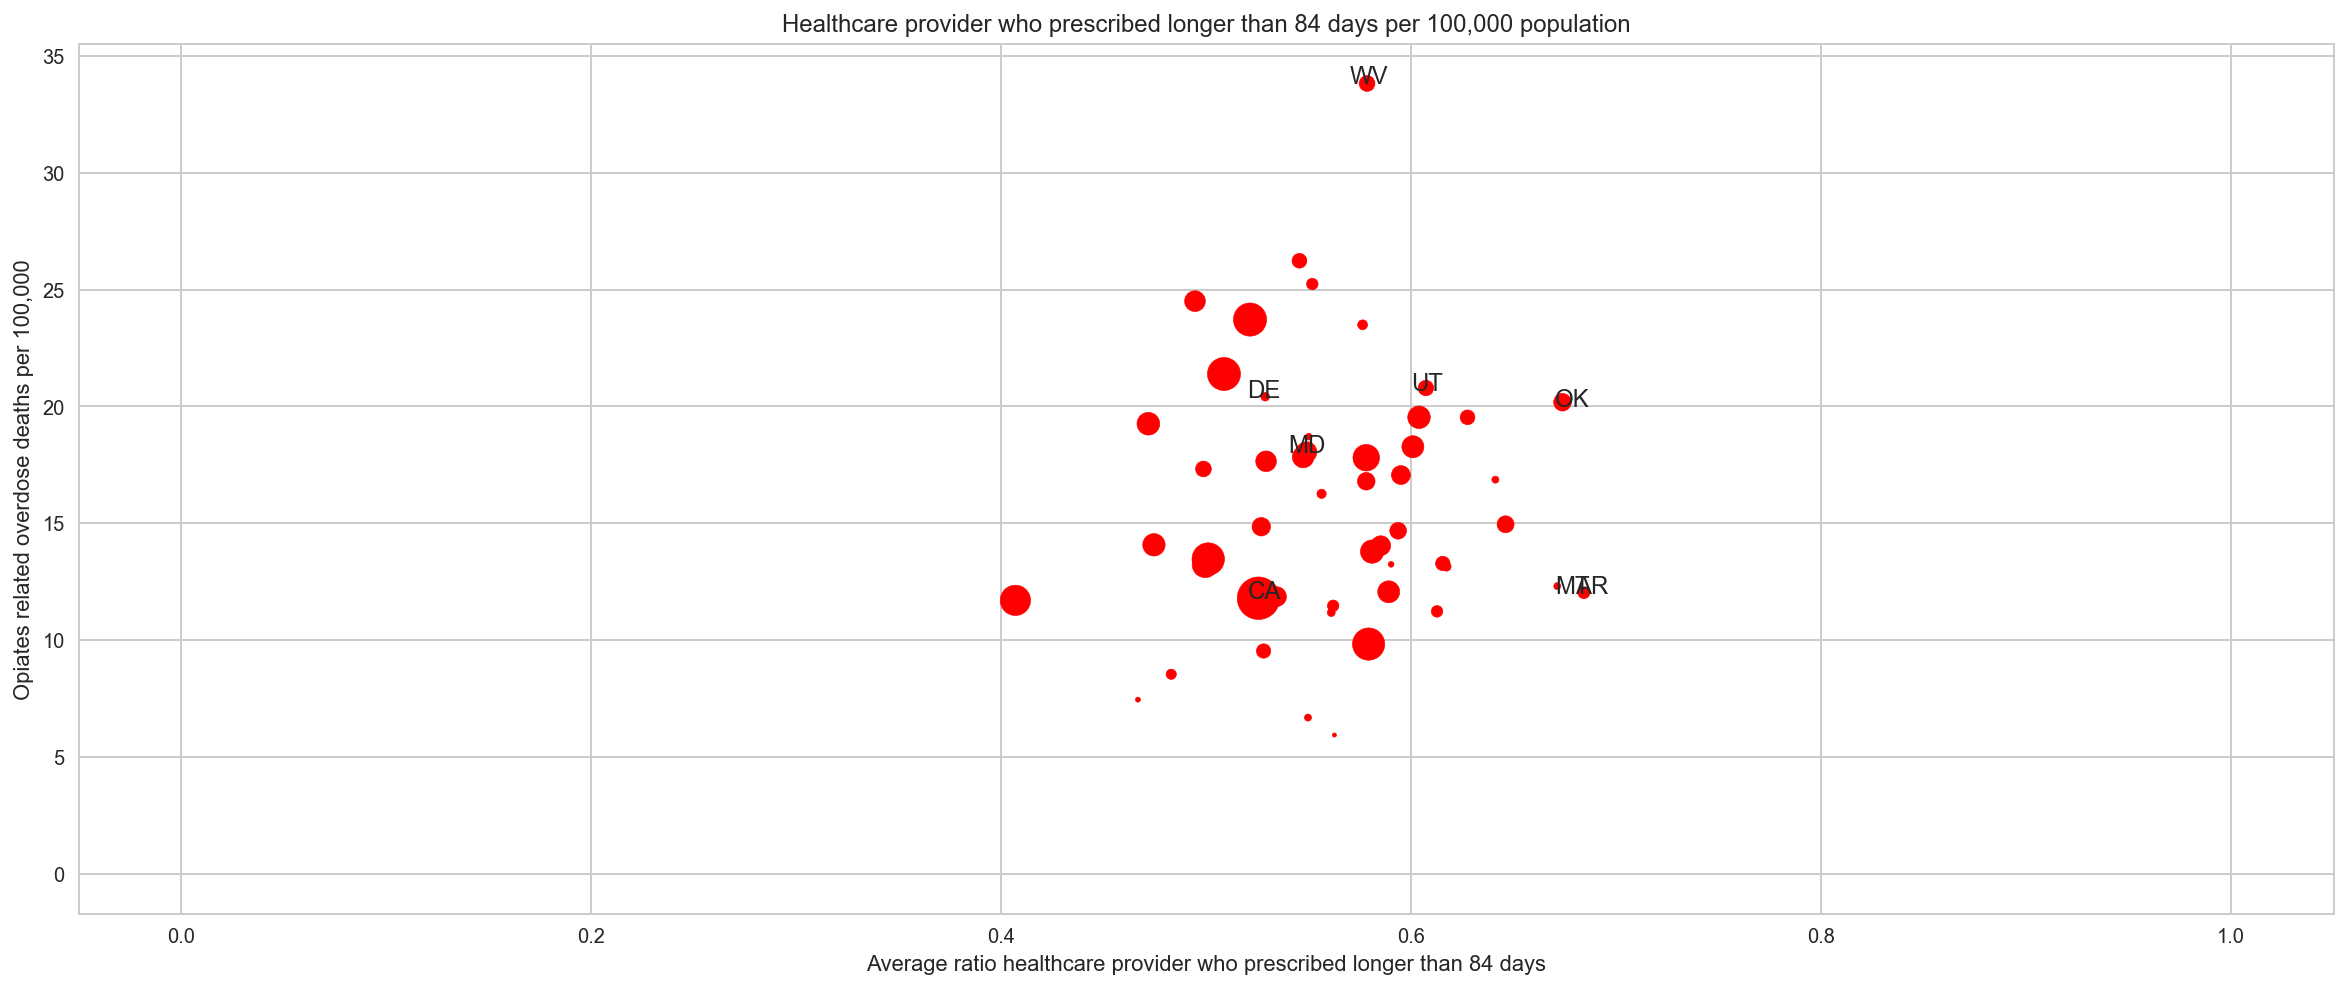

In [129]:
# scatter plot showing the death percapita by state using the standard prescripition method for those
# prescribed above the  12 weeks medications and the mean overdose death for the nation based on my dataset
# was 0.55 and i am using scatter map to see for those states above the mean below:
plt.figure(figsize=(18, 8))
s = .1 * death_overdose['Deaths'] 
plt.scatter(y=death_overdose['death_per_cap'], x=death_overdose['ratio_of_longer'], 
           s = s , 
            c = 'r')

plt.text(0.52, 20.4,'DE')
plt.text(0.52, 11.79,'CA')
plt.text(0.57, 33.8,'WV')
plt.text(0.54, 18.04,'MD')
plt.text(.68, 12.0, 'AR')
plt.text(0.67, 20.0, 'OK')
plt.text(0.60, 20.7, 'UT')
plt.text(0.67, 12.0, 'MT')
plt.xlabel('Average ratio healthcare provider who prescribed longer than 84 days')
plt.title('Healthcare provider who prescribed longer than 84 days per 100,000 population')
plt.ylabel('Opiates related overdose deaths per 100,000')
# plt.savefig('./inputs/overdose_vs_ratio.png')
plt.show()

In [69]:
# using the pandas pd.concate to add the death_overdose with the prescriber/speciality and visualize
# in which states is significant for  what speciaity. 
death_overdose = pd.concat([death_overdose, prescriber_df], axis = 1)  

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


# Health professionals specialty  and the opiods they prescribe

In [70]:
death_overdose.tail()[:2]

State  Population  Deaths  death_per_cap  num_prescriber  num_longer  \
AE     0         0.0     0.0            0.0             2.0         2.0   
VI     0         0.0     0.0            0.0             4.0         3.0   

    ratio_of_longer state  NPI Gender      ...       VYTORIN WARFARIN.SODIUM  \
AE             1.00    AE  NaN    NaN      ...           NaN             NaN   
VI             0.75    VI  NaN    NaN      ...           NaN             NaN   

   XARELTO ZETIA ZIPRASIDONE.HCL  ZOLPIDEM.TARTRATE avg_op_supply  op_longer  \
AE     NaN   NaN             NaN                NaN           NaN        NaN   
VI     NaN   NaN             NaN                NaN           NaN        NaN   

    Opioid_Prescriber  op_prescriber  
AE                NaN            NaN  
VI                NaN            NaN  

[2 rows x 272 columns]

In [150]:
death_overdose.fillna(0)[:2]

State  Population  Deaths  death_per_cap  num_prescriber  num_longer  \
AE     0         0.0     0.0            0.0             2.0         2.0   
VI     0         0.0     0.0            0.0             4.0         3.0   

    ratio_of_longer state  NPI Gender      ...       VYTORIN WARFARIN.SODIUM  \
AE             1.00    AE  0.0      0      ...           0.0             0.0   
VI             0.75    VI  0.0      0      ...           0.0             0.0   

   XARELTO ZETIA ZIPRASIDONE.HCL  ZOLPIDEM.TARTRATE avg_op_supply  op_longer  \
AE     0.0   0.0             0.0                0.0           0.0        0.0   
VI     0.0   0.0             0.0                0.0           0.0        0.0   

    Opioid_Prescriber  op_prescriber  
AE                0.0            0.0  
VI                0.0            0.0  

[2 rows x 272 columns]

In [72]:
death_overdose.columns

Index(['State', 'Population', 'Deaths', 'death_per_cap', 'num_prescriber',
       'num_longer', 'ratio_of_longer', 'state', 'NPI', 'Gender',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=272)

In [73]:
death_overdose.shape

(24914, 272)

In [74]:
list(death_overdose)

['State',
 'Population',
 'Deaths',
 'death_per_cap',
 'num_prescriber',
 'num_longer',
 'ratio_of_longer',
 'state',
 'NPI',
 'Gender',
 'State',
 'Credentials',
 'Specialty',
 'NPPES Provider Last Name',
 'NPPES Provider First Name',
 'NPPES Provider ZIP Code',
 'NPPES Provider State',
 'Totalclaimcount',
 'OpioidClaimCount',
 'ACETAMINOPHEN.CODEINE',
 'ACYCLOVIR',
 'ADVAIR.DISKUS',
 'AGGRENOX',
 'ALENDRONATE.SODIUM',
 'ALLOPURINOL',
 'ALPRAZOLAM',
 'AMIODARONE.HCL',
 'AMITRIPTYLINE.HCL',
 'AMLODIPINE.BESYLATE',
 'AMLODIPINE.BESYLATE.BENAZEPRIL',
 'AMOXICILLIN',
 'AMOX.TR.POTASSIUM.CLAVULANATE',
 'AMPHETAMINE.SALT.COMBO',
 'ATENOLOL',
 'ATORVASTATIN.CALCIUM',
 'AVODART',
 'AZITHROMYCIN',
 'BACLOFEN',
 'BD.ULTRA.FINE.PEN.NEEDLE',
 'BENAZEPRIL.HCL',
 'BENICAR',
 'BENICAR.HCT',
 'BENZTROPINE.MESYLATE',
 'BISOPROLOL.HYDROCHLOROTHIAZIDE',
 'BRIMONIDINE.TARTRATE',
 'BUMETANIDE',
 'BUPROPION.HCL.SR',
 'BUPROPION.XL',
 'BUSPIRONE.HCL',
 'BYSTOLIC',
 'CARBAMAZEPINE',
 'CARBIDOPA.LEVODOPA',
 '

In [75]:
# death_overdose.to_csv('overdosescleaned1018.csv')

In [82]:
prescriber_df.head()[:2]  # showing the first two rows

NPI Gender State  Credentials          Specialty  \
0  1003002320      M    MS  D.M.D. P.A.            Dentist   
1  1003004771      F    CO         M.D.  Pulmonary Disease   

  NPPES Provider Last Name NPPES Provider First Name  NPPES Provider ZIP Code  \
0                   EKLUND                        D.                  39208.0   
1                   RIGGLE                      ERIN                  80120.0   

  NPPES Provider State  Totalclaimcount      ...        VYTORIN  \
0                   MS              129      ...              0   
1                   CO              537      ...              0   

   WARFARIN.SODIUM  XARELTO  ZETIA  ZIPRASIDONE.HCL  ZOLPIDEM.TARTRATE  \
0                0        0      0                0                  0   
1                0       16      0                0                  0   

   avg_op_supply  op_longer  Opioid_Prescriber  op_prescriber  
0            4.5        1.0                  1            1.0  
1            4.5        0.0                  0            0.0  

[2 rows x 264 columns]

In [84]:
list(prescriber_df)   # listing all the prescribers

['NPI',
 'Gender',
 'State',
 'Credentials',
 'Specialty',
 'NPPES Provider Last Name',
 'NPPES Provider First Name',
 'NPPES Provider ZIP Code',
 'NPPES Provider State',
 'Totalclaimcount',
 'OpioidClaimCount',
 'ACETAMINOPHEN.CODEINE',
 'ACYCLOVIR',
 'ADVAIR.DISKUS',
 'AGGRENOX',
 'ALENDRONATE.SODIUM',
 'ALLOPURINOL',
 'ALPRAZOLAM',
 'AMIODARONE.HCL',
 'AMITRIPTYLINE.HCL',
 'AMLODIPINE.BESYLATE',
 'AMLODIPINE.BESYLATE.BENAZEPRIL',
 'AMOXICILLIN',
 'AMOX.TR.POTASSIUM.CLAVULANATE',
 'AMPHETAMINE.SALT.COMBO',
 'ATENOLOL',
 'ATORVASTATIN.CALCIUM',
 'AVODART',
 'AZITHROMYCIN',
 'BACLOFEN',
 'BD.ULTRA.FINE.PEN.NEEDLE',
 'BENAZEPRIL.HCL',
 'BENICAR',
 'BENICAR.HCT',
 'BENZTROPINE.MESYLATE',
 'BISOPROLOL.HYDROCHLOROTHIAZIDE',
 'BRIMONIDINE.TARTRATE',
 'BUMETANIDE',
 'BUPROPION.HCL.SR',
 'BUPROPION.XL',
 'BUSPIRONE.HCL',
 'BYSTOLIC',
 'CARBAMAZEPINE',
 'CARBIDOPA.LEVODOPA',
 'CARISOPRODOL',
 'CARTIA.XT',
 'CARVEDILOL',
 'CEFUROXIME',
 'CELEBREX',
 'CEPHALEXIN',
 'CHLORHEXIDINE.GLUCONATE',
 'C

In [85]:
# The total number of  Speciality aggregated by the opiod prescriber,claim and count
group_prescribers = prescriber_df.groupby(['Specialty']).agg({'op_prescriber': 'sum',
                                                              'Totalclaimcount': 'sum',
                                                              'OpioidClaimCount': 'sum'})
group_prescribers

op_prescriber  \
Specialty                                                           
Allergy/Immunology                                            8.0   
Anesthesiology                                               86.0   
Cardiology                                                  161.0   
Dentist                                                    1009.0   
Dermatology                                                  61.0   
Emergency Medicine                                         1006.0   
Endocrinology                                                32.0   
Family Practice                                            2581.0   
Gastroenterology                                            115.0   
General Practice                                            177.0   
General Surgery                                             417.0   
Hematology/Oncology                                         200.0   
Infectious Disease                                           48.0   
Internal Medicine                                          2378.0   
Nephrology                                                  133.0   
Neurology                                                   191.0   
Nurse Practitioner                                         1306.0   
Obstetrics/Gynecology                                       136.0   
Ophthalmology                                                65.0   
Optometry                                                     3.0   
Oral Surgery (dentists only)                                122.0   
Orthopedic Surgery                                          553.0   
Otolaryngology                                              161.0   
Pediatric Medicine                                           26.0   
Physical Medicine and Rehabilitation                        173.0   
Physician Assistant                                        1213.0   
Podiatry                                                    219.0   
Psychiatry                                                   77.0   
Psychiatry & Neurology                                       12.0   
Pulmonary Disease                                            76.0   
Rheumatology                                                118.0   
Student in an Organized Health Care Education/T...          220.0   
Urology                                                     252.0   

                                                    Totalclaimcount  \
Specialty                                                             
Allergy/Immunology                                           102736   
Anesthesiology                                               174672   
Cardiology                                                  2322655   
Dentist                                                      230336   
Dermatology                                                  234785   
Emergency Medicine                                           564940   
Endocrinology                                                476522   
Family Practice                                            12585462   
Gastroenterology                                             468059   
General Practice                                             922152   
General Surgery                                              113270   
Hematology/Oncology                                          199628   
Infectious Disease                                           120175   
Internal Medicine                                          13097331   
Nephrology                                                   523814   
Neurology                                                    656773   
Nurse Practitioner                                          3277870   
Obstetrics/Gynecology                                        159198   
Ophthalmology                                                768060   
Optometry                                                    182557   
Oral Surgery (dentists only)                                  36144   
Ort

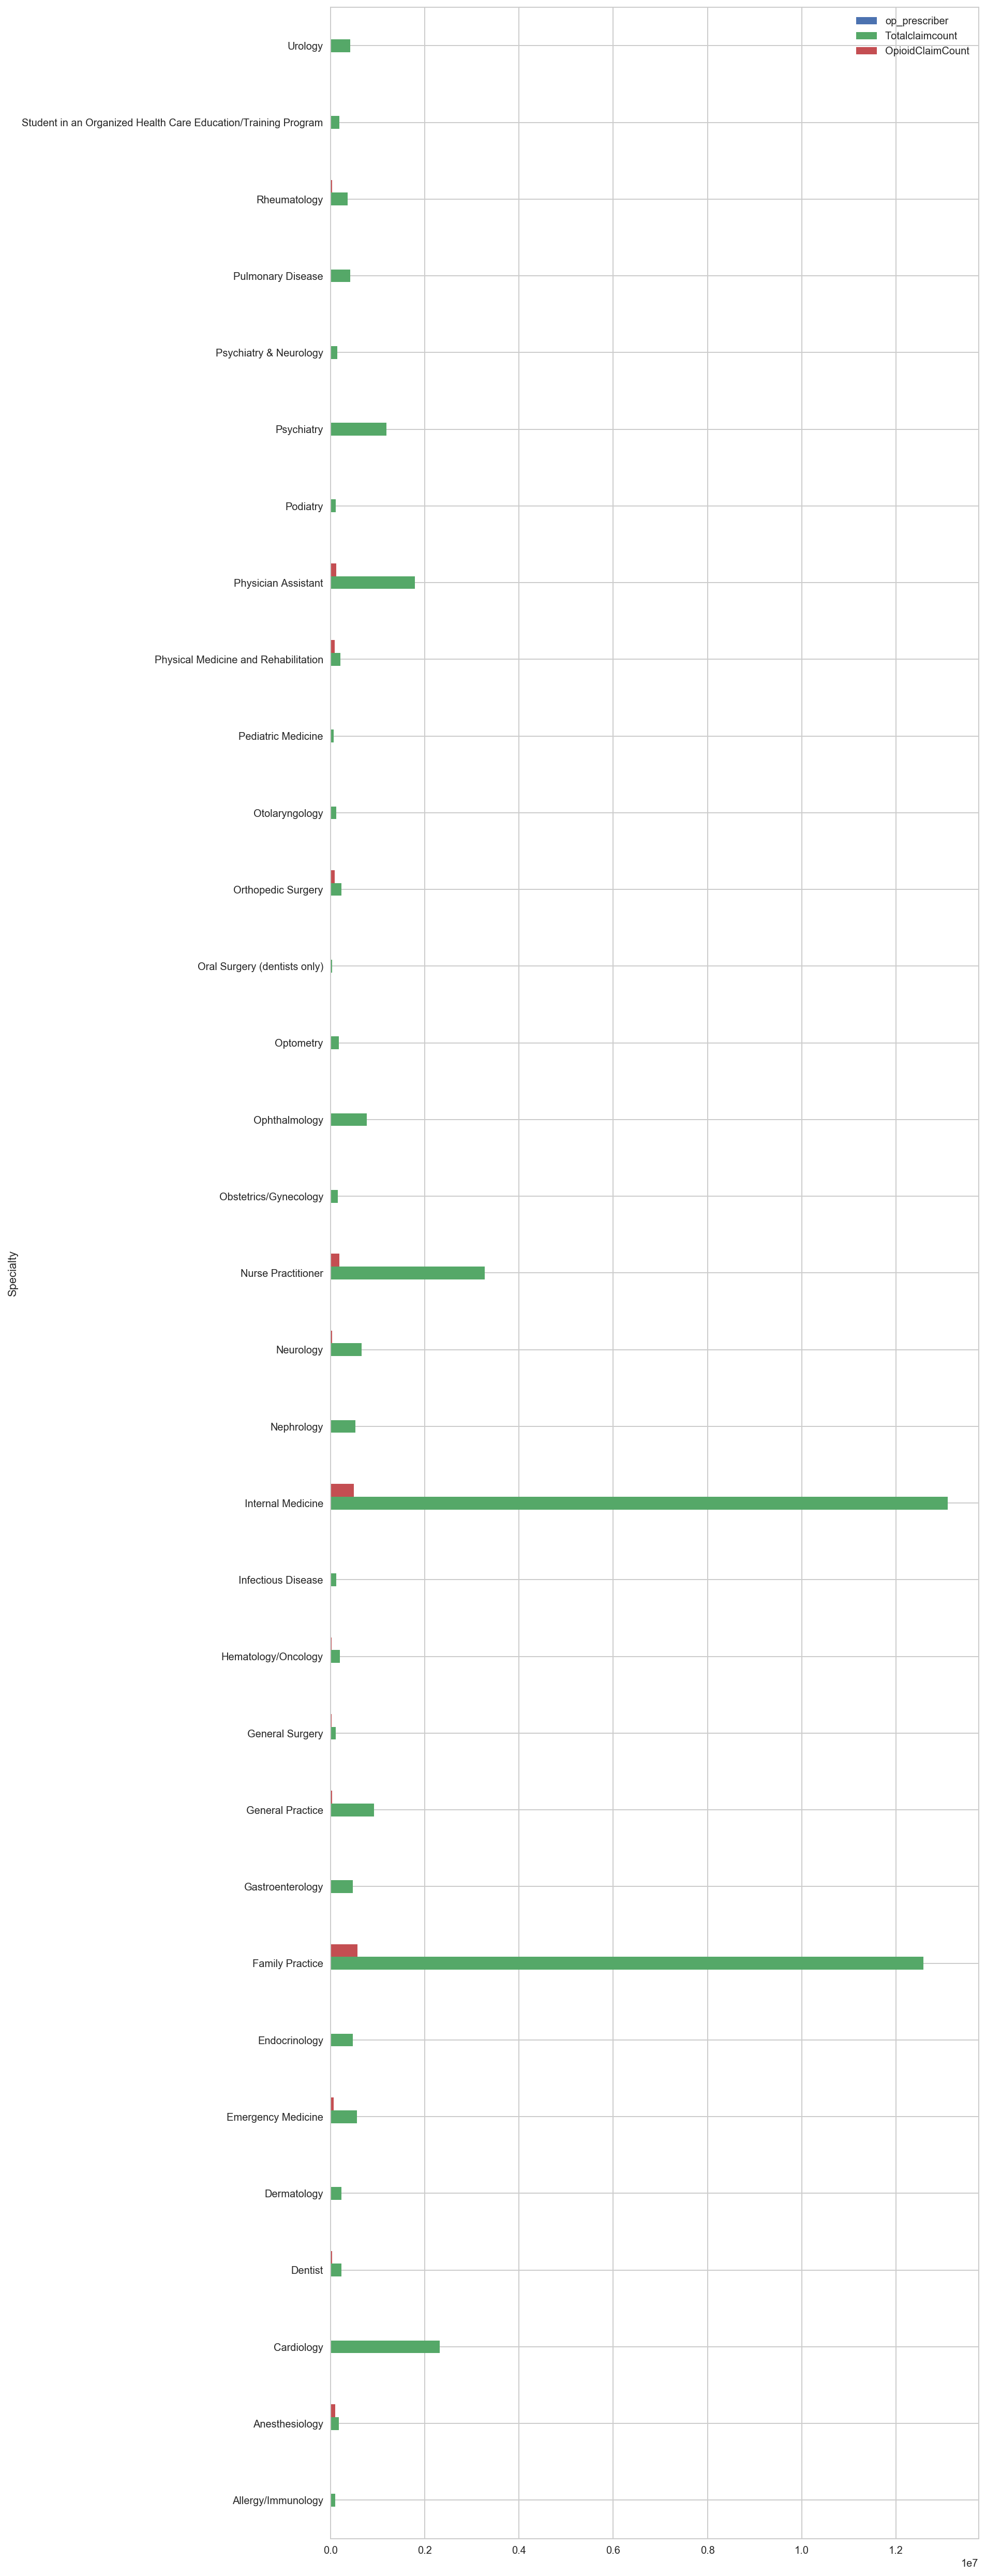

In [153]:
group_prescribers.plot(kind = 'barh', figsize =(12,24))

**Its very interesting to see that internal medicine and  family practice was by far significant interms of total opiod total claim count and opiod cliam count aggregate by speciality**

In [87]:
group_prescribers.corr()['op_prescriber']

op_prescriber       1.000000
Totalclaimcount     0.882238
OpioidClaimCount    0.926808
Name: op_prescriber, dtype: float64

## Using  pairplot to display the results

In [ ]:
# # Set default font size
# plt.rcParams['font.size'] = 10

# attrib_list = [ 'op_prescriber','Opioid Claim Count', 'Total Claim Count'] 
# # Note that we have dropped the missing values using dropna in order to displace the pair plots
# sns.pairplot(data = prescriber_df.dropna(), x_vars = attrib_list, y_vars = attrib_list,
#              hue = 'Specialty', palette="husl")

Text(0.5,1,'Health Specialits that prescribe opiods')

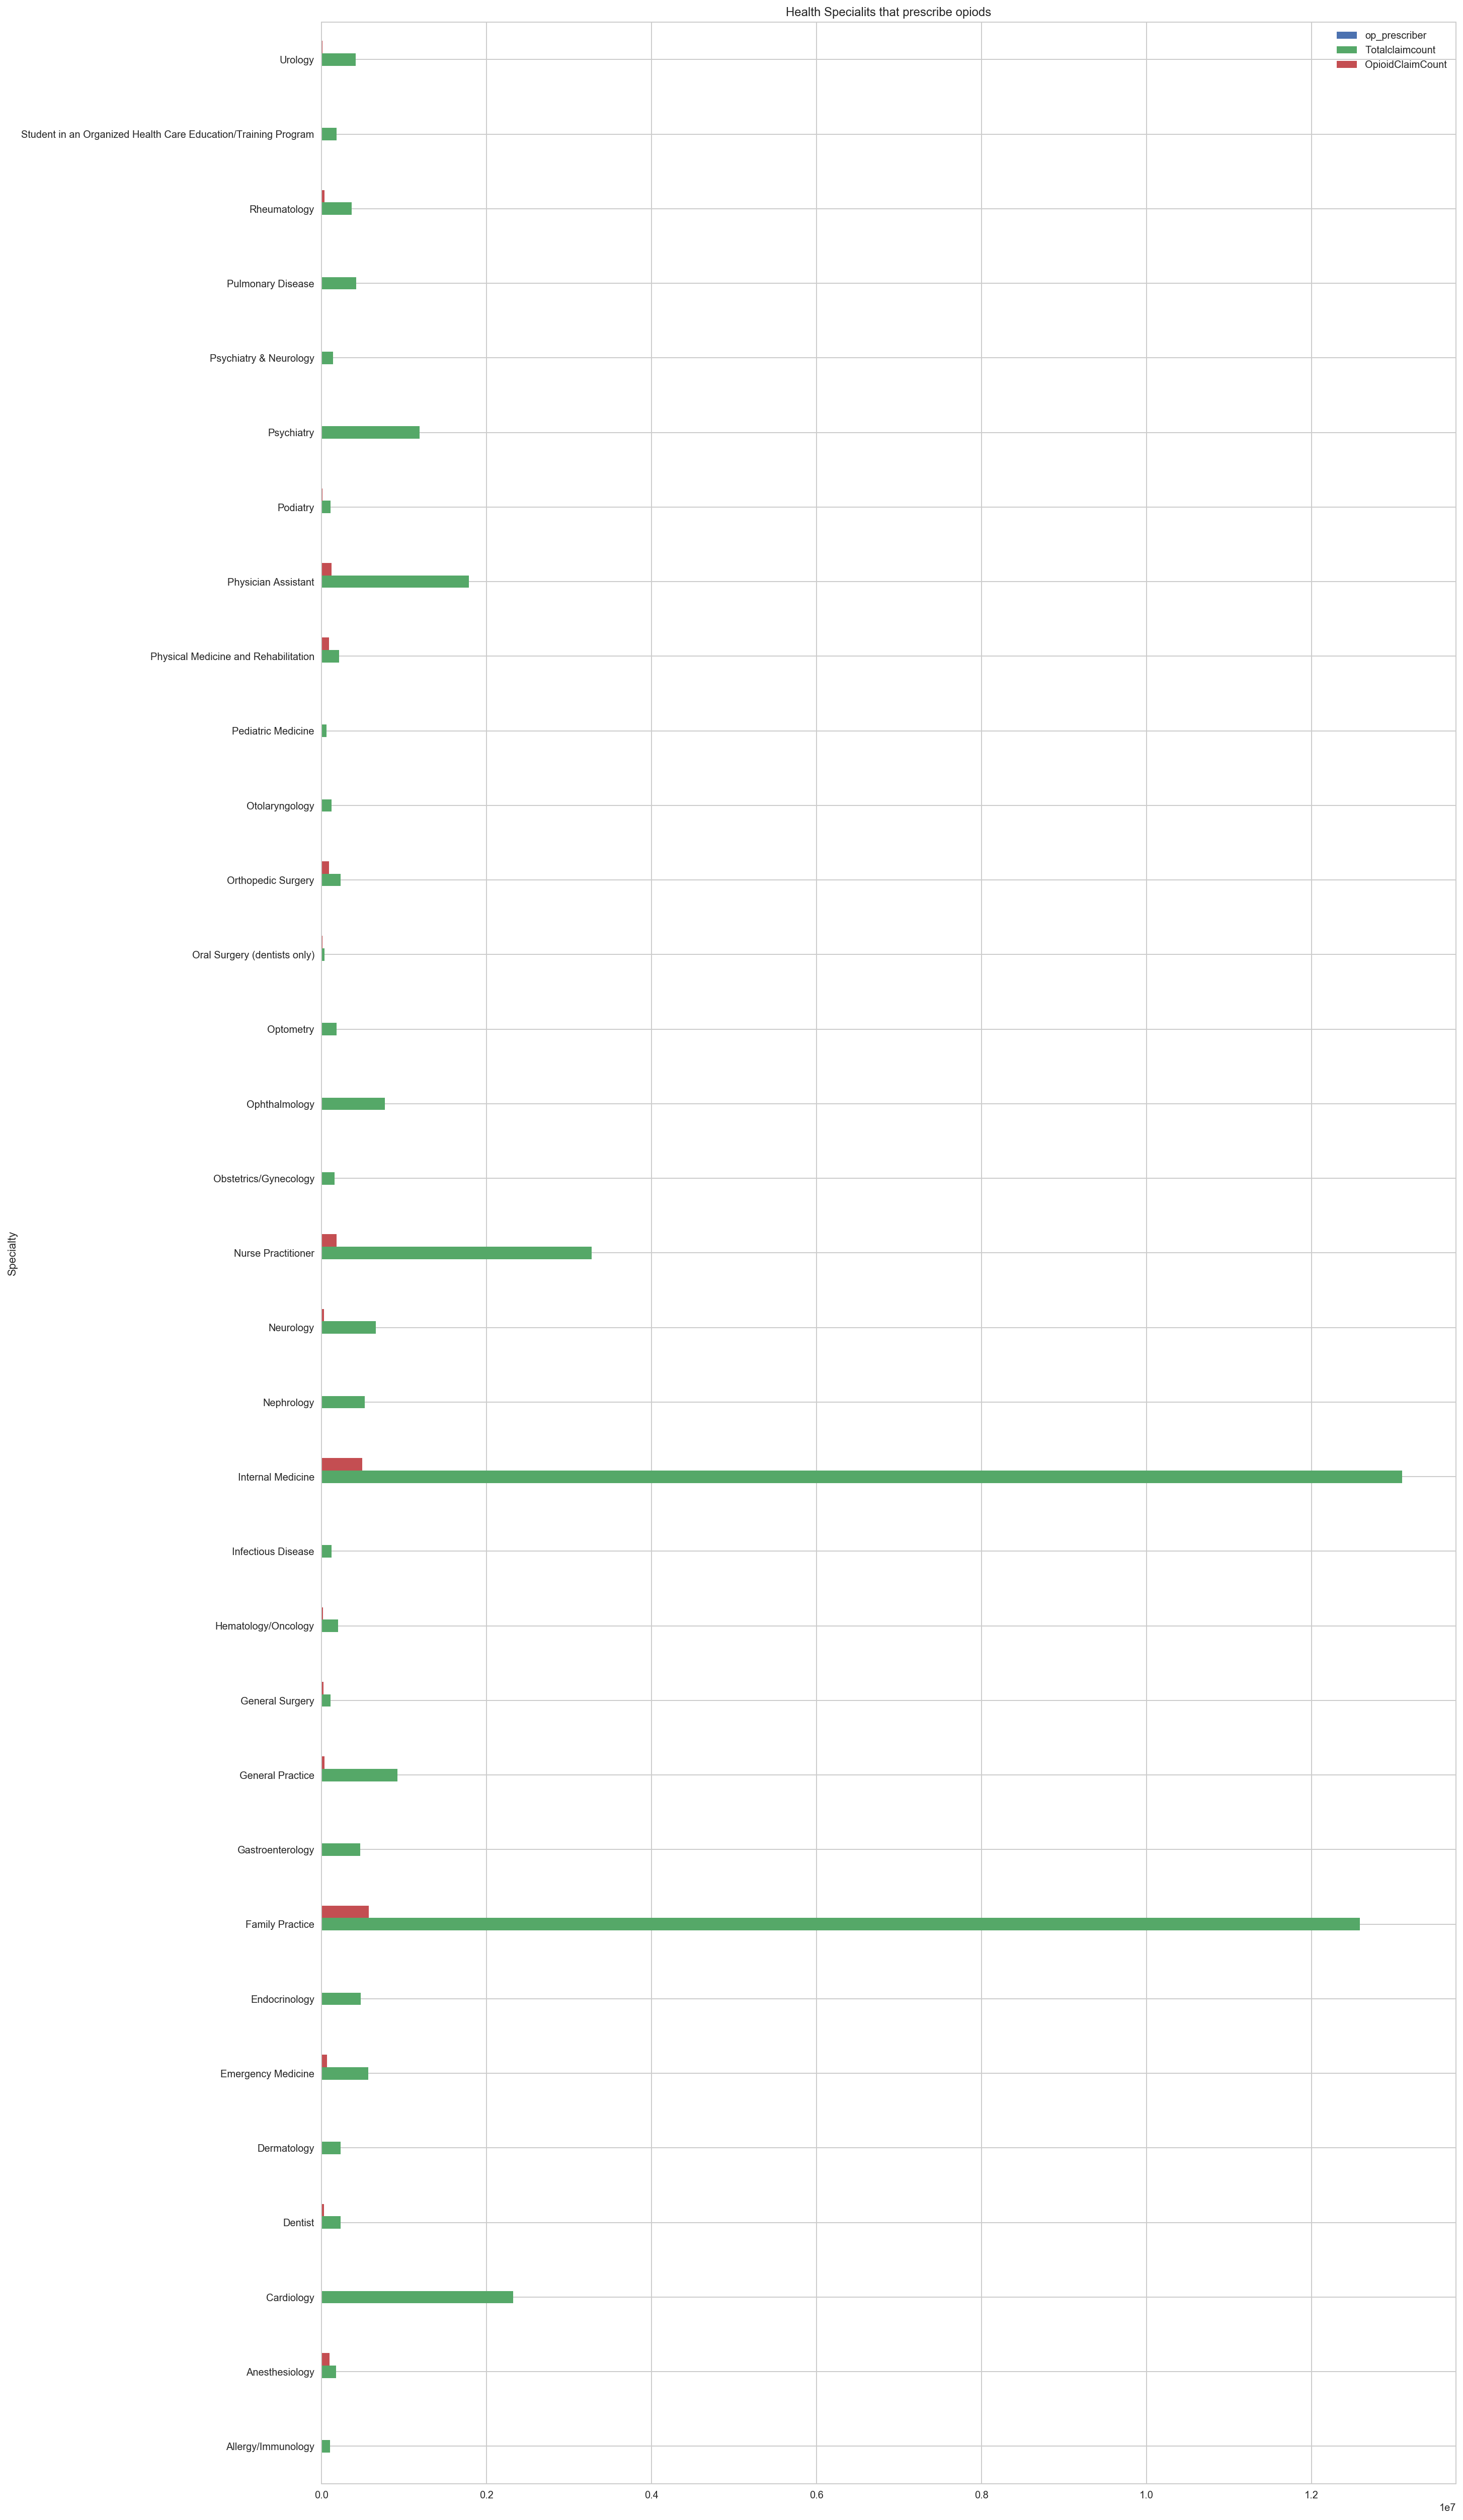

In [88]:
# Set figure size
fig, ax = plt.subplots(figsize = (20,40))
group_prescribers.plot(kind = 'barh', ax = ax)
plt.title('Health Specialits that prescribe opiods')

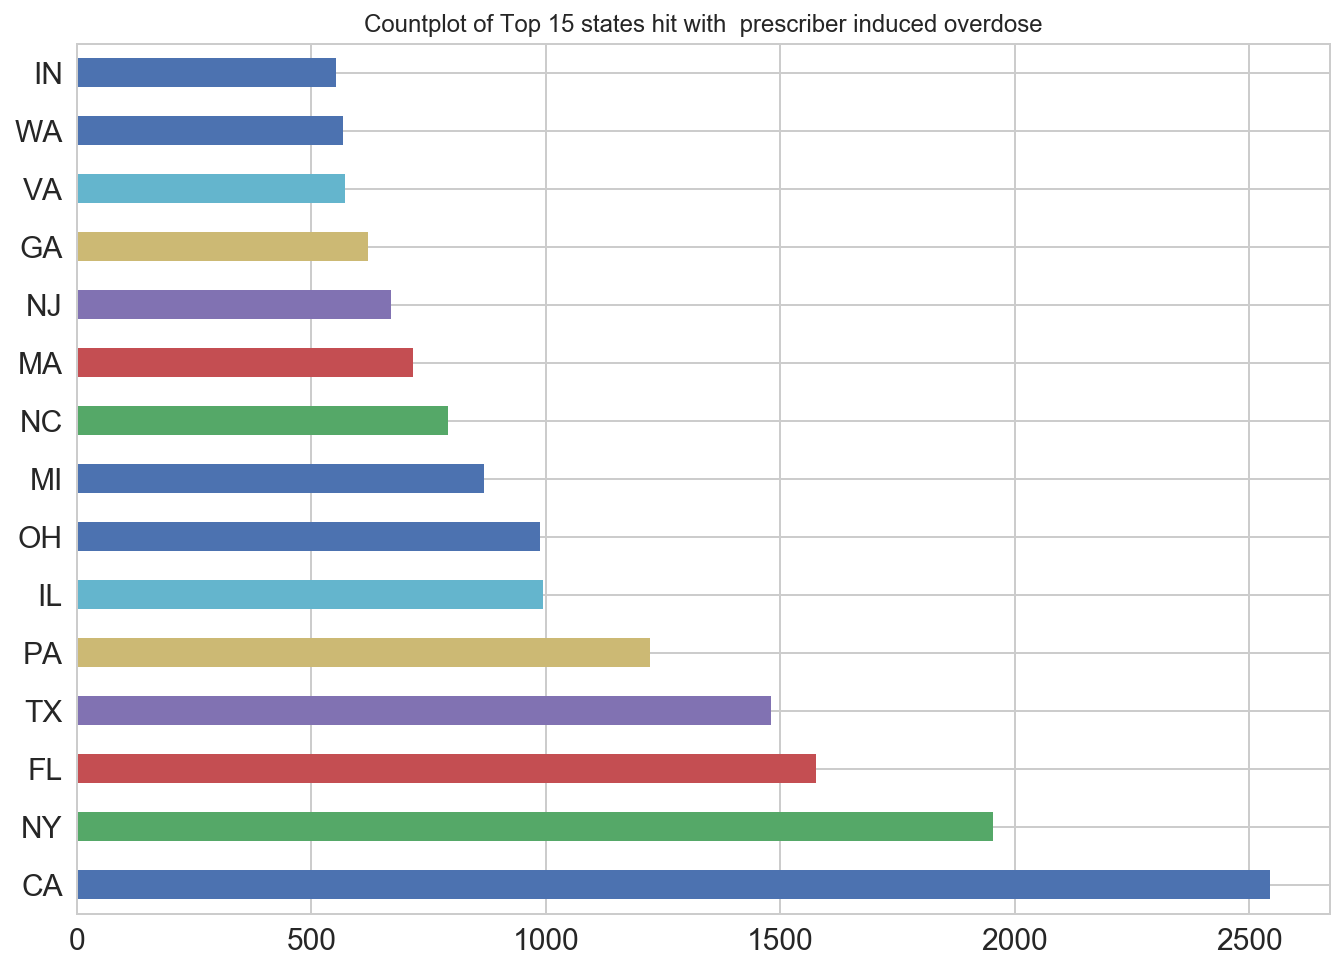

In [154]:
# Set figure size
fig = plt.subplots(figsize = (10,8))
prescriber_df['State'].value_counts().head(15).plot(kind = 'barh', fontsize = 15)
plt.title('Countplot of Top 15 states hit with  prescriber induced overdose')
plt.show()

The above bar shows the  Top 15 states hit with  prescriber induced overdose  for the year 2013-2016. As  can be seen above  California,NY,FL,TX,PA  are the top ones respectively.

In [155]:
list(prescriber_df)

['NPI',
 'Gender',
 'State',
 'Credentials',
 'Specialty',
 'NPPES Provider Last Name',
 'NPPES Provider First Name',
 'NPPES Provider ZIP Code',
 'NPPES Provider State',
 'Totalclaimcount',
 'OpioidClaimCount',
 'ACETAMINOPHEN.CODEINE',
 'ACYCLOVIR',
 'ADVAIR.DISKUS',
 'AGGRENOX',
 'ALENDRONATE.SODIUM',
 'ALLOPURINOL',
 'ALPRAZOLAM',
 'AMIODARONE.HCL',
 'AMITRIPTYLINE.HCL',
 'AMLODIPINE.BESYLATE',
 'AMLODIPINE.BESYLATE.BENAZEPRIL',
 'AMOXICILLIN',
 'AMOX.TR.POTASSIUM.CLAVULANATE',
 'AMPHETAMINE.SALT.COMBO',
 'ATENOLOL',
 'ATORVASTATIN.CALCIUM',
 'AVODART',
 'AZITHROMYCIN',
 'BACLOFEN',
 'BD.ULTRA.FINE.PEN.NEEDLE',
 'BENAZEPRIL.HCL',
 'BENICAR',
 'BENICAR.HCT',
 'BENZTROPINE.MESYLATE',
 'BISOPROLOL.HYDROCHLOROTHIAZIDE',
 'BRIMONIDINE.TARTRATE',
 'BUMETANIDE',
 'BUPROPION.HCL.SR',
 'BUPROPION.XL',
 'BUSPIRONE.HCL',
 'BYSTOLIC',
 'CARBAMAZEPINE',
 'CARBIDOPA.LEVODOPA',
 'CARISOPRODOL',
 'CARTIA.XT',
 'CARVEDILOL',
 'CEFUROXIME',
 'CELEBREX',
 'CEPHALEXIN',
 'CHLORHEXIDINE.GLUCONATE',
 'C

In [90]:
Gender_group_prescribers = prescriber_df.groupby(['Gender']).agg({'op_prescriber': 'sum',
                                                              'Totalclaimcount': 'sum',
                                                              'OpioidClaimCount': 'sum'})
Gender_group_prescribers

op_prescriber  Totalclaimcount  OpioidClaimCount
Gender                                                  
F              4811.0         13028415            596888
M              8524.0         29443584           1408523

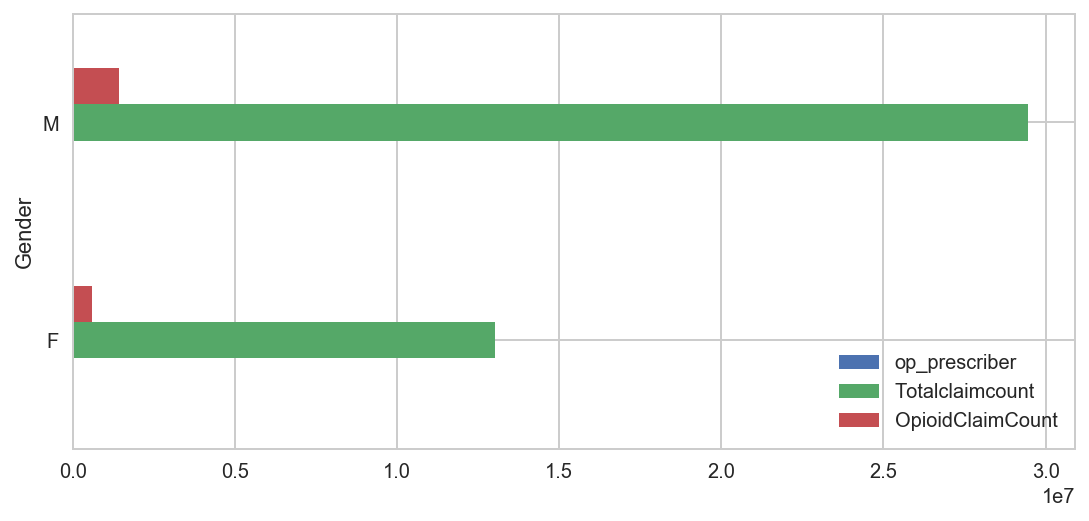

In [156]:
Gender_group_prescribers.plot(kind = 'barh', figsize =(8,4))

In [92]:
Gender_group_prescribers.corr()['op_prescriber']

op_prescriber       1.0
Totalclaimcount     1.0
OpioidClaimCount    1.0
Name: op_prescriber, dtype: float64

Text(0.5,1,'Health Specialits by Gender')

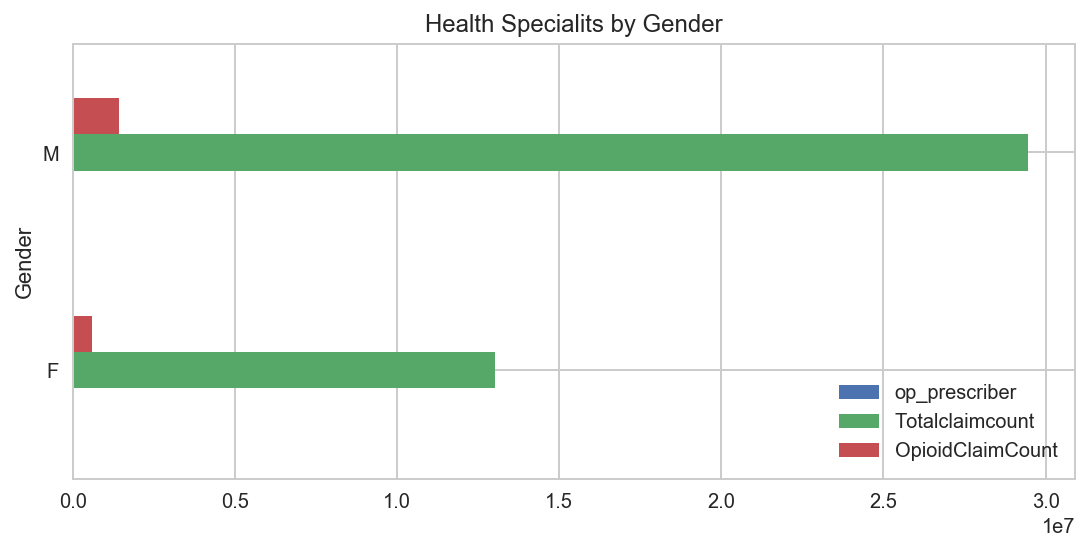

In [157]:
# visulizing the if gender has any attribute to over prescription
# Set figure size
fig, ax = plt.subplots(figsize = (8,4))

Gender_group_prescribers.plot(kind = 'barh', ax = ax)
plt.title('Health Specialits by Gender')

From the above chart its evident that the males have  the highest nuumber in the profession and they are the most dominant interms of prescribing as well as claim for opiods related costs from cms.looking the cliam based on the size its almost proportional.

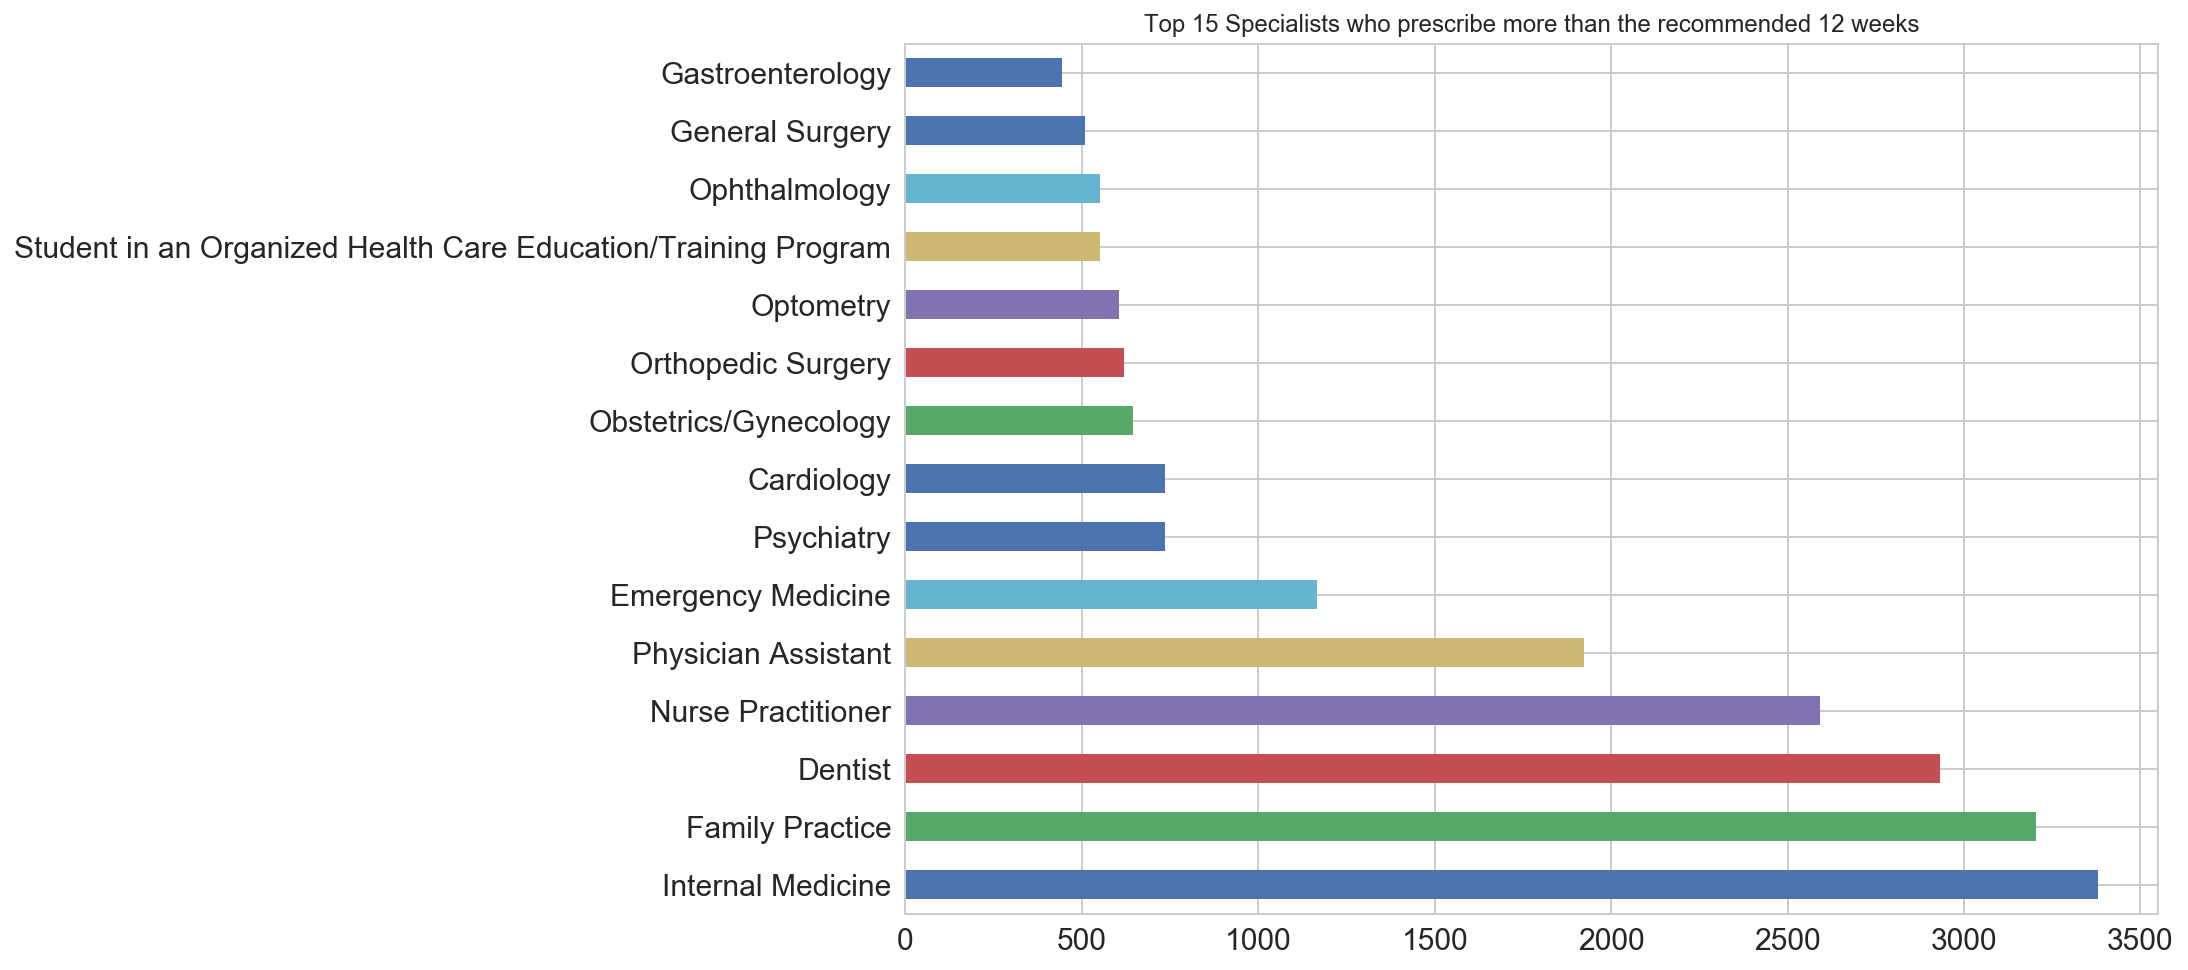

In [158]:
# Set figure size
fig = plt.subplots(figsize = (10,8))

prescriber_df['Specialty'].value_counts().head(15).plot(kind = 'barh', fontsize = 15)
plt.title('Top 15 Specialists who prescribe more than the recommended 12 weeks')
plt.show()

###  National Health Expenditure 

In [95]:
# read NHE spending csv into DF
nhe = "./inputs/NHE2016.csv"
nhe_df = pd.read_csv(nhe, thousands=',',engine='python')

nhe_df.head()

Expenditure Amount (Millions)   1960   1961   1962   1963   1964  \
0  Total National Health Expenditures  27214  29138  31842  34595  38394   
1                       Out of pocket  12949  13357  14255  15311  16928   
2                    Health Insurance   7497   8236   8999   9892  10971   
3            Private Health Insurance   5812   6468   7178   7952   9052   
4                            Medicare   -      -      -      -      -      

    1965   1966   1967   1968   ...        2007     2008     2009     2010  \
0  41852  46081  51565  58402   ...     2295307  2399121  2495414  2598823   
1  18209  18594  18537  20500   ...      290000   295184   293723   299742   
2  12023  15673  21109  24379   ...     1609250  1695968  1796424  1876922   
3  10072  10296  10452  11830   ...      776176   802857   832906   864344   
4   -      1842   4924   6218   ...      432751   466971   498859   519787   

      2011     2012     2013     2014     2015     2016  
0  2689349  2797260  2879008  3026157  3200815  3337248  
1   309973   318330   325189   330068   339315   352537  
2  1950187  2022904  2087804  2228136  2382770  2486842  
3   898631   928211   946398   999940  1068778  1123372  
4   544679   569634   590163   618889   648808   672093  

[5 rows x 58 columns]

In [96]:
# extract Total NHE and Total CMS Program rows
# the NHE has more rows which are  Out of pocket(OOP) and private health insurance and i am only interested to see the 
# Total CMS Programs (Medicaid, CHIP and medicare) section and the total health expenditure(THE) and 
# including the population i will use the following formula to extract. The T
nhe_cms_df = nhe_df.loc[[0,35,36],]
nhe_cms_df = nhe_cms_df.set_index("Expenditure Amount (Millions)")

# set to numeric for plotting purposes
nhe_cms_df = nhe_cms_df.apply(pd.to_numeric, errors='ignore')


nhe_cms_df.head()

1960   1961   1962   1963  \
Expenditure Amount (Millions)                                                  
Total National Health Expenditures                27214  29138  31842  34595   
Total CMS Programs (Medicaid, CHIP and Medicare)   -      -      -      -      
POPULATION                                          186    189    192    195   

                                                   1964   1965   1966   1967  \
Expenditure Amount (Millions)                                                  
Total National Health Expenditures                38394  41852  46081  51565   
Total CMS Programs (Medicaid, CHIP and Medicare)   -      -      3146   8065   
POPULATION                                          197    200    202    204   

                                                   1968   1969   ...     \
Expenditure Amount (Millions)                                    ...      
Total National Health Expenditures                58402  65923   ...      
Total CMS Programs (Medicaid, CHIP and Medicare)   9759  11220   ...      
POPULATION                                          206    208   ...      

                                                     2007     2008     2009  \
Expenditure Amount (Millions)                                                 
Total National Health Expenditures                2295307  2399121  2495414   
Total CMS Programs (Medicaid, CHIP and Medicare)   767613   821394   884386   
POPULATION                                            301      304      306   

                                                     2010     2011     2012  \
Expenditure Amount (Millions)                                                 
Total National Health Expenditures                2598823  2689349  2797260   
Total CMS Programs (Medicaid, CHIP and Medicare)   928553   963412  1004951   
POPULATION                                            309      311      313   

                                                     2013     2014     2015  \
Expenditure Amount (Millions)                                                 
Total National Health Expenditures                2879008  3026157  3200815   
Total CMS Programs (Medicaid, CHIP and Medicare)  1049032  1128749  1207734   
POPULATION                                            316      318      320   

                                                     2016  
Expenditure Amount (Millions)                              
Total National Health Expenditures                3337248  
Total CMS Programs (Medicaid, CHIP and Medicare)  1254525  
POPULATION                                            322  

[3 rows x 57 columns]

In [97]:
# Extract series of spending data 1999 - 2016 to compare against opioid deaths
cms_spending = nhe_cms_df.loc['Total CMS Programs (Medicaid, CHIP and Medicare)','1999':'2016']
nhe_spending = nhe_cms_df.loc['Total National Health Expenditures','1999':'2016']
percentage = cms_spending / nhe_spending

percentage.max()

0.3773207761148333

In [98]:
nhe_spending

1999    1277700
2000    1369125
2001    1486158
2002    1628624
2003    1767567
2004    1895724
2005    2023744
2006    2156158
2007    2295307
2008    2399121
2009    2495414
2010    2598823
2011    2689349
2012    2797260
2013    2879008
2014    3026157
2015    3200815
2016    3337248
Name: Total National Health Expenditures, dtype: object

In [99]:
# nhe_spending.to_csv('nhe_spending.csv')

In [100]:
# nhes =pd.read_csv('nhe_spending.csv')

In [101]:
csv_file = "./inputs/DPDRate.csv"

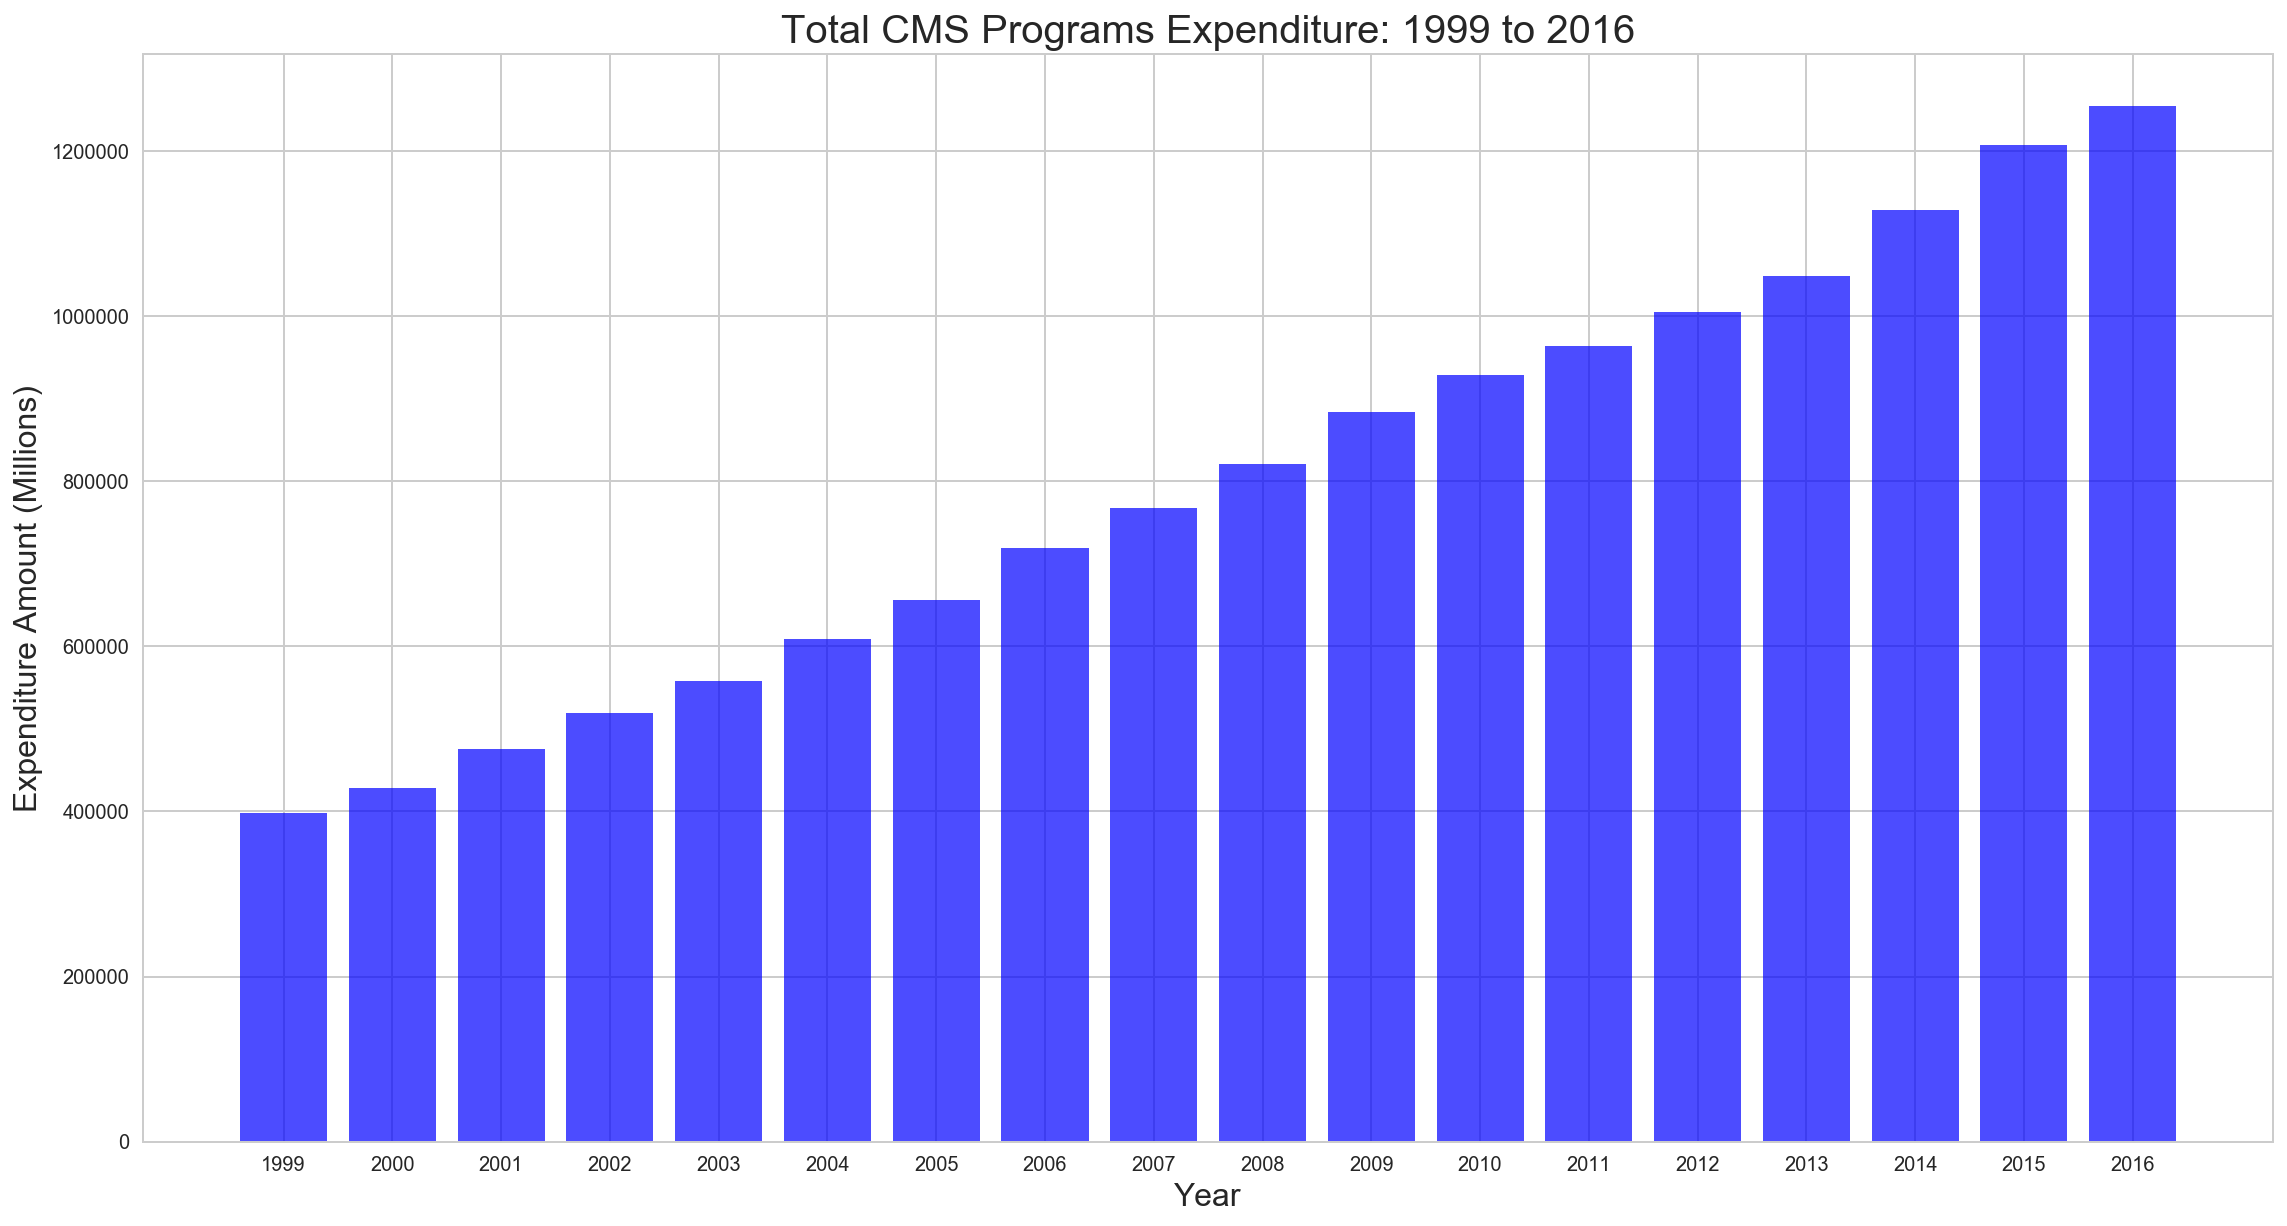

In [102]:
DPDRate_df = pd.read_csv(csv_file, index_col="Year")                           # reads data from file
DPDRate_df.head()
year_min = DPDRate_df.index.min()                                              # finds min and max dates
year_max = DPDRate_df.index.max()
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total CMS Programs Expenditure: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(DPDRate_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, cms_spending, color='m', alpha=0.7, align="edge")
plt.xticks(tick_locations, DPDRate_df['Year Code'], rotation="horizontal")
plt.show()

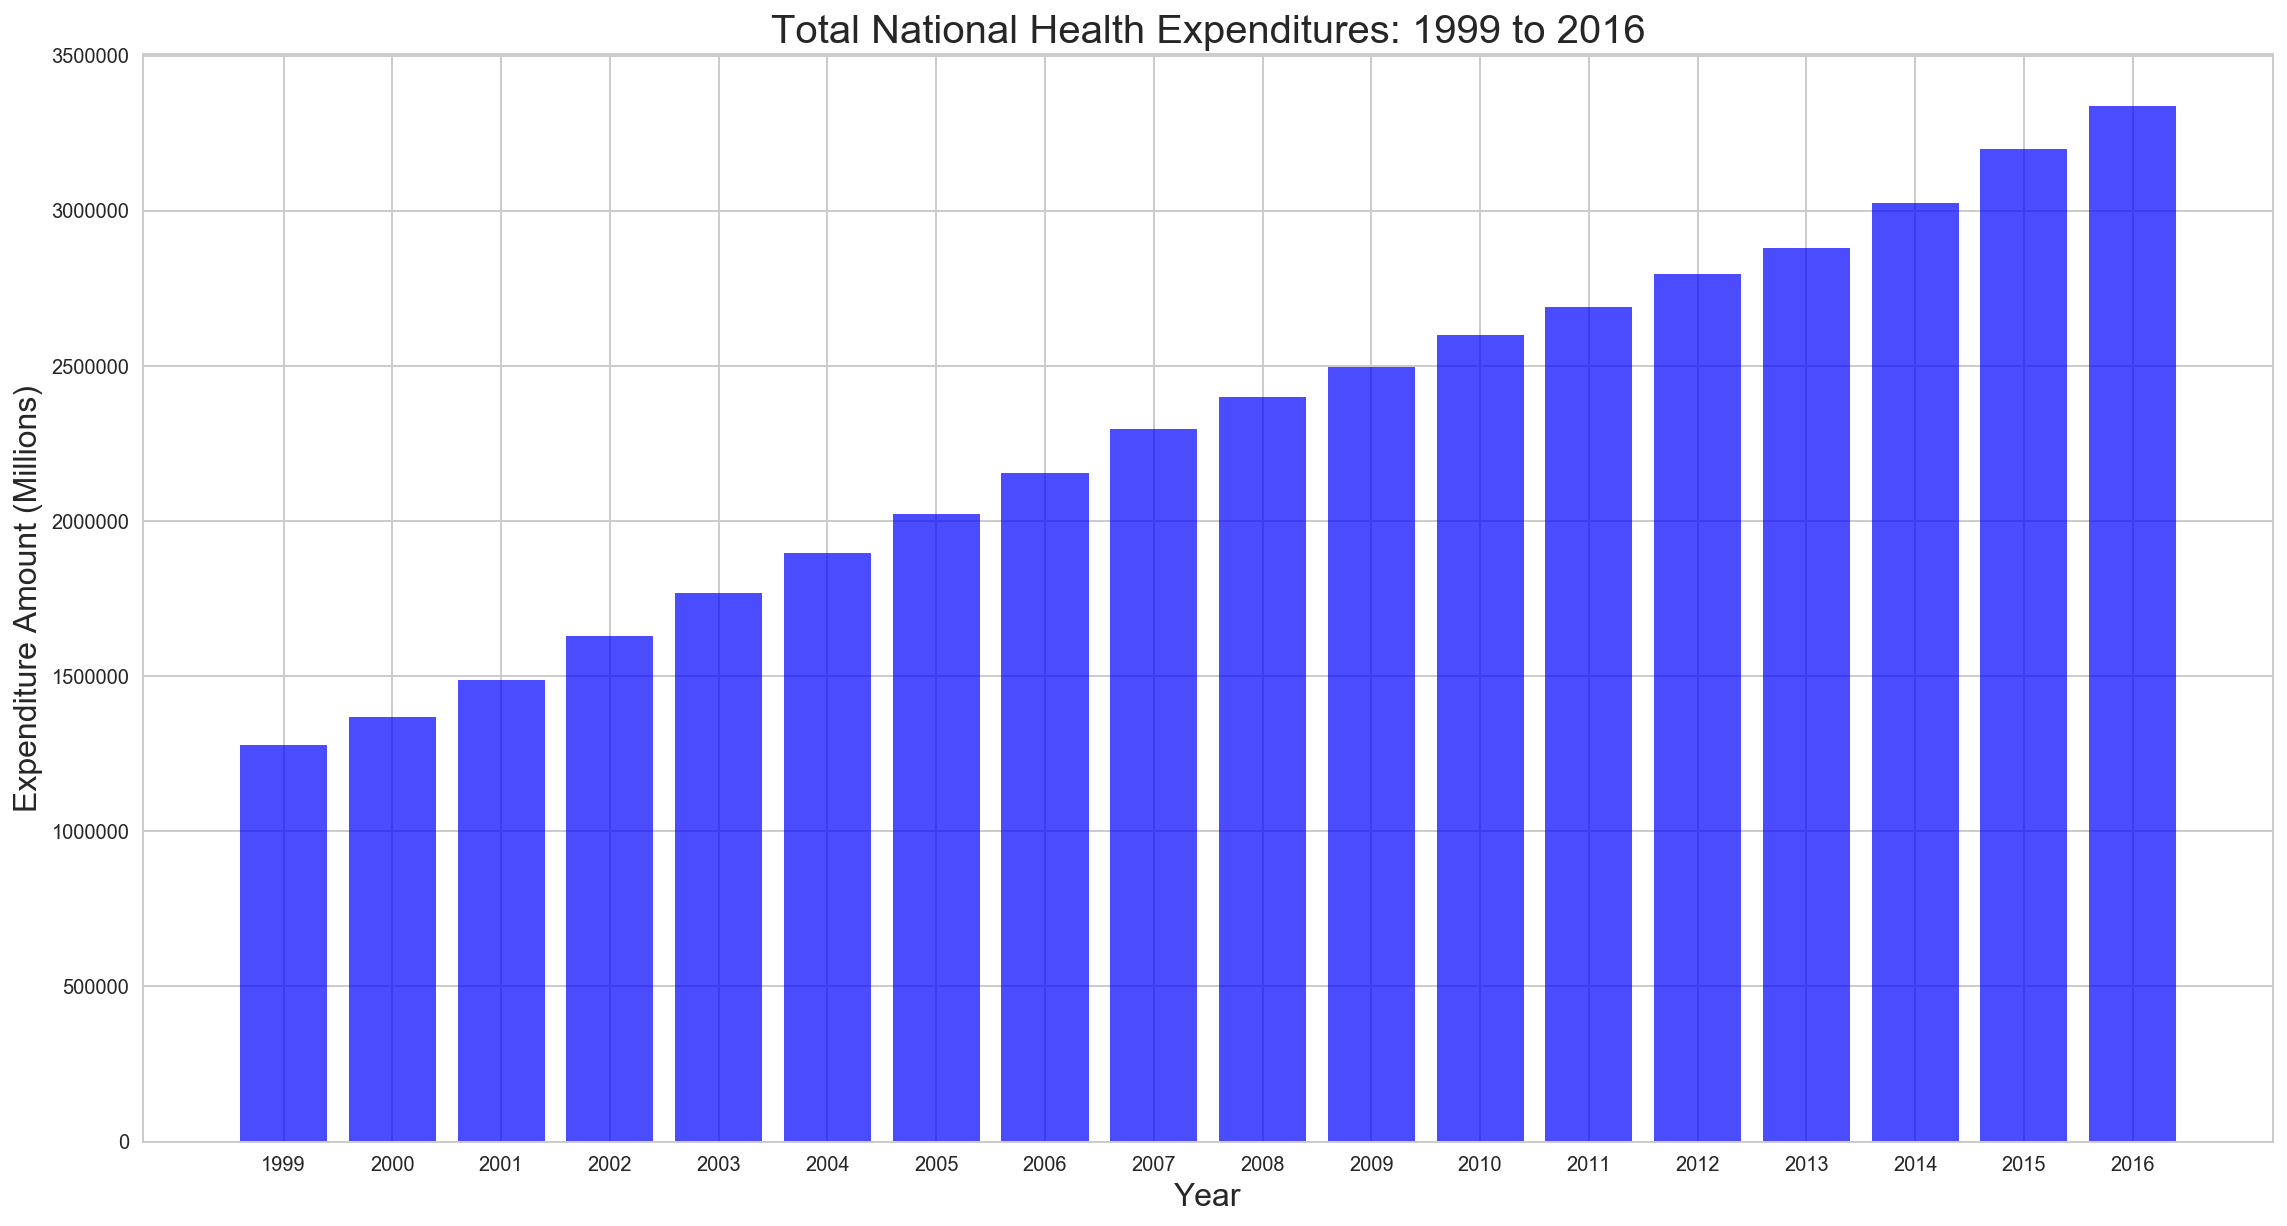

In [103]:
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total National Health Expenditures: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(DPDRate_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, nhe_spending, color='m', alpha=0.7, align="edge")
plt.xticks(tick_locations, DPDRate_df['Year Code'], rotation="horizontal")
plt.show()

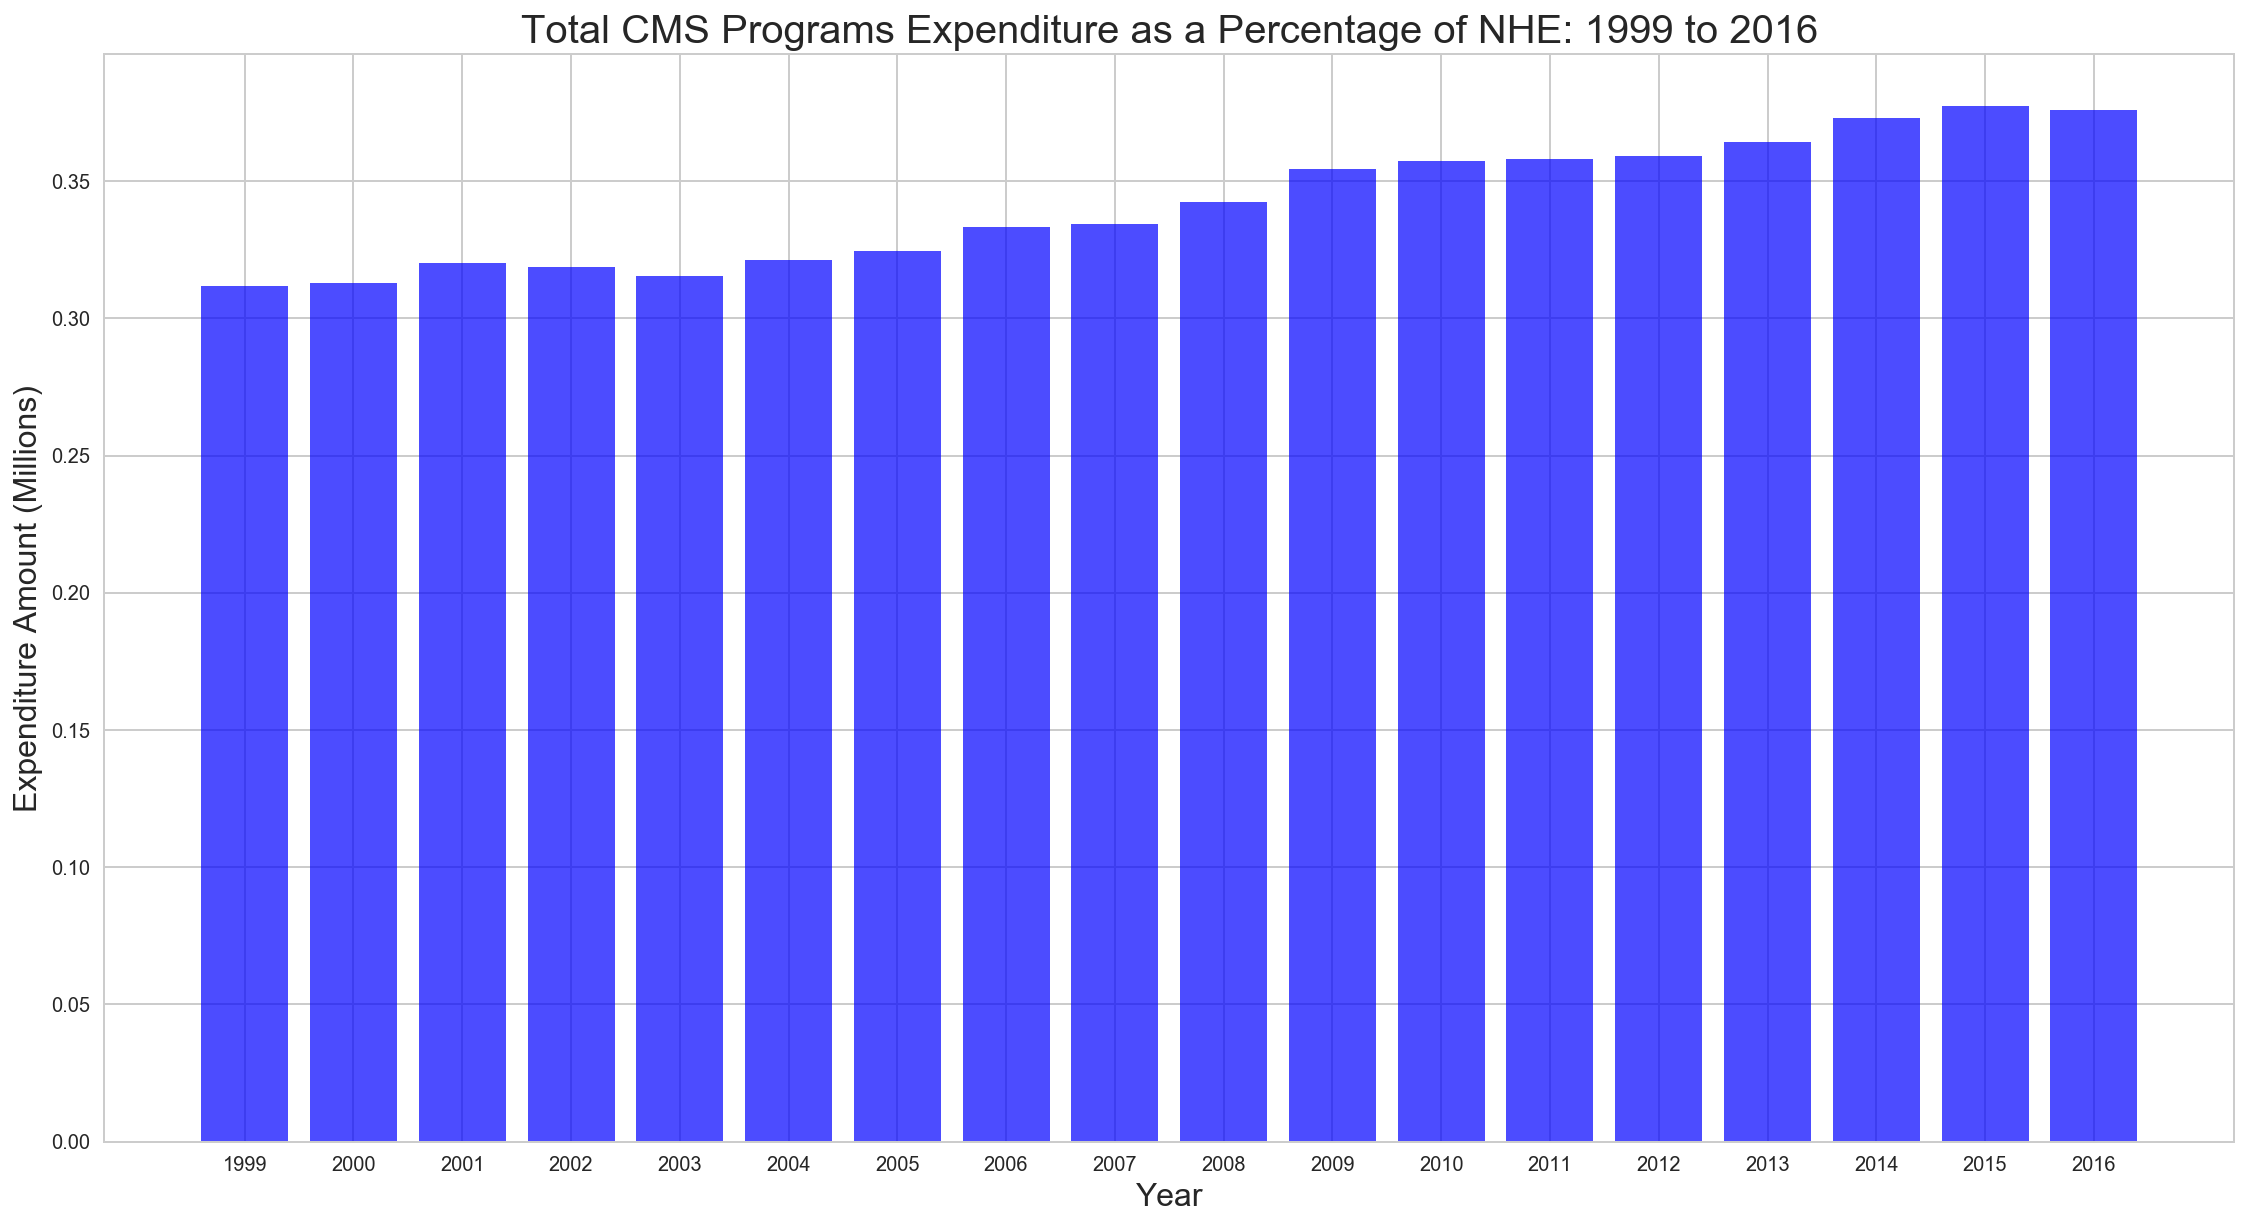

In [104]:
# plot CMS spending as percentage of NHE
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total CMS Programs Expenditure as a Percentage of NHE: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(DPDRate_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, cms_spending / nhe_spending, color='#eeefff', alpha=0.7, align="edge")
plt.xticks(tick_locations, DPDRate_df['Year Code'], rotation="horizontal")

plt.show()

In [105]:
psr_df= pd.read_csv('./inputs/prescriber_state_rate.csv')
pcr_df = pd.read_csv('./inputs/prescriber_county_rate.csv')
pzr_df= pd.read_csv('./inputs/prescriber_zip_rate.csv')

In [106]:
psr_df.head()[:2]

State_Name State_Abbreviation  2013_Opioid_Prescribing_Rate  \
0   National                NaN                          5.82   
1    Alabama                 AL                          7.75   

   2013_Extended_Release_Opioid_Prescribing_Rate  \
0                                           6.12   
1                                           5.24   

   2014_Opioid_Prescribing_Rate  \
0                          5.74   
1                          7.86   

   2014_Extended_Release_Opioid_Prescribing_Rate  \
0                                           6.27   
1                                           5.24   

   2015_Opioid_Prescribing_Rate  \
0                          5.52   
1                          7.54   

   2015_Extended_Release_Opioid_Prescribing_ Rate  \
0                                            6.71   
1                                            5.55   

   2016_Opioid_Prescribing_Rate  \
0                          5.34   
1                          7.47   

   2016_Extended_Release_Opioid_Prescribing_ Rate  \
0                                            6.92   
1                                            5.59   

   2013_2016_Change in Opioid Prescribing Rate  \
0                                        -0.47   
1                                        -0.28   

   2013_2016_Change in Extended Release Opioid Prescribing Rate   
0                                               0.80              
1                                               0.35

In [107]:
psr_changeex_df = psr_df[['State_Name','2013_2016_Change in Opioid Prescribing Rate', '2013_2016_Change in Extended Release Opioid Prescribing Rate ']]
psr_changeex_df .head()[:2]

State_Name  2013_2016_Change in Opioid Prescribing Rate  \
0   National                                        -0.47   
1    Alabama                                        -0.28   

   2013_2016_Change in Extended Release Opioid Prescribing Rate   
0                                               0.80              
1                                               0.35

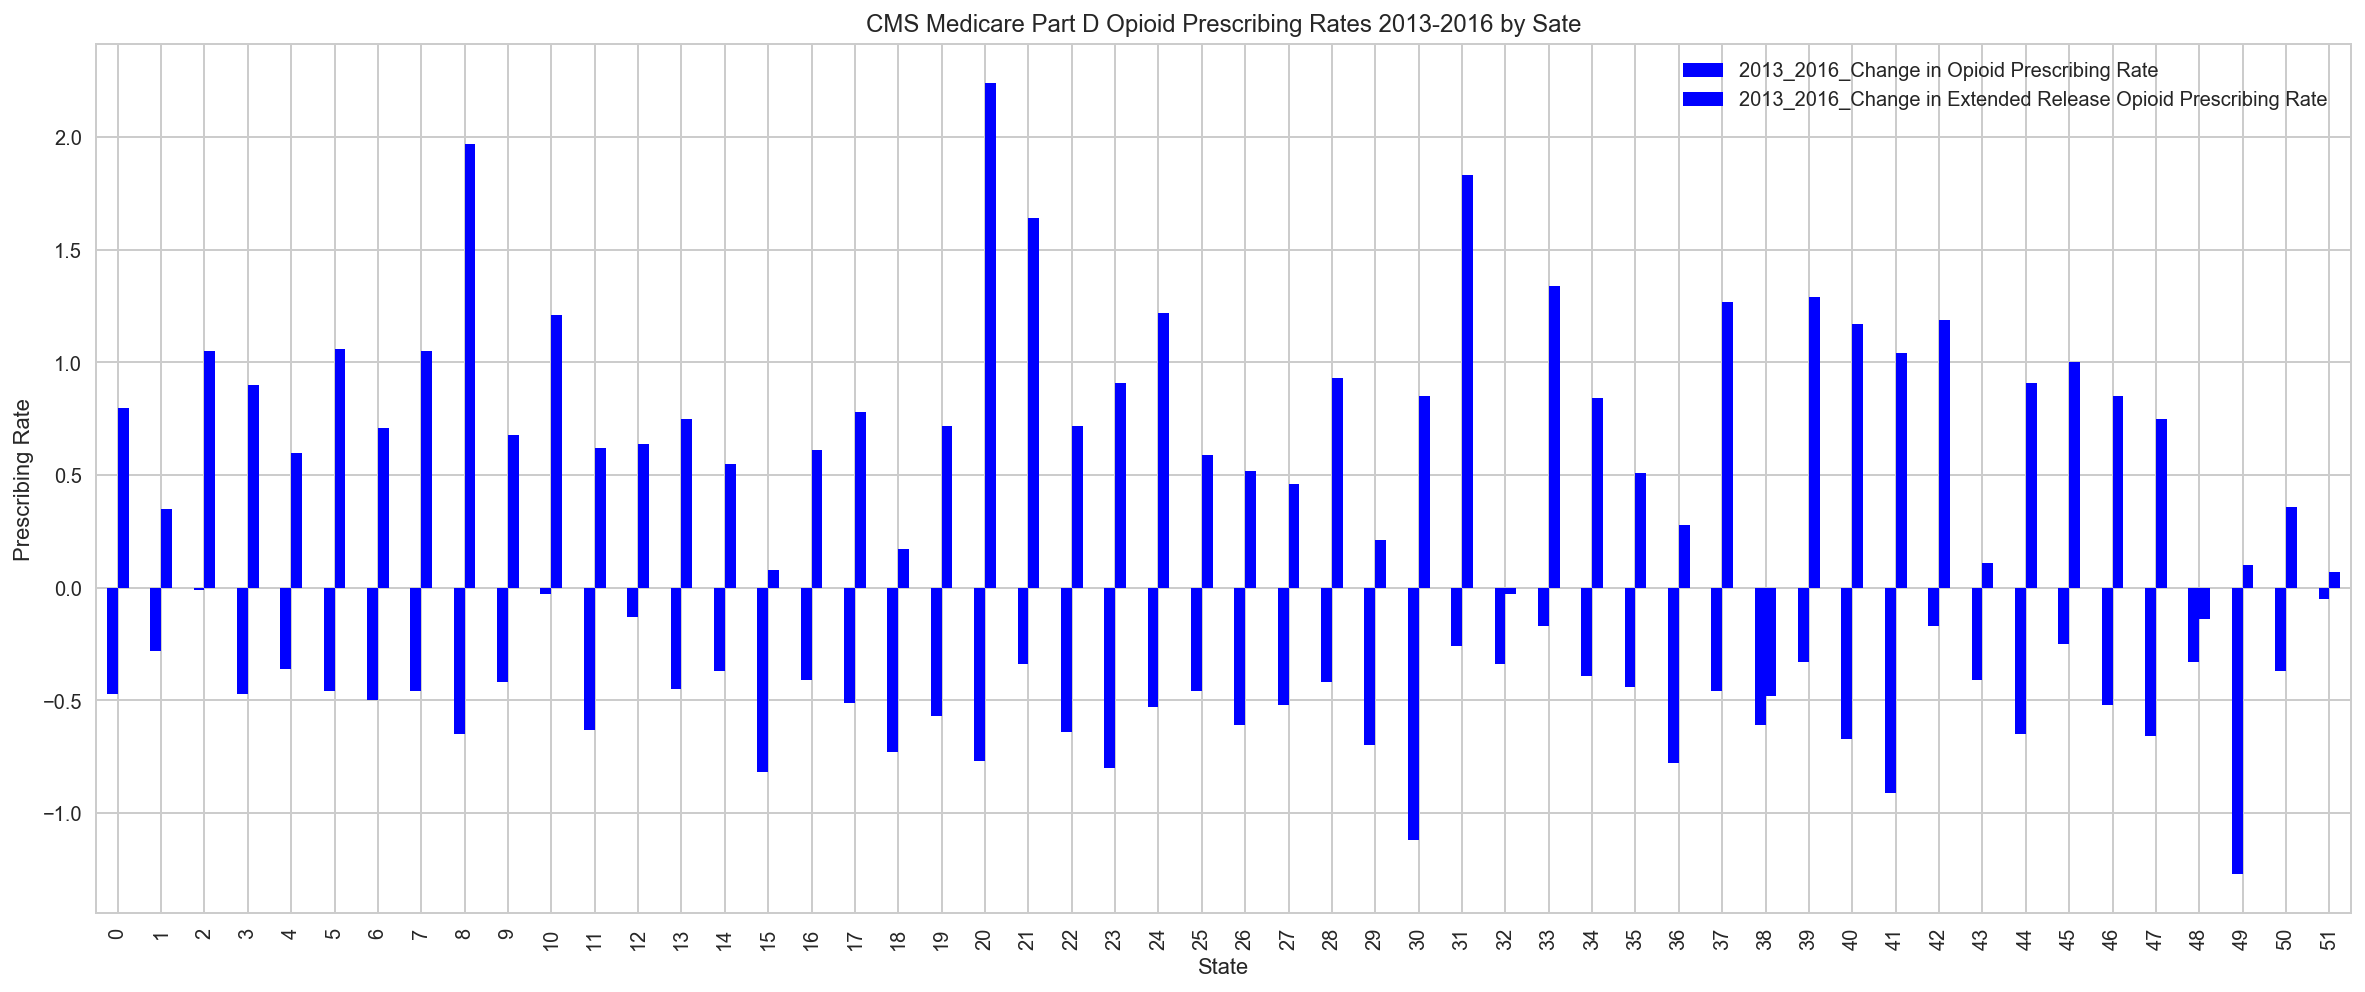

In [108]:
# Configure plot and ticks
psr_changeex_df.plot(kind="bar", facecolor="#eeefff", figsize=(18,8))

#Set bar labels
bar_labels = psr_df['State_Name']
              
# Create the x position of the bars
x_pos = list(range(len(bar_labels)))  


# Set textual properties
plt.title("CMS Medicare Part D Opioid Prescribing Rates 2013-2016 by Sate")
plt.ylabel("Prescribing Rate")
plt.xlabel("State")

# Show plot
plt.show()

In [109]:
psr_changeex_df1 = psr_df[['State_Name', '2013_2016_Change in Extended Release Opioid Prescribing Rate ']]
psr_changeex_df1

State_Name  \
0               National   
1                Alabama   
2                 Alaska   
3                Arizona   
4               Arkansas   
5             California   
6               Colorado   
7            Connecticut   
8               Delaware   
9   District of Columbia   
10               Florida   
11               Georgia   
12                Hawaii   
13                 Idaho   
14              Illinois   
15               Indiana   
16                  Iowa   
17                Kansas   
18              Kentucky   
19             Louisiana   
20                 Maine   
21              Maryland   
22         Massachusetts   
23              Michigan   
24             Minnesota   
25           Mississippi   
26              Missouri   
27               Montana   
28              Nebraska   
29                Nevada   
30         New Hampshire   
31            New Jersey   
32            New Mexico   
33              New York   
34        North Carolina   
35          North Dakota   
36                  Ohio   
37              Oklahoma   
38                Oregon   
39          Pennsylvania   
40          Rhode Island   
41        South Carolina   
42          South Dakota   
43             Tennessee   
44                 Texas   
45                  Utah   
46               Vermont   
47              Virginia   
48            Washington   
49         West Virginia   
50             Wisconsin   
51               Wyoming   

    2013_2016_Change in Extended Release Opioid Prescribing Rate   
0                                                0.80              
1                                                0.35              
2                                                1.05              
3                                                0.90              
4                                                0.60              
5                                                1.06              
6                                                0.71              
7                                                1.05              
8                                                1.97              
9                                                0.68              
10                                               1.21              
11                                               0.62              
12                                               0.64              
13                                               0.75              
14                                               0.55              
15                                               0.08              
16                                               0.61              
17                                               0.78              
18                                               0.17              
19                                               0.72              
20                                               2.24              
21                                               1.64              
22                                               0.72              
23                                               0.91              
24                                               1.22              
25                                               0.59              
26                                               0.52              
27                                               0.46              
28                                               0.93              
29                                               0.21              
30                                               0.85              
31                                               1.83              
32                                              -0.03              
33                                               1.34              
34                                               0.84              
35                                               0.51              
36           

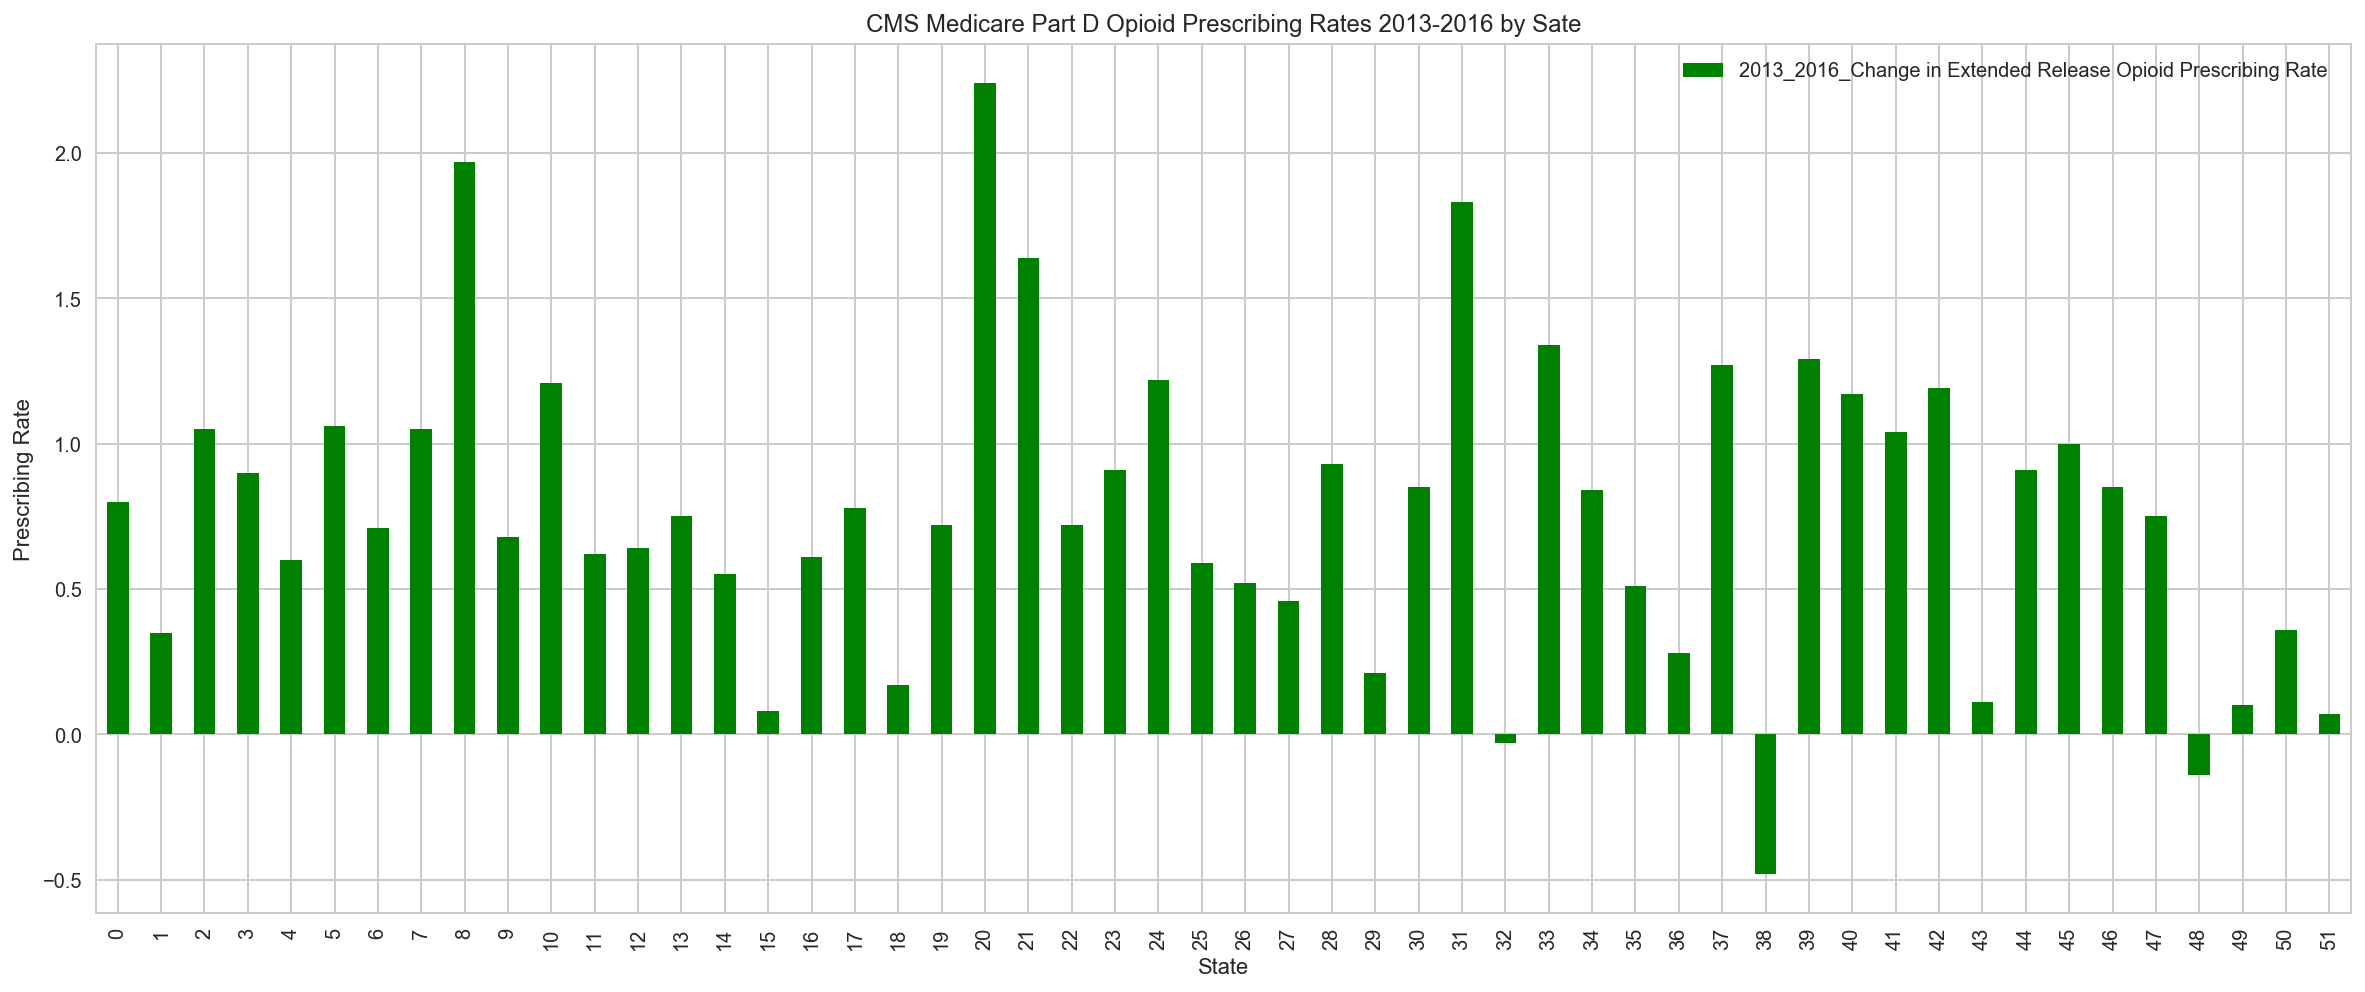

In [110]:
# Configure plot and ticks
psr_changeex_df1.plot(kind="bar", facecolor="g", figsize=(18,8))

#Set bar labels
bar_labels = psr_df["State_Abbreviation"]
              
# Create the x position of the bars
x_pos = list(range(len(bar_labels)))  


# Set textual properties
plt.title("CMS Medicare Part D Opioid Prescribing Rates 2013-2016 by Sate")
plt.ylabel("Prescribing Rate")
plt.xlabel("State")

# Show plot
plt.show()

In [111]:
psr_changeex_df = psr_df[['State_Name','2013_2016_Change in Opioid Prescribing Rate', '2013_2016_Change in Extended Release Opioid Prescribing Rate ']]
psr_changeex_df

State_Name  2013_2016_Change in Opioid Prescribing Rate  \
0               National                                        -0.47   
1                Alabama                                        -0.28   
2                 Alaska                                        -0.01   
3                Arizona                                        -0.47   
4               Arkansas                                        -0.36   
5             California                                        -0.46   
6               Colorado                                        -0.50   
7            Connecticut                                        -0.46   
8               Delaware                                        -0.65   
9   District of Columbia                                        -0.42   
10               Florida                                        -0.03   
11               Georgia                                        -0.63   
12                Hawaii                                        -0.13   
13                 Idaho                                        -0.45   
14              Illinois                                        -0.37   
15               Indiana                                        -0.82   
16                  Iowa                                        -0.41   
17                Kansas                                        -0.51   
18              Kentucky                                        -0.73   
19             Louisiana                                        -0.57   
20                 Maine                                        -0.77   
21              Maryland                                        -0.34   
22         Massachusetts                                        -0.64   
23              Michigan                                        -0.80   
24             Minnesota                                        -0.53   
25           Mississippi                                        -0.46   
26              Missouri                                        -0.61   
27               Montana                                        -0.52   
28              Nebraska                                        -0.42   
29                Nevada                                        -0.70   
30         New Hampshire                                        -1.12   
31            New Jersey                                        -0.26   
32            New Mexico                                        -0.34   
33              New York                                        -0.17   
34        North Carolina                                        -0.39   
35          North Dakota                                        -0.44   
36                  Ohio                                        -0.78   
37              Oklahoma                                        -0.46   
38                Oregon                                        -0.61   
39          Pennsylvania                                        -0.33   
40          Rhode Island                                        -0.67   
41        South Carolina                                        -0.91   
42          South Dakota                                        -0.17   
43             Tennessee                                        -0.41   
44                 Texas                                        -0.65   
45                  Utah                                        -0.25   
46               Vermont                                        -0.52   
47              Virginia                                        -0.66   
48            Washington                                        -0.33   
49         West Virginia                                        -1.27   
50             Wisconsin                                        -0.37   
51               Wyoming                                        -0.05   

    2013_2016_Change in Extended Release Opioid Prescribing Rate   
0                                                0.80              
1       

In [ ]:
psr_changeex_df.columns

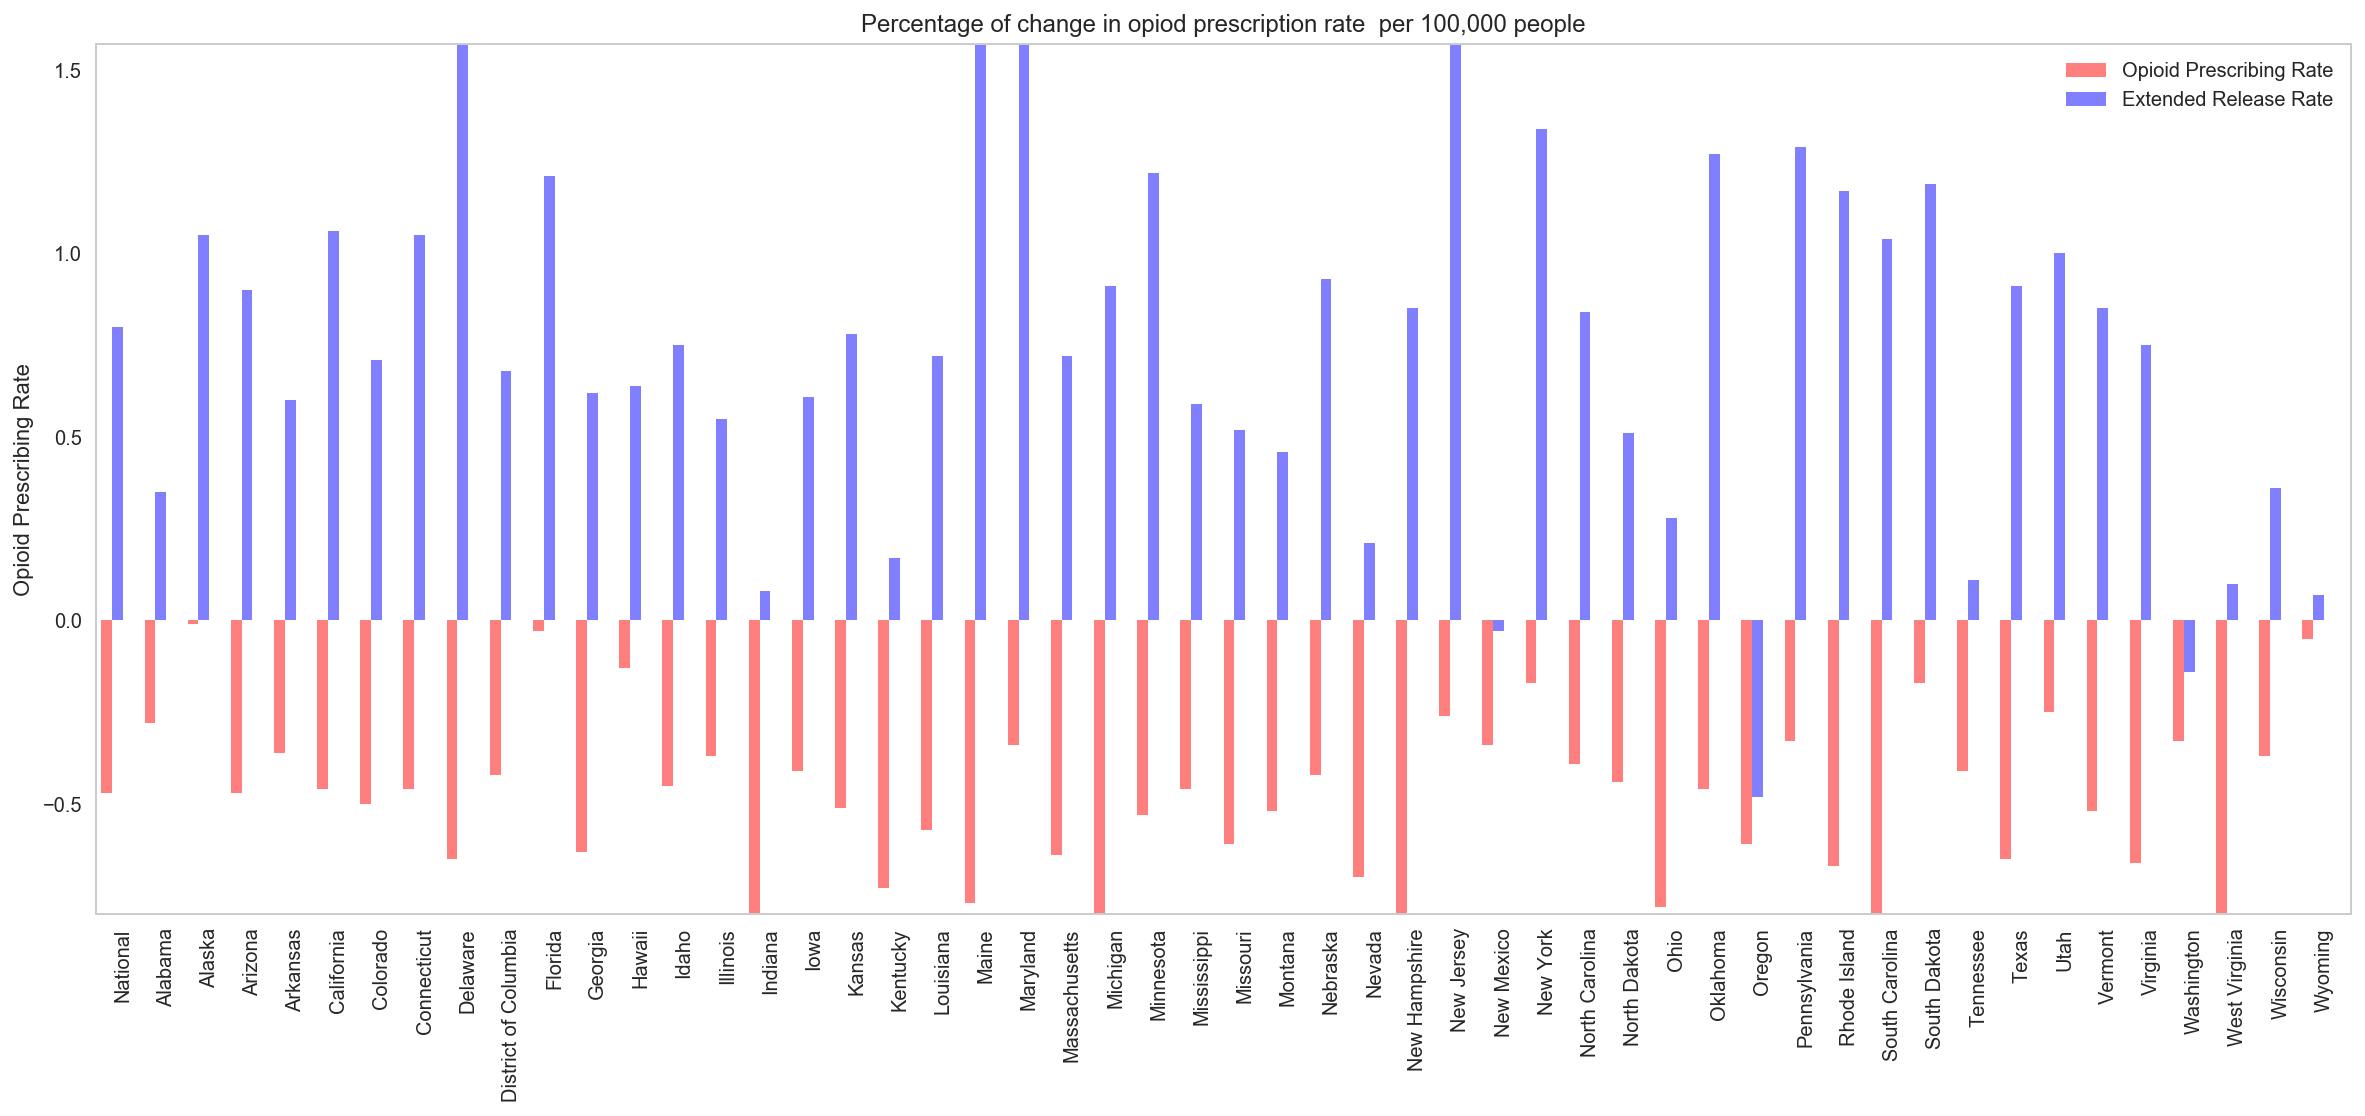

In [120]:
# Setting the positions and width for the bars
pos = list(range(len(psr_changeex_df['State_Name']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(18,8))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using psr_changeex_df['2013_2016_Change in Opioid Prescribing Rate'] data,
         
        psr_changeex_df['2013_2016_Change in Opioid Prescribing Rate'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='r', 
        # with label the first value in first_name
        label=psr_changeex_df['2013_2016_Change in Opioid Prescribing Rate'][0]) 

# Create a bar with mid_of length of data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        psr_changeex_df['2013_2016_Change in Extended Release Opioid Prescribing Rate '],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='b', 
        # with label the second value in first_name
        label= psr_changeex_df['2013_2016_Change in Extended Release Opioid Prescribing Rate '][1]) 

# Set the y axis label
ax.set_ylabel('Opioid Prescribing Rate')
#plt.ylabel("Prescribing Rate")

# Set the chart's title
ax.set_title('Percentage of change in opiod prescription rate  per 100,000 people')
#plt.title("CMS Medicare Part D Opioid Prescribing Rates 2013-2016 by Sate")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(psr_changeex_df['State_Name'], rotation = "vertical")
#plt.xlabel("State")

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([-0.8, max( psr_changeex_df['2013_2016_Change in Opioid Prescribing Rate'] + psr_changeex_df['2013_2016_Change in Extended Release Opioid Prescribing Rate '])] )

# Adding the legend and showing the plot
plt.legend(['Opioid Prescribing Rate', 'Extended Release Rate'], loc='upper right')
plt.grid()
plt.show()

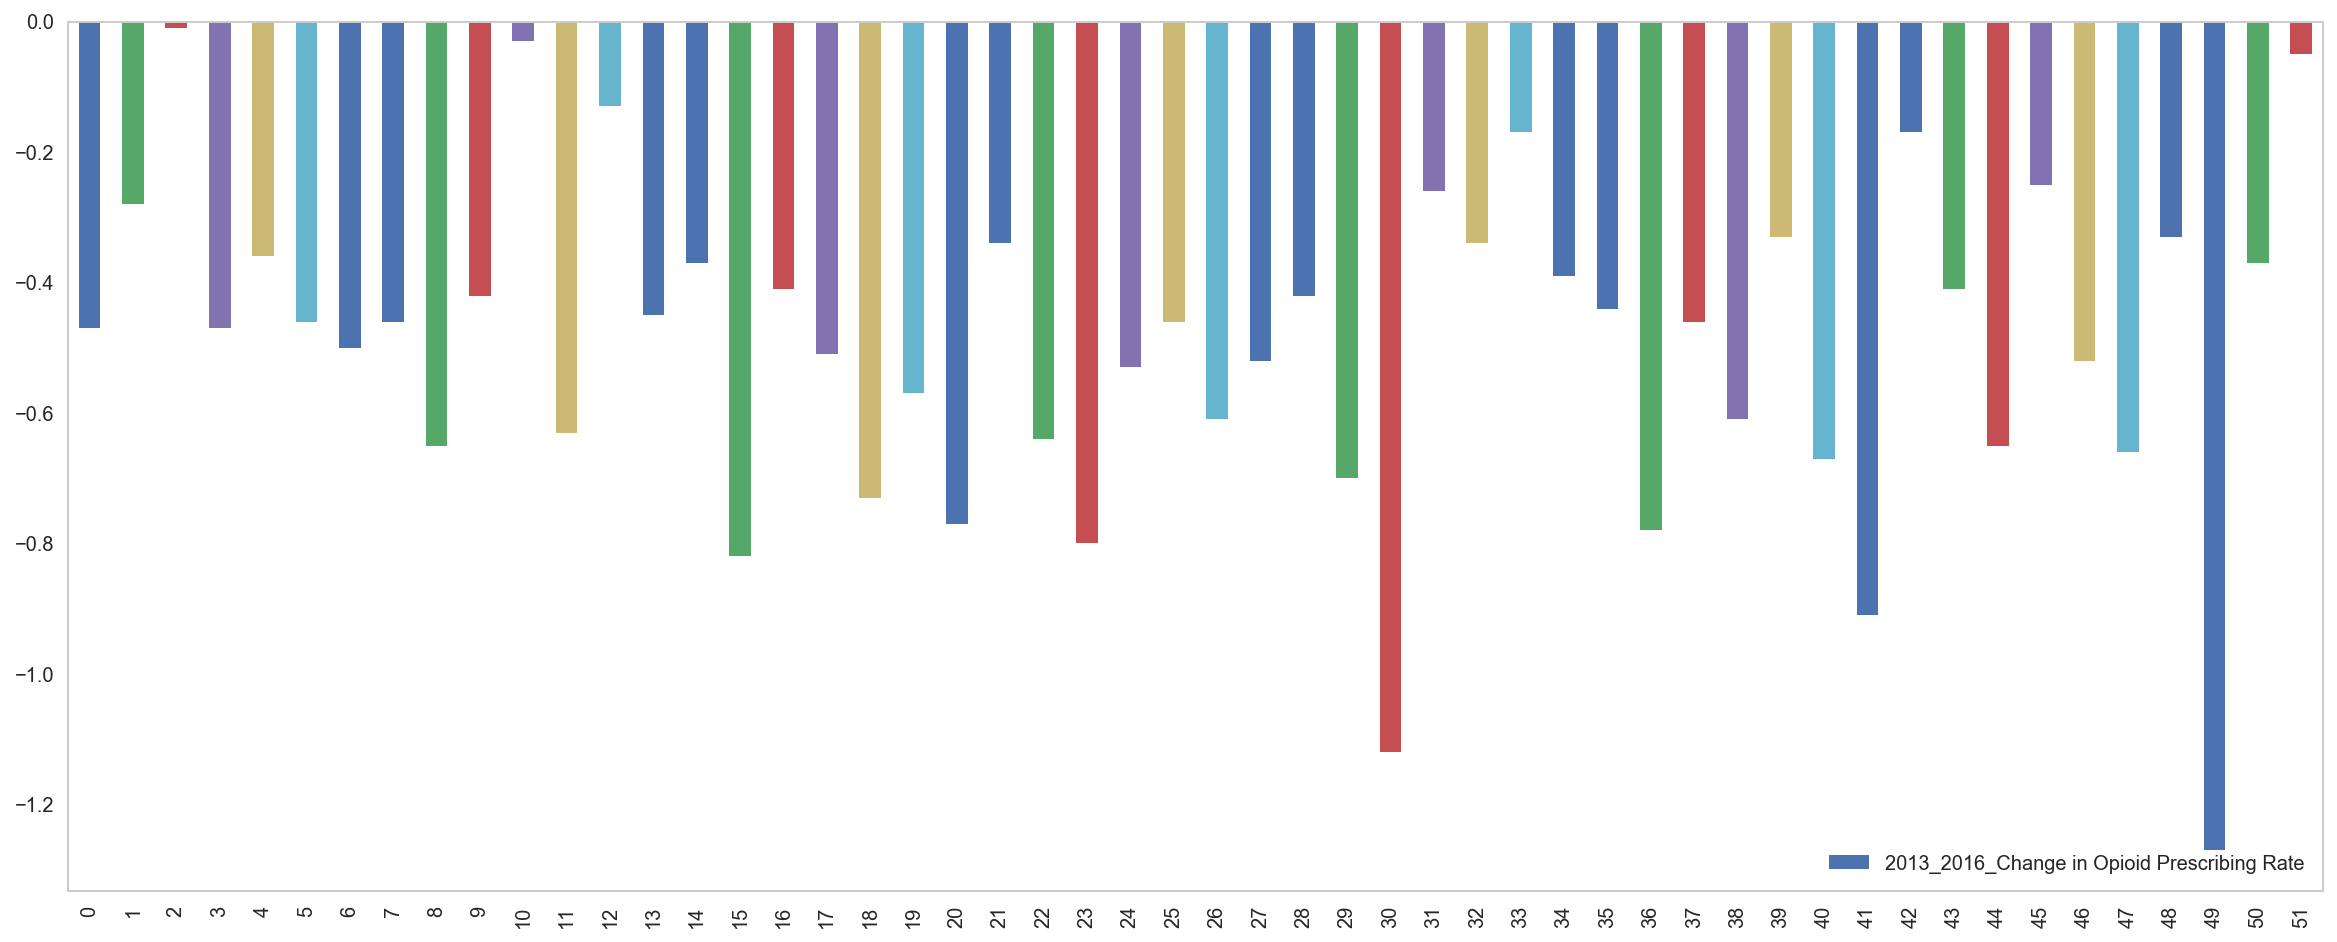

In [116]:
psr_changeex_df['2013_2016_Change in Opioid Prescribing Rate'].plot.bar(x= psr_changeex_df['State_Name'],y='Opioid Prescribing Rate')
# pos = list(range(len(psr_changeex_df['State_Name']))) 
# Adding the legend and showing the plot
plt.legend(['2013_2016_Change in Opioid Prescribing Rate', 'Extended Release Rate'], loc='lower right')
plt.grid()

In [ ]:


# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([-0.8, max( psr_changeex_df['2013_2016_Change in Opioid Prescribing Rate'] + psr_changeex_df['2013_2016_Change in Extended Release Opioid Prescribing Rate '])] )


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

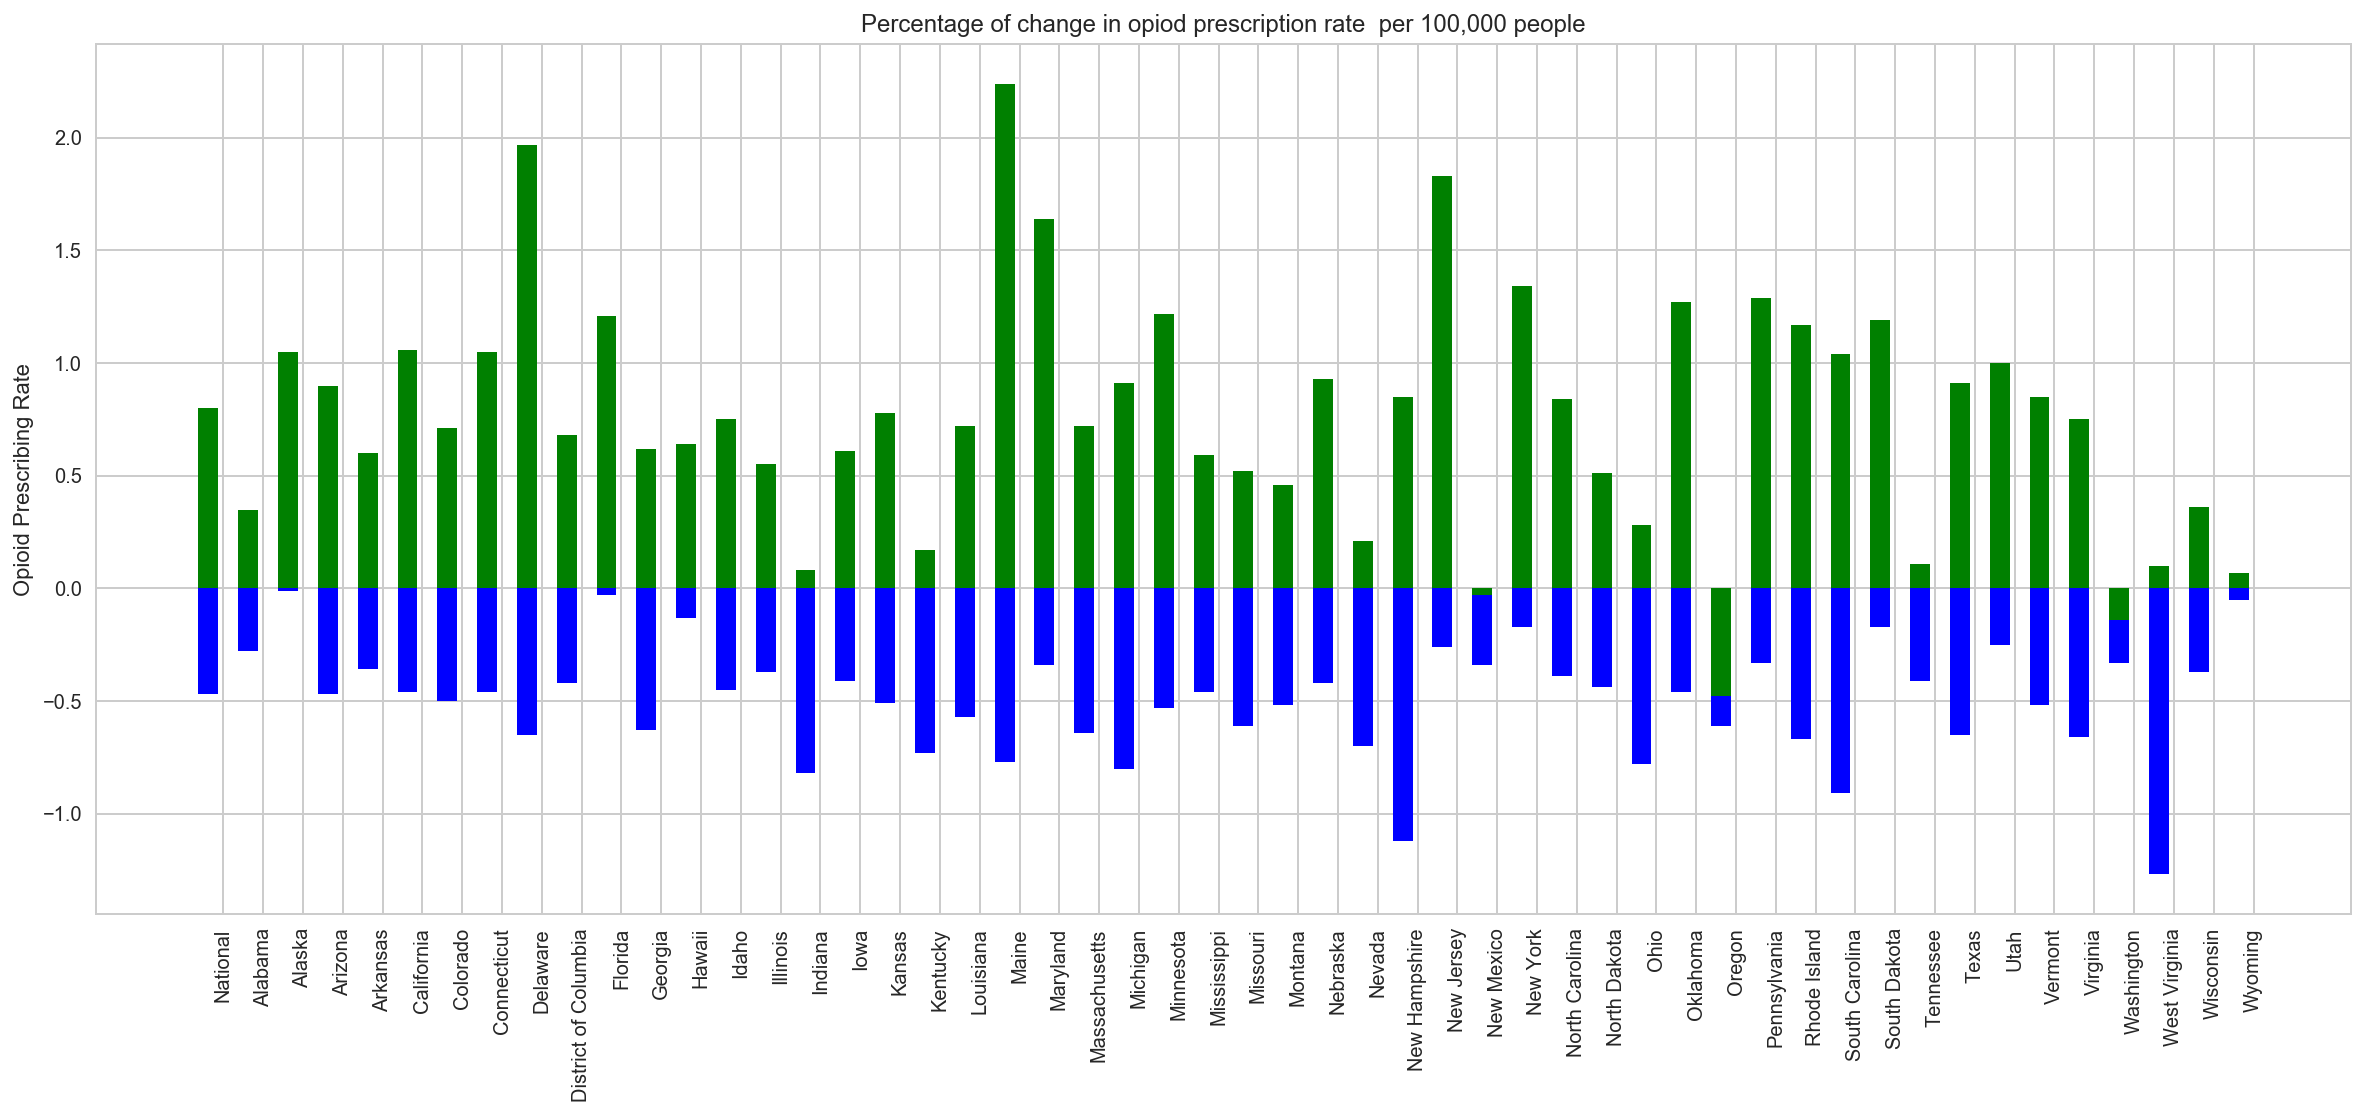

In [122]:
# Setting the positions and width for the bars
pos = list(range(len(psr_changeex_df['State_Name']))) 
width = 0.25 
# Plotting the bars
fig, ax = plt.subplots(figsize=(18,8))
# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
# Set the y axis label
ax.set_ylabel('Opioid Prescribing Rate')
#plt.ylabel("Prescribing Rate")

# Set the chart's title
ax.set_title('Percentage of change in opiod prescription rate  per 100,000 people')
#plt.title("CMS Medicare Part D Opioid Prescribing Rates 2013-2016 by Sate")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(psr_changeex_df['State_Name'], rotation = "vertical")
#plt.xlabel("State")

# Set the labels for the x ticks
ax.set_xticklabels(psr_changeex_df['State_Name'], rotation = "vertical")
#plt.xlabel("State")
x = psr_changeex_df['State_Name']
ax.set_xticklabels(psr_changeex_df['State_Name'], rotation = "vertical")
y=psr_changeex_df['2013_2016_Change in Opioid Prescribing Rate']
z=psr_changeex_df['2013_2016_Change in Extended Release Opioid Prescribing Rate ']
plt.bar(x, y,width=0.5,color='b',align='center')
plt.bar(x, z,width=0.5,color='g',align='center')
plt.legend(['2013_2016_Change in Opioid Prescribing Rate', 'Extended Release Rate'], loc='upper right')
plt.legend()
plt.show

In [133]:
mental_death = pd.read_csv('./inputs/opiodmentalhealthdeath.csv')

In [134]:
mental_death.head()[:2]

Unnamed: 0       Location  1999__Opioid Overdose Death Rate (Age-Adjusted)  \
0           0  United States                                              2.9   
1           1        Alabama                                              0.8   

   2000__Opioid Overdose Death Rate (Age-Adjusted)  \
0                                              3.0   
1                                              1.0   

   2001__Opioid Overdose Death Rate (Age-Adjusted)  \
0                                              3.3   
1                                              1.3   

   2002__Opioid Overdose Death Rate (Age-Adjusted)  \
0                                              4.1   
1                                              1.6   

   2003__Opioid Overdose Death Rate (Age-Adjusted)  \
0                                              4.5   
1                                              1.1   

   2004__Opioid Overdose Death Rate (Age-Adjusted)  \
0                                              4.7   
1                                              1.8   

   2005__Opioid Overdose Death Rate (Age-Adjusted)  \
0                                              5.1   
1                                              1.8   

   2006__Opioid Overdose Death Rate (Age-Adjusted)    ...      \
0                                              5.9    ...       
1                                              2.7    ...       

   FY2005__SMHA Expenditures Per Capita  FY2006__SMHA Expenditures Per Capita  \
0                                 99.55                                103.53   
1                                 60.31                                 64.43   

   FY2007__SMHA Expenditures Per Capita  FY2008__SMHA Expenditures Per Capita  \
0                                113.27                                121.13   
1                                 74.03                                 79.39   

   FY2009__SMHA Expenditures Per Capita  FY2010__SMHA Expenditures Per Capita  \
0                                122.90                                120.56   
1                                 77.89                                 78.19   

   FY2011__SMHA Expenditures Per Capita  FY2012__SMHA Expenditures Per Capita  \
0                                123.93                                124.99   
1                                 78.33                                 76.27   

   FY2013__SMHA Expenditures Per Capita  Footnotes  
0                                119.62        NaN  
1                                 72.64        NaN  

[2 rows x 30 columns]

In [135]:
mental_death.drop(['Unnamed: 0','Footnotes'], axis =1, inplace =True)

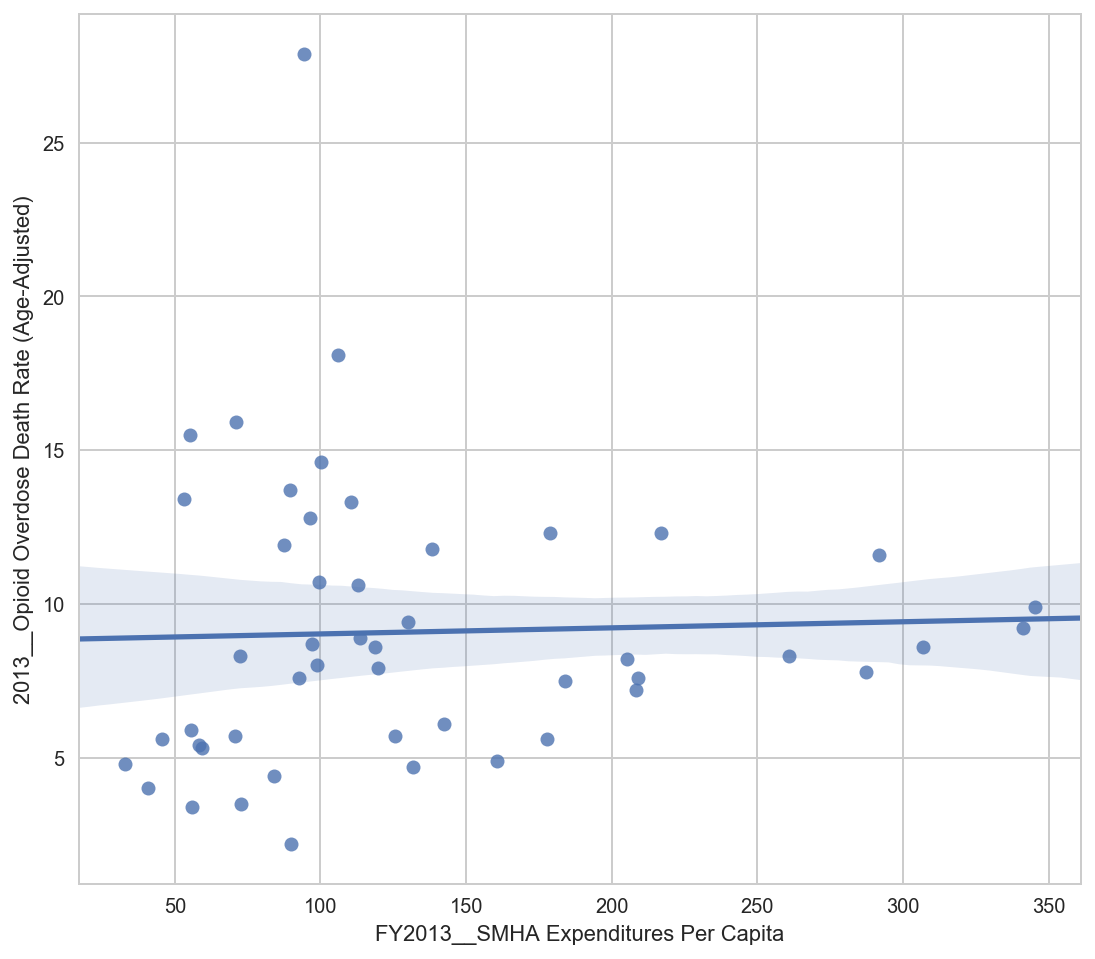

In [136]:
plt.figure(figsize=(8,8))
sns.regplot(x=mental_death['FY2013__SMHA Expenditures Per Capita'],\
                           y=mental_death['2013__Opioid Overdose Death Rate (Age-Adjusted)'])
plt.show()

In [137]:
# regression of 2013 opioid overdose deaths on 2013 state mental health agency expenditure per capita
# i am using this because the  data i got access was until 2013

y=mental_death['2013__Opioid Overdose Death Rate (Age-Adjusted)']
x=mental_death['FY2013__SMHA Expenditures Per Capita']
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     2013__Opioid Overdose Death Rate (Age-Adjusted)   R-squared:                       0.001
Model:                                                         OLS   Adj. R-squared:                 -0.020
Method:                                              Least Squares   F-statistic:                   0.05751
Date:                                             Fri, 13 Jul 2018   Prob (F-statistic):              0.812
Time:                                                     09:42:07   Log-Likelihood:                -143.34
No. Observations:                                               49   AIC:                             290.7
Df Residuals:                                                   47   BIC:                             294.5
Df Model:                                                        1                                         
Covariance Type:                                         nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    8.8255      1.276      6.915      0.000       6.258      11.393
FY2013__SMHA Expenditures Per Capita     0.0020      0.008      0.240      0.812      -0.015       0.019
==============================================================================
Omnibus:                       27.855   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.157
Skew:                           1.622   Prob(JB):                     1.43e-13
Kurtosis:                       7.296   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

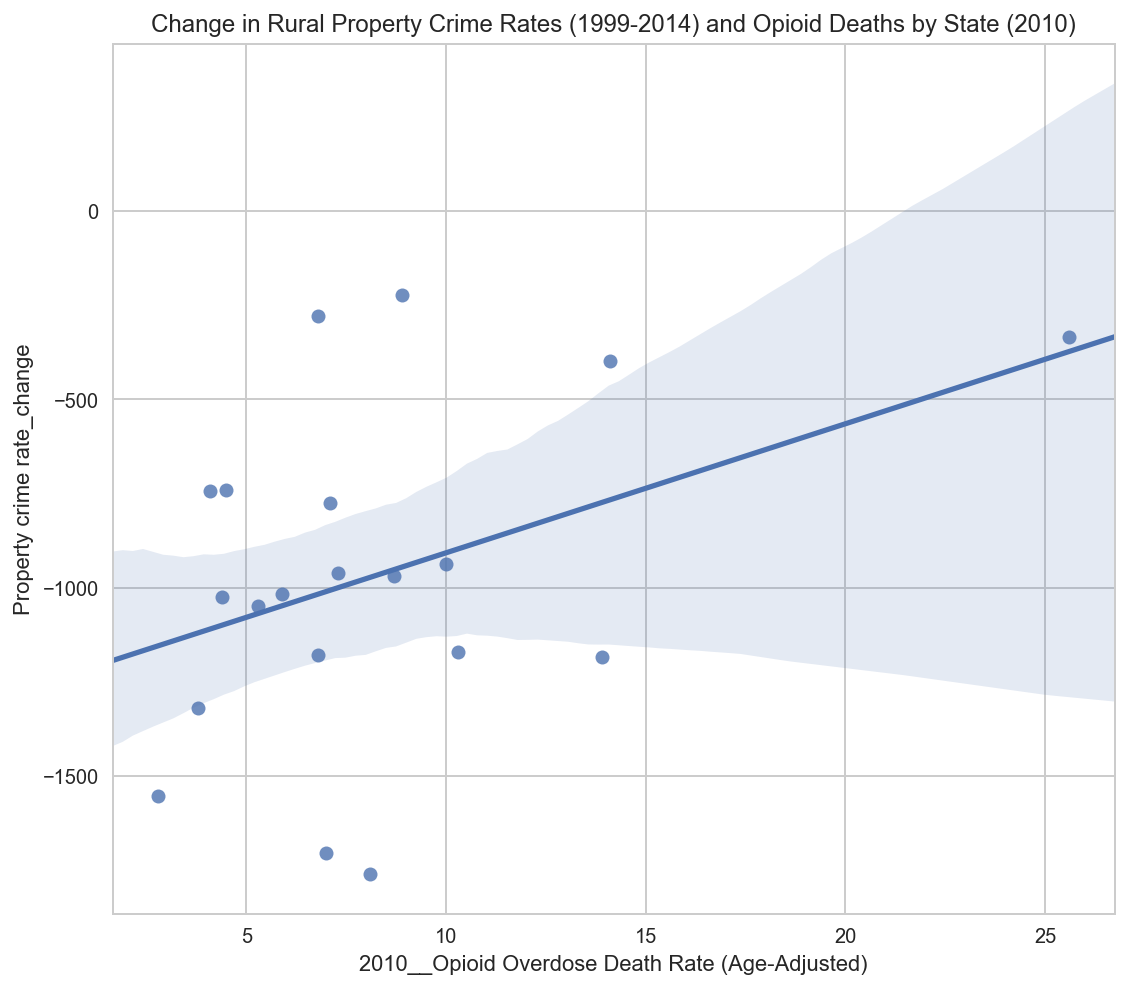

In [139]:
# scatter plot of change in property crime rates and opioid deaths in 2014 
#where urban == 0
UCrime_df= pd.read_csv('./inputs/mergedcrimeUcrimevisual.csv')
RCrime_df = UCrime_df[UCrime_df['urban'] == 0]

plt.figure(figsize=(8,8))
sns.regplot(x=RCrime_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'],\
                   y=RCrime_df['Property crime rate_change'])

plt.title('Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)')
plt.show()

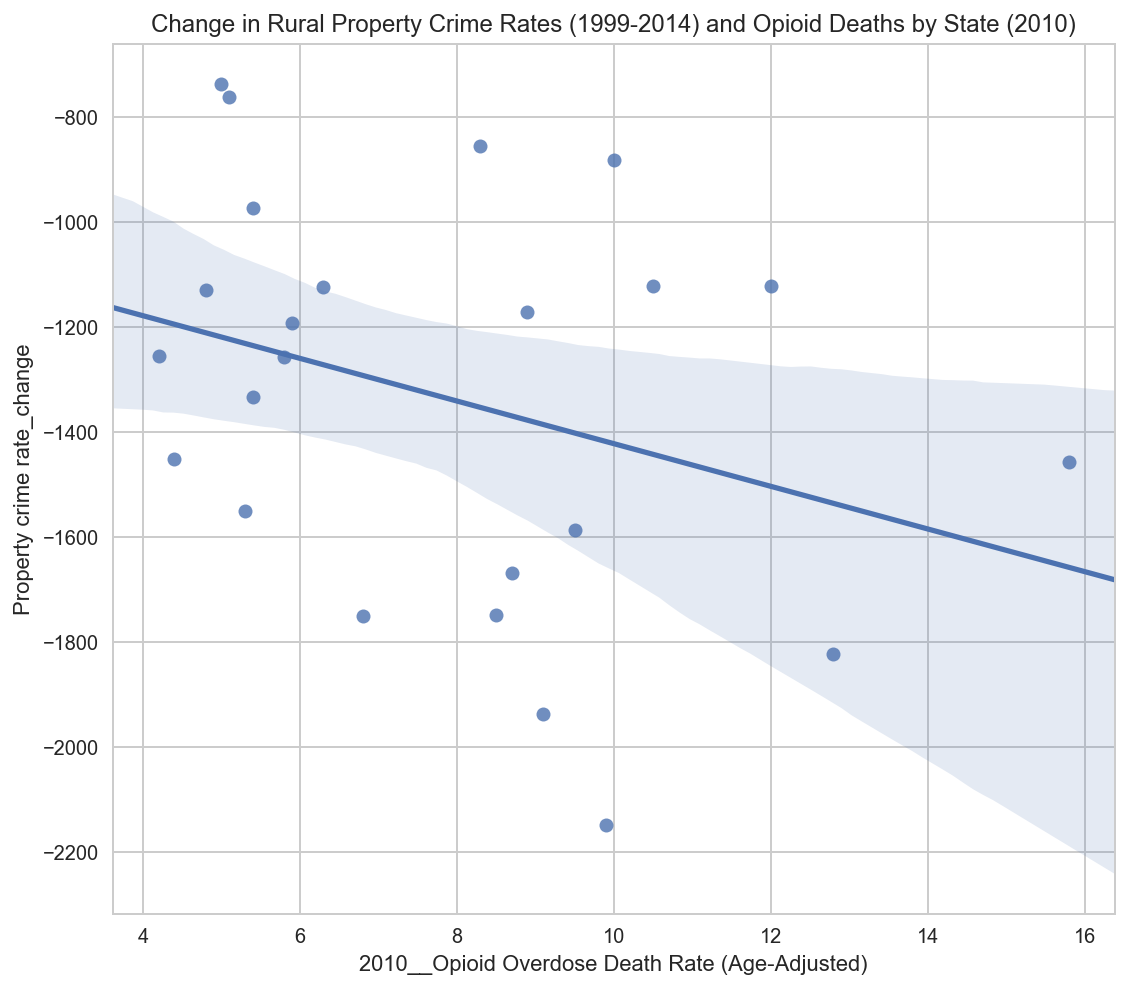

In [140]:
# scatter plot of change in property crime rates and opioid deaths in 2014 
    #where urban == 1
UCrime_df= pd.read_csv('./inputs/mergedcrimeUcrimevisual.csv')
UrbCrime_df = UCrime_df[UCrime_df['urban'] == 1]

plt.figure(figsize=(8,8))
sns.regplot(x=UrbCrime_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'],\
                   y=UrbCrime_df['Property crime rate_change'])

plt.title('Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)')
plt.show()

In [141]:
# multivar reg on 'Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)'

y= UCrime_df['Property crime rate_change']
x= UCrime_df[['Change in Death', 'urban']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Property crime rate_change   R-squared:                       0.227
Model:                                    OLS   Adj. R-squared:                  0.189
Method:                         Least Squares   F-statistic:                     6.022
Date:                        Fri, 13 Jul 2018   Prob (F-statistic):            0.00509
Time:                                09:44:58   Log-Likelihood:                -324.54
No. Observations:                          44   AIC:                             655.1
Df Residuals:                              41   BIC:                             660.4
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1138.4056    135.378     -8.409      0.000   -1411.807    -865.005
Change in Death    28.1421     16.677      1.687      0.099      -5.539      61.823
urban            -287.2462    130.196     -2.206      0.033    -550.183     -24.309
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.899
Skew:                          -0.272   Prob(JB):                        0.638
Kurtosis:                       2.558   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

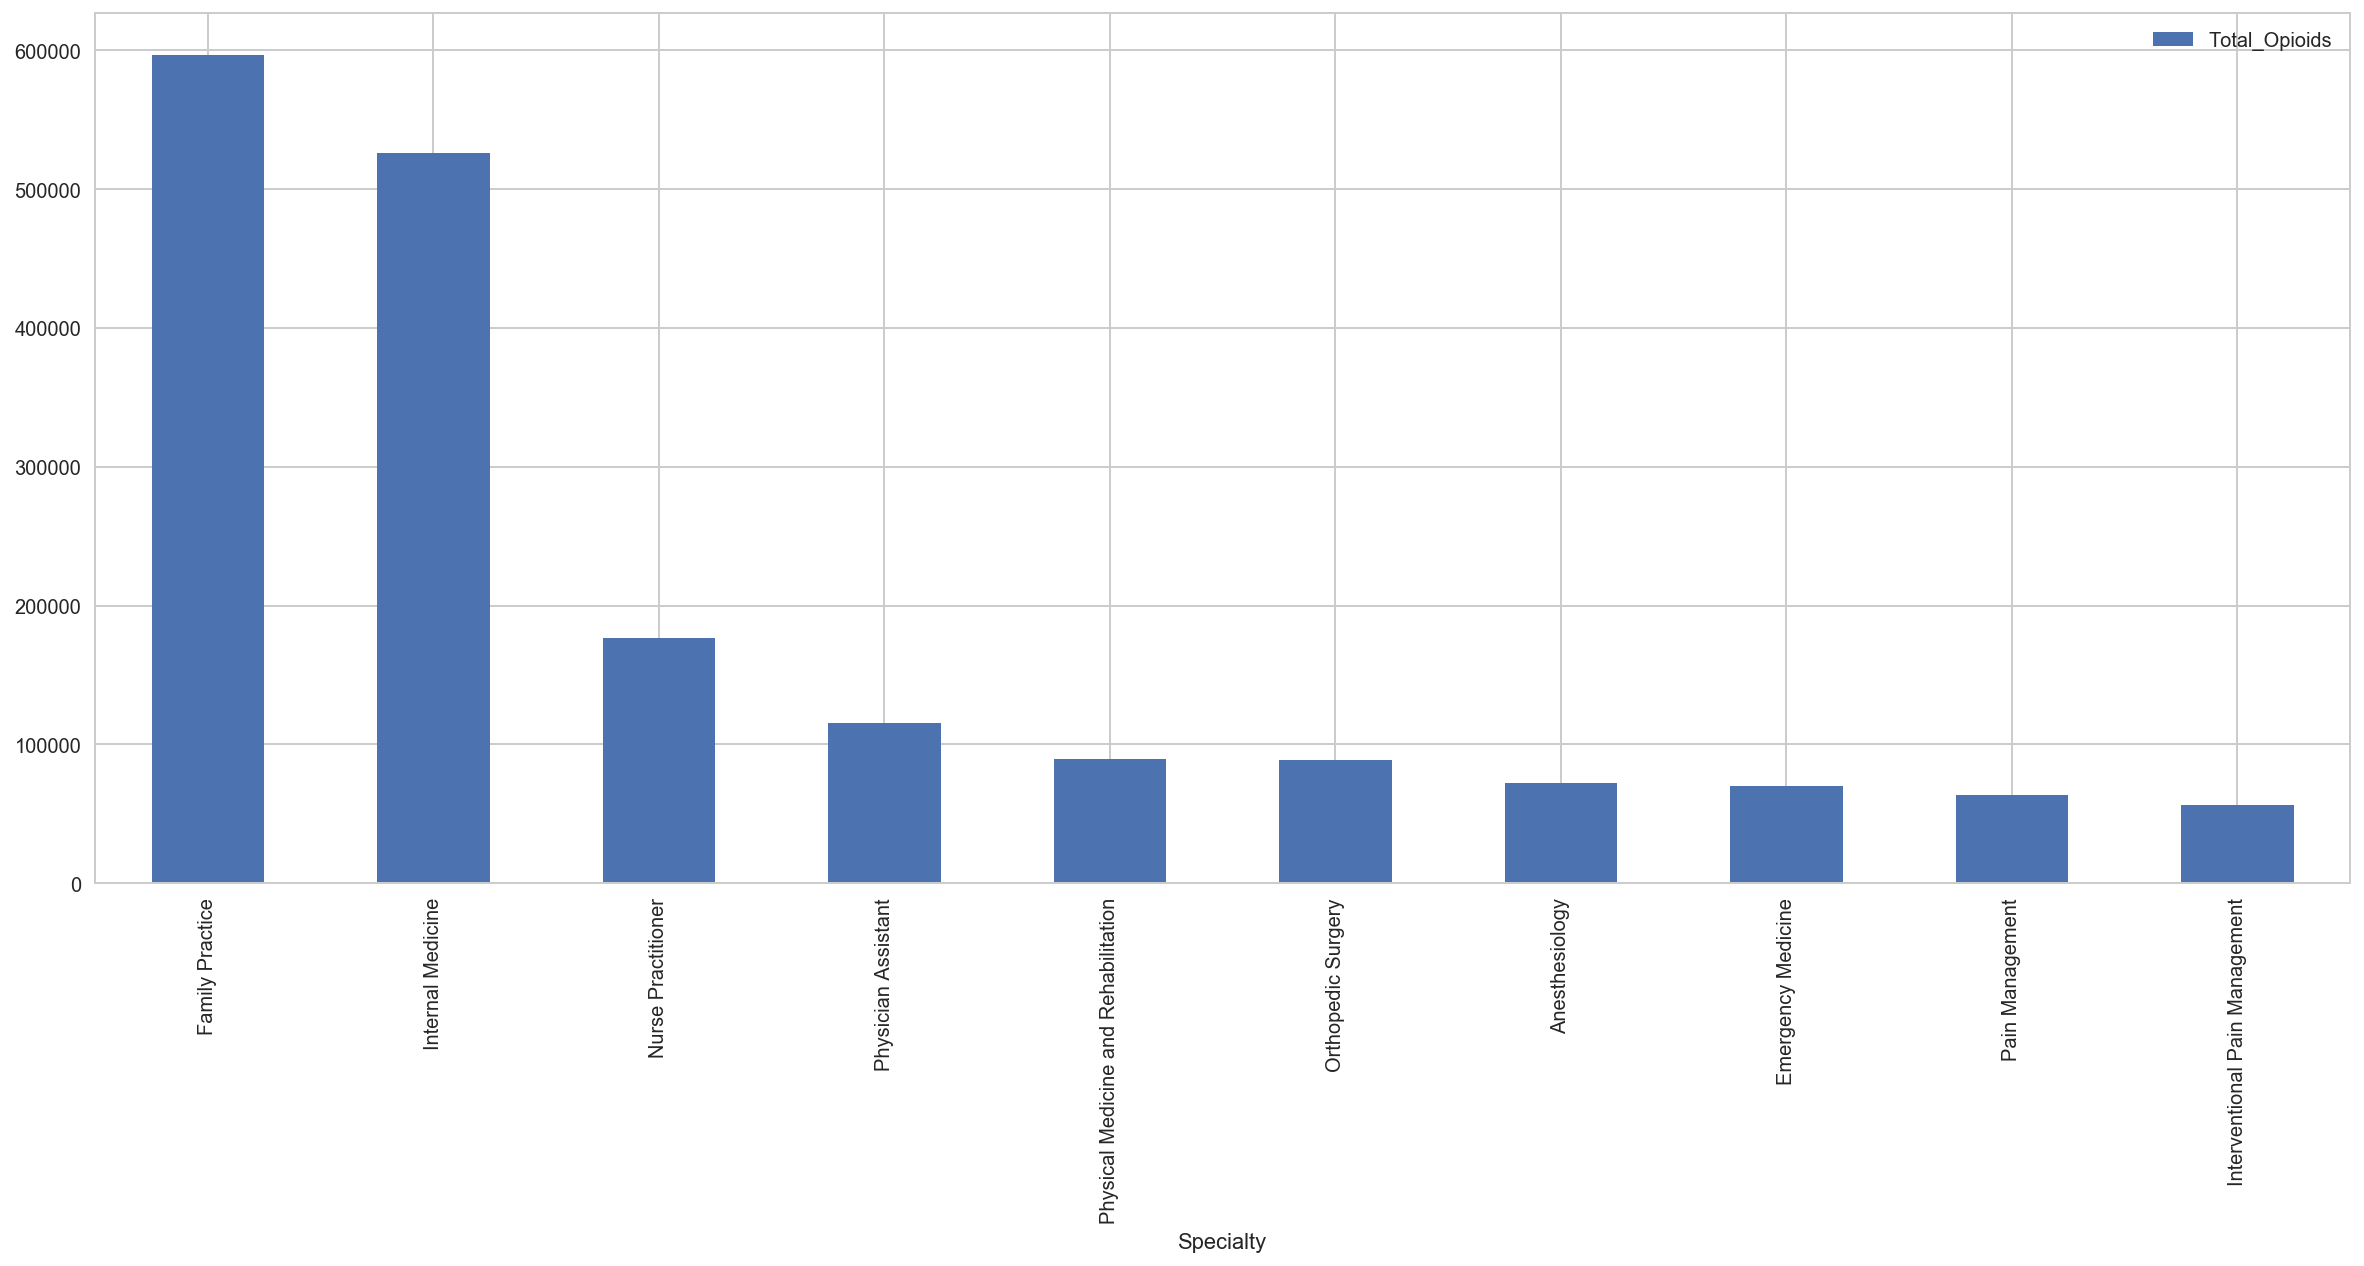

In [142]:
import matplotlib.pyplot as plt
opstot =pd.read_csv('./inputs/TotalOpioidsvisualization.csv')
OpioidsPerSpecialty = opstot[['Specialty','Total_Opioids']]
OpioidsPerSpecialty_group = OpioidsPerSpecialty.groupby('Specialty')
OpioidsPerSpecialty_totals = pd.DataFrame(OpioidsPerSpecialty_group.sum())

OpioidsPerSpecialty_totals=OpioidsPerSpecialty_totals.sort_values('Total_Opioids', ascending=False)
OpioidsPerSpecialty_totals.head(10).plot(kind='bar')

#Plotting a bar plot of total opioids prescribed vs the Speciality of the prescriber